In [27]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score,recall_score, precision_score
from sklearn.metrics import average_precision_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor

/tmp/ipykernel_32/2477538750.py:8: MatplotlibDeprecationWarning: mplDeprecation was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use matplotlib.MatplotlibDeprecationWarning instead.
  warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)


In [80]:
df=pd.read_excel('/kaggle/input/telco-customer-churn-ibm-dataset/Telco_customer_churn.xlsx')
dfss = df.copy()
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [5]:
profile=ProfileReport(df)
profile.to_file(output_file='eda.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [81]:
# By observing the above, we found out that Total Charges only contains numeric data but is still 
# having datatype as object
# So we convert it into numeric type before applying any further computation
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [8]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [82]:
# We have 11 null values in Total Charges
# By analysing the dataset we observe that its value can be calculated as 
# Total Charges = Monthly Charges * Tenure Months

df['calc_charges'] = df['Monthly Charges'] * df['Tenure Months']
df['Total Charges'] = np.where(df['Total Charges'].isna() == True,df['calc_charges'], df['Total Charges'])
df = df.drop(['calc_charges'], axis=1)

In [10]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

[Text(0.5, 0, 'Churn Customers'),
 Text(0, 0.5, 'Number of Customers'),
 Text(0.5, 1.0, 'Distribution of Churn Customers')]

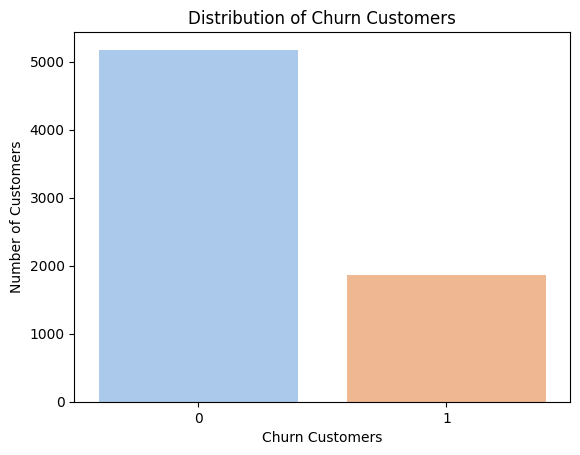

In [11]:
plot= sn.countplot(x='Churn Value', data=df, palette='pastel')
plot.set(xlabel='Churn Customers', ylabel='Number of Customers', title='Distribution of Churn Customers')

<Axes: xlabel='Churn Score', ylabel='count'>

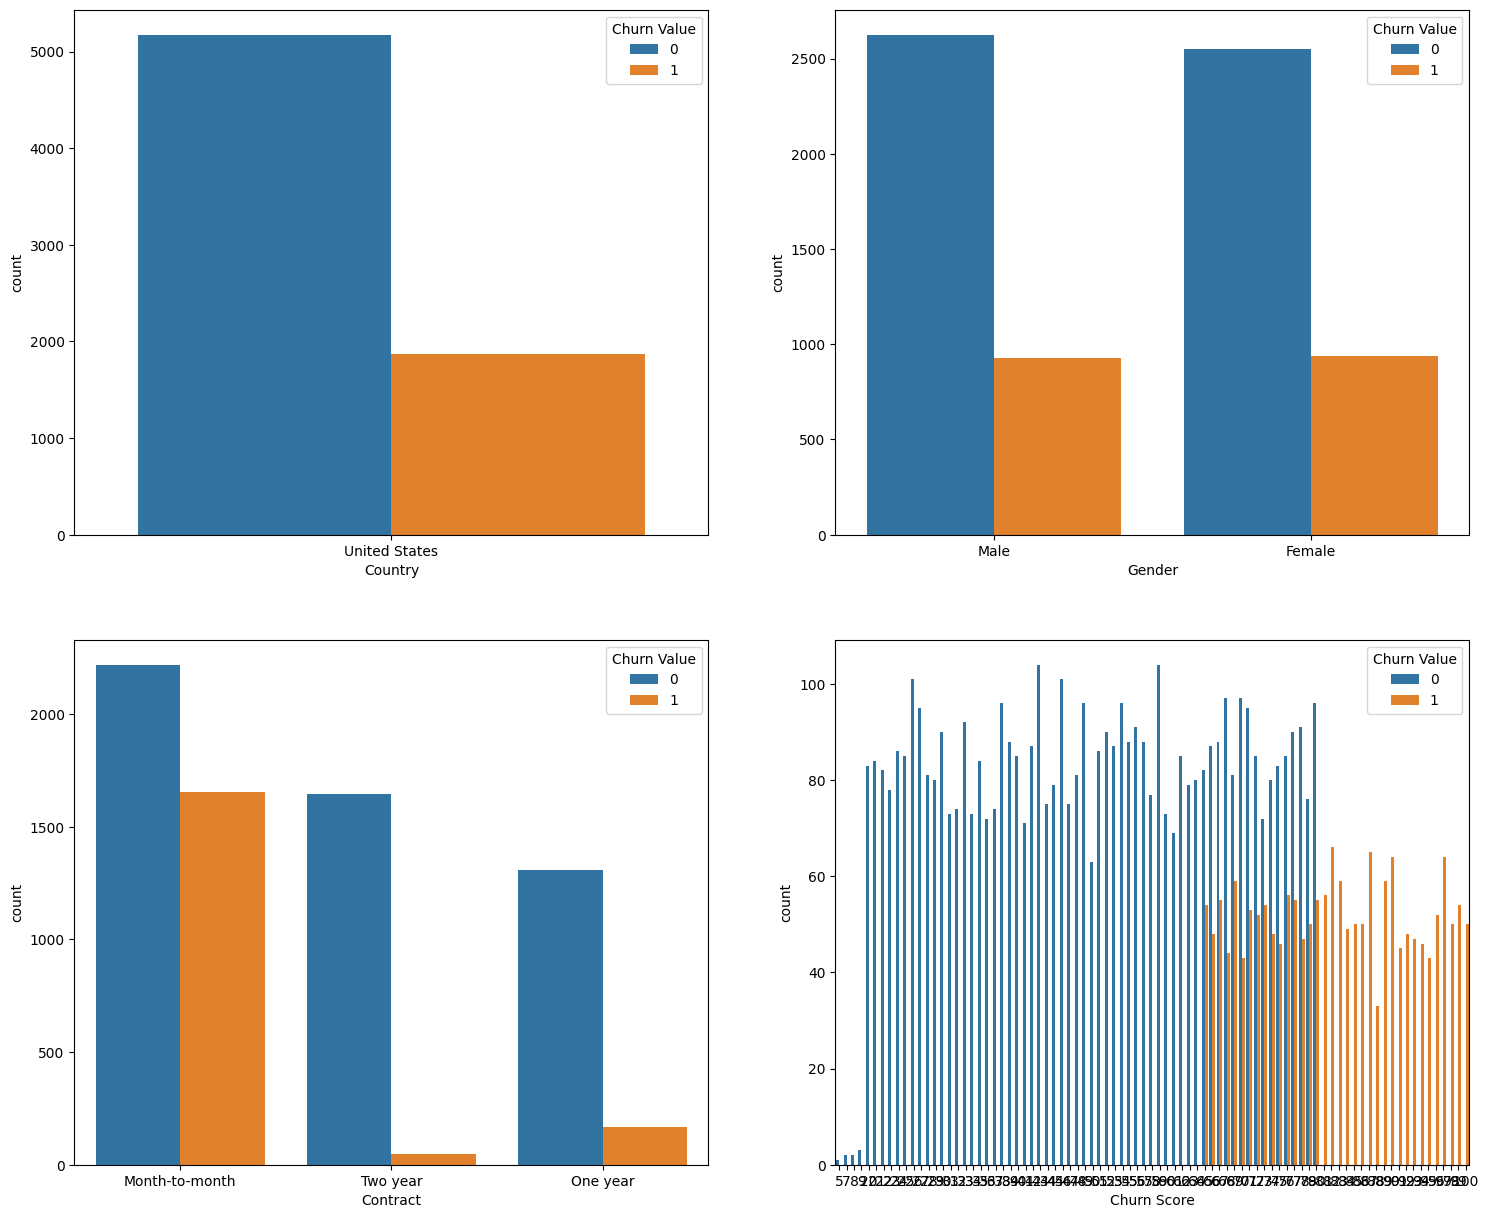

In [21]:
fig, ax = plt.subplots(2, 2, figsize = (18, 15))

sn.countplot(x='Country', hue = 'Churn Value', data = df, ax = ax[0][0])
sn.countplot(x='Gender', hue = 'Churn Value', data = df, ax = ax[0][1])
sn.countplot(x='Contract', hue = 'Churn Value', data = df, ax = ax[1][0])
sn.countplot(x='Churn Score', hue = 'Churn Value', data = df, ax = ax[1][1])

In [83]:
df['Partner'] = df.Partner.map({'Yes':1,'No':0})
df['Senior Citizen'] = df["Senior Citizen"].map({'Yes':1,'No':0})        
df['Dependents'] = df.Dependents.map({'Yes':1,'No':0})
df['Phone Service'] = df["Phone Service"].map({'Yes':1,'No':0})
df['Multiple Lines'] = df["Multiple Lines"].map({'Yes':1,'No':0,'No phone service':0})
df["IsFiberOptics"] = df["Internet Service"].map({'DSL':0,'Fiber optic':1,'No':0})
df["IsDSL"] = df["Internet Service"].map({'DSL':1,'Fiber optic':0,'No':0})        
df["Internet Service"] = df["Internet Service"].map({'DSL':1,'Fiber optic':1,'No':0})
df['Online Security'] = df["Online Security"].map({'Yes':1,'No':0,'No internet service':0})
df['Online Backup'] = df["Online Backup"].map({'Yes':1,'No':0,'No internet service':0})
df['Device Protection'] = df["Device Protection"].map({'Yes':1,'No':0,'No internet service':0})
df['Tech Support'] = df["Tech Support"].map({'Yes':1,'No':0,'No internet service':0})
df['Streaming TV'] = df["Streaming TV"].map({'Yes':1,'No':0,'No internet service':0})
df['Streaming Movies'] = df["Streaming Movies"].map({'Yes':1,'No':0,'No internet service':0})
df["Monthly Contract"] = df["Contract"].map({'Month-to-month':1, 'Two year':0, 'One year':0})
df["Yearly Contract"] = df["Contract"].map({'Month-to-month':0, 'Two year':2, 'One year':1})
df['Paperless Billing'] = df["Paperless Billing"].map({'Yes':1,'No':0})
df['IsElectricCheck'] = df["Payment Method"].map({'Electronic check': 1, 'Bank transfer (automatic)': 0, 
                                                          'Credit card (automatic)': 0, 'Mailed check': 0})

In [13]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason,IsFiberOptics,IsDSL,Monthly Contract,Yearly Contract,IsElectricCheck
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Yes,1,86,3239,Competitor made better offer,0,1,1,0,0
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Yes,1,67,2701,Moved,1,0,1,0,1
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,1,86,5372,Moved,1,0,1,0,1
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,1,84,5003,Moved,1,0,1,0,1
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,1,89,5340,Competitor had better devices,1,0,1,0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   int64  
 11  Partner            7043 non-null   int64  
 12  Dependents         7043 non-null   int64  
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   int64  
 15  Multiple Lines     7043 non-null   int64  
 16  Internet Service   7043 

In [84]:
df = df.drop(["CustomerID", "Count","City", "Zip Code", "Country", "State", "Lat Long", "Churn Score", "CLTV", "Churn Reason", 
                       "Payment Method", "Churn Label", "Gender"], axis=1)

In [16]:
df.shape

(7043, 24)

In [17]:
df.head()

,Latitude,Longitude,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,...,Streaming Movies,Paperless Billing,Monthly Charges,Total Charges,Churn Value,IsFiberOptics,IsDSL,Monthly Contract,Yearly Contract,IsElectricCheck
0,33.964131,-118.272783,0,0,0,2,1,0,1,1,...,0,1,53.85,108.15,1,0,1,1,0,0
1,34.059281,-118.307420,0,0,1,2,1,0,1,0,...,0,1,70.70,151.65,1,1,0,1,0,1
2,34.048013,-118.293953,0,0,1,8,1,1,1,0,...,1,1,99.65,820.50,1,1,0,1,0,1
3,34.062125,-118.315709,0,1,1,28,1,1,1,0,...,1,1,104.80,3046.05,1,1,0,1,0,1
4,34.039224,-118.266293,0,0,1,49,1,1,1,0,...,1,1,103.70,5036.30,1,1,0,1,0,0


In [28]:
df.to_csv('processed.csv',index=False)

In [49]:
from sklearn.base import BaseEstimator, TransformerMixin

class FormatDataFrame(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        df = X.copy()
        
        df['Partner'] = df.Partner.map({'Yes':1,'No':0})
        df['Senior Citizen'] = df["Senior Citizen"].map({'Yes':1,'No':0})        
        df['Dependents'] = df.Dependents.map({'Yes':1,'No':0})
        df['Phone Service'] = df["Phone Service"].map({'Yes':1,'No':0})
        df['Multiple Lines'] = df["Multiple Lines"].map({'Yes':1,'No':0,'No phone service':0})
        
        df["IsFiberOptics"] = df["Internet Service"].map({'DSL':0,'Fiber optic':1,'No':0})
        df["IsDSL"] = df["Internet Service"].map({'DSL':1,'Fiber optic':0,'No':0})        
        df["Internet Service"] = df["Internet Service"].map({'DSL':1,'Fiber optic':1,'No':0})
        df['Online Security'] = df["Online Security"].map({'Yes':1,'No':0,'No internet service':0})
        df['Online Backup'] = df["Online Backup"].map({'Yes':1,'No':0,'No internet service':0})
        df['Device Protection'] = df["Device Protection"].map({'Yes':1,'No':0,'No internet service':0})
        df['Tech Support'] = df["Tech Support"].map({'Yes':1,'No':0,'No internet service':0})
        df['Streaming TV'] = df["Streaming TV"].map({'Yes':1,'No':0,'No internet service':0})
        df['Streaming Movies'] = df["Streaming Movies"].map({'Yes':1,'No':0,'No internet service':0})
        df["Monthly Contract"] = df["Contract"].map({'Month-to-month':1, 'Two year':0, 'One year':0})
        df["Yearly Contract"] = df["Contract"].map({'Month-to-month':0, 'Two year':2, 'One year':1})
        df['Paperless Billing'] = df["Paperless Billing"].map({'Yes':1,'No':0})
        df['IsElectricCheck'] = df["Payment Method"].map({'Electronic check': 1, 'Bank transfer (automatic)': 0, 
                                                          'Credit card (automatic)': 0, 'Mailed check': 0})
        
        # remove some not useful function for now
        df = df.drop(["CustomerID", "Count","City", "Zip Code", "Country", "State", "Lat Long", "Churn Score", "CLTV", "Churn Reason", 
                      "Contract", "Payment Method", "Churn Label", "Gender"], axis=1)

        # First we convert TotalCharges to float and then replace with tenure * monthly charges
        # Convert 'Total Charges' column to numeric with errors set to 'coerce'
        df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
        df.loc[df['Total Charges'].isnull()==True,'Total Charges'] = df['Monthly Charges'] * df['Tenure Months']

        return df

In [85]:
formatDataframe = FormatDataFrame()

# split dataset
train_set, test_set = train_test_split(dfss, test_size=0.25, random_state=42)
dfse = formatDataframe.fit_transform(train_set)
customer_tr = formatDataframe.fit_transform(train_set)

In [51]:
def Generate_heatmap_graph(corr, chart_title, mask_uppertri=False ):
    """ Based on features , generate correlation matrix """
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = mask_uppertri

    fig,ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr
                , mask = mask
                , square = True
                , annot = True
                , annot_kws={'size': 8, 'weight' : 'bold'}
                , cmap=plt.get_cmap("YlOrBr")
                , linewidths=.1)
    plt.title(chart_title, fontsize=14)
    plt.show()

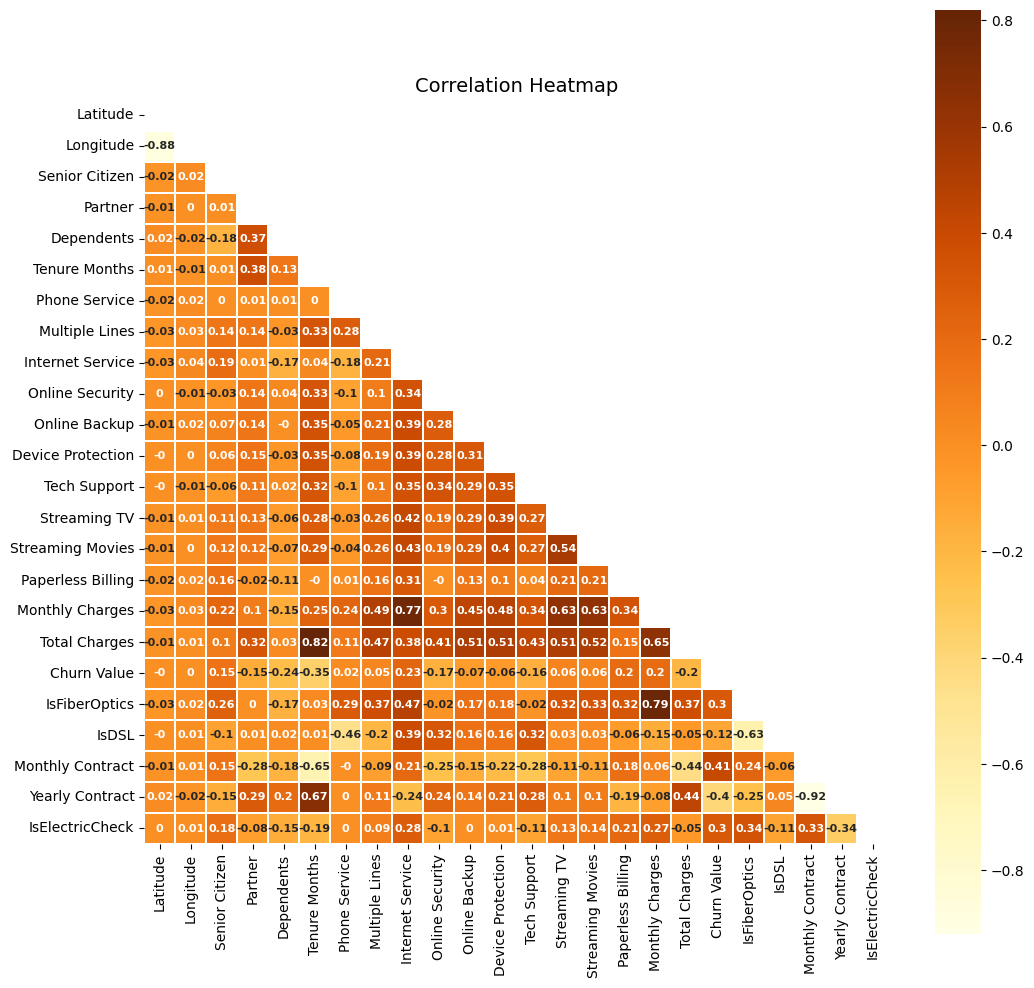

In [36]:
var_corr = round(customer_tr.corr(),2)
Generate_heatmap_graph(var_corr
                       ,chart_title = 'Correlation Heatmap'
                       ,mask_uppertri = True)

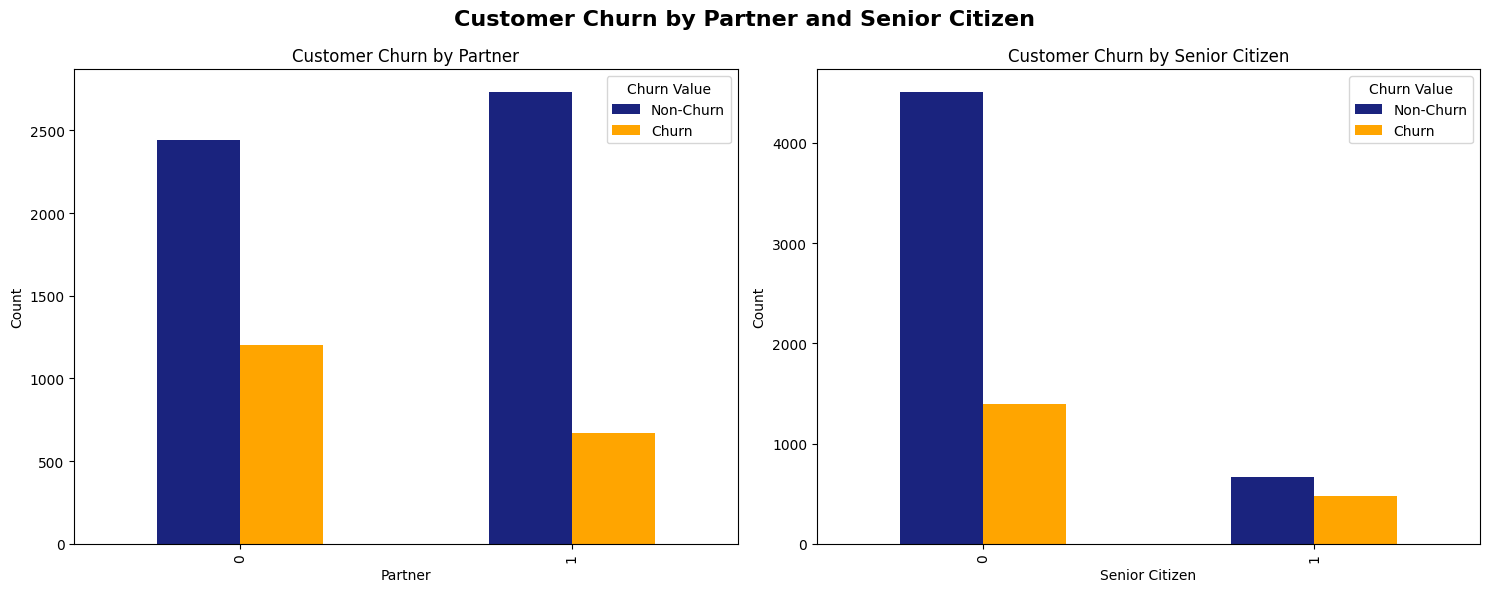

In [37]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,6))

colors = ['#1a237e', '#FFA500'] 
partner_churn = df.groupby(['Partner', 'Churn Value'])['Churn Value'].count().unstack().plot(ax=ax1, kind='bar', color=colors)
ax1.set_xlabel('Partner')
ax1.set_ylabel('Count')
ax1.set_title('Customer Churn by Partner')
ax1.legend(['Non-Churn', 'Churn'], title='Churn Value', loc='upper right')

senior_churn = df.groupby(['Senior Citizen', 'Churn Value'])['Churn Value'].count().unstack().plot(ax=ax2, kind='bar', color=colors)
ax2.set_xlabel('Senior Citizen')
ax2.set_ylabel('Count')
ax2.set_title('Customer Churn by Senior Citizen')
ax2.legend(['Non-Churn', 'Churn'], title='Churn Value', loc='upper right')

plt.suptitle('Customer Churn by Partner and Senior Citizen', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()



    Senior citizens are more likely to churn.
    Customers with partners are less likely to churn.
    Those who have dependents also have lower chances of churning.



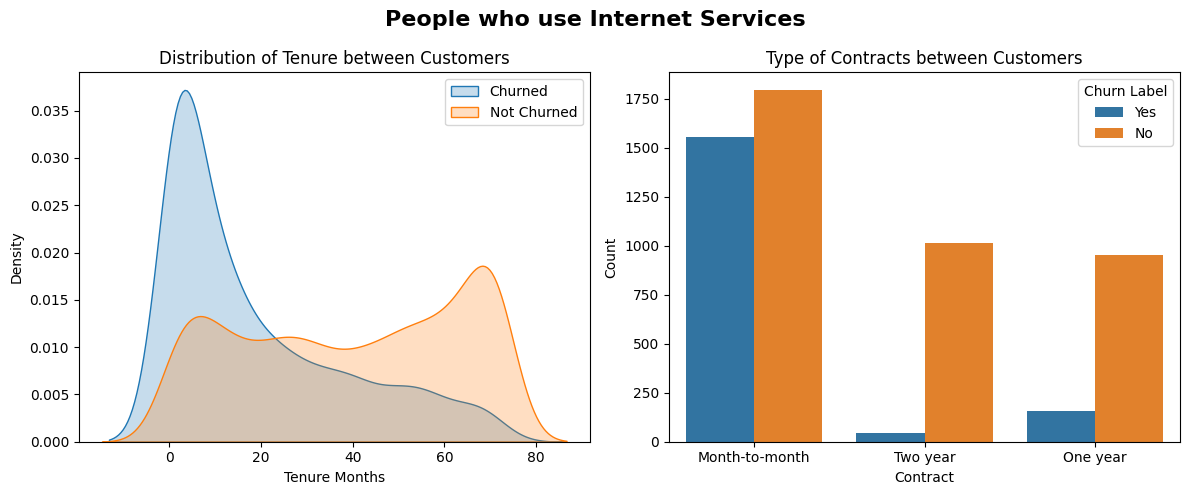

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

churned = df[(df['Internet Service'] == 1) & (customer_tr['Churn Value'] == 1)]
not_churned = df[(customer_tr['Internet Service'] == 1) & (df['Churn Value'] == 0)]

# First subplot: density plot of tenure for churned and non-churned customers who use internet service
sns.kdeplot(churned['Tenure Months'], fill=True, label='Churned', ax=axes[0])
sns.kdeplot(not_churned['Tenure Months'], fill=True, label='Not Churned', ax=axes[0])
axes[0].set_xlabel('Tenure Months')
axes[0].set_ylabel('Density')
axes[0].set_title('Distribution of Tenure between Customers')
axes[0].legend()

# Second subplot: count plot of contracts for customers who use internet service
sns.countplot(data=dfss[dfss['Internet Service']!="No"], x='Contract', hue='Churn Label', ax=axes[1])
axes[1].set_title('Type of Contracts between Customers')
axes[1].set_xlabel('Contract')data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABKUAAAHvCAYAAACFRmzmAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAEAAElEQVR4nOzdd3xO5/8/8NedcefO3pNIIkasEFGpTZOKUWrP1qjVlqpRVW3FaAlVsyhaNYoPNavaIohSYgSxaq+QiUgie12/P/K7z9fJ3ncSr+fjcT8451znnPe575OcK+/7GgohhAAREREREREREVEF0tJ0AERERERERERE9PphUoqIiIiIiIiIiCock1JERERERERERFThmJQiIiIiIiIiIqIKx6QUERERERERERFVOCaliIiIiIiIiIiowjEpRUREREREREREFY5JKSIiIiIiIiIiqnBMShERERERERERUYVjUoqIiKBQKPJ96evrw8nJCX369MHu3bshhNB0uGVm9uzZsmvduHGjpkMqsep0LZXdxo0bZe91x44dNR0SFcPDhw/x2WefwcPDA6amptDV1YWlpSXq1q2LDh06YMKECVi7di1SUlI0HWqxdezYUXZvPnz4UNMhERERFYhJKSIiKlBKSgpCQ0Oxd+9e9OvXD507d0ZiYqKmwyKqth4+fMik1ytyJgFnz55d4mP9/vvvaNSoERYvXoyQkBDEx8cjIyMDMTExuHv3Lk6cOIFVq1bhww8/xLNnz8ruIoiIiChPOpoOgIiIKp+uXbvCwMAAaWlpuHLlCh49eiRtO3LkCD766CNs3rxZgxESERVPeHg4hg4diqSkJGmdq6sr6tatCx0dHURGRuL69etITk7WYJSl06FDB1hZWUnLhoaGGoyGiIiocExKERFRLqtXr4azszMAICMjA6NGjZIlobZs2YJFixbB1tZWQxESERXPjh07ZK08Fy1ahM8++0xWJi0tDSdPnsSWLVugq6tb0SGW2pw5czQdAhERUbGw+x4RERVIR0cnV3cZIQTOnz+fa92BAwcwYMAAODs7Q19fHwYGBqhfvz4++ugj3Lx5s8DzHD16FEOHDoWrqysMDQ2hUqlQq1YtaSyrrKysXPvk1a0nPDwcH330EWrVqgU9PT04Ojrik08+wdOnT0t0/aW9rpwyMjJgamoqxezh4SHbvn37dtk1vXr8lJQUqFQqaVubNm0KPNfjx48xZswY1KxZE0qlErVq1cLEiRMRFxeX7z7nz5/H6NGj4ebmBmNjYyiVStjb26Nbt27YsGED0tLSinW9ADBixAjZNR0/fly2/fjx47LtI0aMkG3PyMjAunXr8Pbbb8Pe3h56enrQ19eHo6Mj3nzzTXz88cfYsmVLnueOiIjArFmz8Oabb8LCwgK6urqwsrKCj48P1q9fj/T09GJfT2Hyui8jIyPx6aefwsXFBXp6erCzs8PIkSMRFhYm7afutufi4iI73j///FNgd76S3qN5jT+0e/dudOzYEWZmZrLPKq+yx44dQ/fu3WFhYQGVSoVGjRph6dKl+Y47V9w41e/jyJEjZevnzJlTou58t2/fli17e3vnKqNUKuHt7Y0NGzbkm3QvyT2V1z0eHR2NTz75BC4uLlAqlejYsSPGjx8vK/fXX3/lOlZcXBz09fWlMm5ubtK2oowplZ6ejq1bt6JXr16oVasW9PX1YWhoCGdnZ/Tu3Rs7duzItU9J77HExER8//33aN++PWxsbKBUKmFkZAQnJye0a9cOkydPxoEDB/Lcl4iIXhOCiIheewBkrwcPHsi2JyYm5iqzbds2aXt8fLzo2rVrrjKvvnR1dcWaNWtynTs1NVUMHDiwwH0BiE6dOokXL17I9t2wYYOsTK9evYSVlVWe+9eqVSvXdc2aNUtWZsOGDbLtpbmugvTo0UPaX0tLS3ZdH374oez4P/74o7QtMDBQts3Pzy/faxk5cqQwMTHJM+Y33nhDpKWlyWLKysoSkydPLvRzaNq0qXj06FGxrnf48OGyYwQGBsq257yu4cOHy+J69f3K72VpaZnrvHv27Mn3PVC/WrZsKSIjI4t1PTnvuw4dOhS4vVu3bsLS0jLP8zs5OUmf/4MHDwq9zpznK8092qFDB1m5999/P9e+6s8qZ9lhw4ble75PP/0017lKEmfO9zG/16xZs4r0uU2cOFG2X7NmzcSOHTtEVFRUkfYXouT3VM57vFOnTqJmzZq5PteQkBDZuoEDB+aK4aeffpKV+f7776VtOT+nnL/z7ty5I9zd3Yt8fwlR8nssJSVFeHp6Fvr5eXp6Fvn9JyKi6octpYiIqFAXL17Mtc7e3l76/+DBg/H3339Ly9bW1ujSpQs6deoEpVIJIPvb+Y8++khWDgA+/vhj2TfzOjo68PLyQvv27aFSqaT1gYGB6N+/f4Fx7tu3DzExMWjZsiXat28PPT09aVtoaCjee++9Il5x6a+rIG+//bb0/6ysLJw4cUJazqsVUX7bfHx88j3Hhg0bkJiYCC8vL3h5ecm2nT9/Hjt37pStmzdvHpYuXSpb5+HhAW9vbxgbG0vrLl++jK5du5aoxVRJnDlzBn/88Ye0bG5ujs6dO6N79+7w8PCAhYVFnvudPn0aAwcORHx8PIDsGSZbtGiBd955B66urlK5c+fOoXfv3uU6q+Rff/2F58+fw8PDA+3atYO2tra07dGjR1i9ejWA7PF/+vbti65du8r2t7KyQt++faVXhw4dpG1leY/++uuv0NbWhoeHB7p16wYnJ6d8y27evBlGRkZ46623UKdOHdm2H374AY8fP5atK0mczs7O6Nu3L1q0aCE7VoMGDWTvR8OGDQu8LrV27drJlkNCQjBw4EDY2tqiZs2a6N27N1asWIGIiIg89y/LeyowMBBPnjyBjY0NOnfujLZt20KpVKJp06Zo2bKlVG7//v3S+dR+/fVX6f96enoYPnx4ka4/Pj4ePj4+uHLlirROoVCgcePGeOedd/Dmm2/m2WWxpPfYnj17cOHCBWnZ1tYWXbt2RdeuXeHu7i77vUJERK8xTWfFiIhI85Djm2v1t+upqakiKChINGzYULbdzMxMpKSkCCGEOHLkiGxbz549RWpqqnTsW7duCSMjI2l748aNpW3//fefUCgU0jYdHR3xzz//SNuvXr0qTE1NZcc/ePCgtD2vlhR//PGHtP3ixYtCX19ftv3V4xfUUqo011WY//77T3bsKVOmCCGEiIyMlNZpa2sLAMLOzk7a79VWEEZGRrLWTjmvRVtbWxw5ciTf7SNHjpS2xcTE5HqfXm0JFxoaKpydnWXbi9M6rDQtpbZu3SrbFhoaKts3KytLXLx4UaxatUq2vm3btrL76sSJE7J9xo0bJzvurl27inw9xW0plfPeyrm9U6dOsv1ztpjKeXy10t6jOVvVmJmZiX///Vf2PqmPl7Osk5OTePjwoRBCiPT0dOHt7S3bvmnTpjKLM+f7VdSWUTllZGSITp06FdpyR6lUis8//1xkZGTI9i/NPZXzHgeyW6apf48KIaT///zzz7JyP//8s1Tm4cOHst+ZgwYNksVYUEspPz8/2TYbGxtx+vRp2f7Pnj0T27dvl5ZL89nNmzdPWm9sbCwSExNzfR6nTp3K1UKViIheLxzonIiIcsk5pk1OCxYskFoh7d27V7bt2bNnGDJkiGzdq9++X7t2DQ8fPoSzszMOHDgga03Qt29ftG/fXlpu3Lgxxo4di0WLFknr/vjjD/j6+uYZl7e3N9555x1p2cPDA0OHDsXPP/8srQsICJCdIz+lua7CNGjQADVq1JDGE/rnn38AQNZiaujQodi8eTMiIyNx8+ZNODs748yZM9L2Dh06FDgQc79+/WRj5vTs2VM2CPKrYxkdOXJENuOYl5cXBg8eLC07Ojpi2rRpGD9+vLTujz/+wLhx4wq91tLK2Vpn2rRp6NatmzRrmo2NDTw8PGRjcz19+hSnTp2Slo2MjLB8+XIsX75cWhcZGSk77h9//IG+ffuWyzV4eXnJxsnq2bOnbPurn0VxlPU9OnXqVNk4ZQqFQmoJk9MXX3whfTY6Ojro1q0bjh49Km1/9ZrK82epOLS1tfHXX39hzpw5WL16da4WSGppaWn47rvvoKWlBX9/fwBlf0+Zm5tj1apVstac6v8PGjQIU6ZMkeL79ddfMWrUKADZk0y8+jtz7NixRb7+PXv2yJa/++47tGrVSrbO0tISAwcOlJZL89m9+rP78uVLTJ06Fe3atUOdOnVQt25dmJubo3Xr1mjdunWRr4GIiKofJqWIiKjIjI2NsXDhQlky4sGDB7Iyp0+fLvQ4Dx48gLOzc65BeJs0aZKrbNOmTXPtmx93d/dc6xo3bixbfvToUaHx5XWe4lxXUfj4+GDTpk0AsrsRxcXFSd3zjIyMMHXqVGnGw+PHj8PNzQ2pqamy/QvyxhtvyJZNTU1ly68eq6w/h7LUpk0bdO3aVeoWtGPHDll3TwcHB3Tu3BmTJ0+WPv+HDx/K/nCPjY3F7t27CzxPeV5PcT6L4ijrezTnAOoFKc41lffPUnGoVCr4+/vDz88Px48fx7///ovTp08jKCgo1+fwww8/YO7cudDV1S3ze6p58+b5dl8zNDTEkCFDsGbNGgDZyepHjx7ByclJ1nWvbt266NSpU6HXrHb//n3Z8qvdQPNTms+ub9+++P777xESEgIAWLNmjXRNQPaXH926dcNnn31WLp81ERFVDRxTioiIcunatSv69u2Lfv364b333sOUKVOwdetWhIWF4aOPPir18dXTsoscY64oFIpSH1uTXp1uvjCvJpUyMzPx77//Si2mWrduDXd3d9jY2ADITkrlHE/q1XGp8mJpaSlbfnUco5wq+nPIyMiQLUdFRRVY/o8//sCGDRvQrVs3WFlZybaFh4dj48aNaNmyJc6dO1fimIrz2RVXcT6L8lbQdTo4OBT5OOV9TeX5eQCAvr4+unbtinnz5iEwMBAvXrzA/Pnzc8UQGhpa4nOU5r1+tQWUEAJbtmzB+fPncevWLWn9mDFjShxbeVJft0qlwunTp7FixQq89dZbuRKXDx48wKpVq9C8efMif1lARETVD5NSRESUy+rVq7Fr1y7s3LkTv/76KxYvXowhQ4bk+c1+zq5+27dvhxCiwJe6i13Ofa9evZrr+K8OypvXPoXtf/36ddlyQYM3F3Se4lxXUeRs6bRz5078999/AP6vxYq6JcM///wjS0rZ29ujUaNGRT5XYcr6c8gpZxew58+fy5ZPnjxZ4P7a2toYMWIE/vzzTzx9+hSxsbG4dOkSZs6cKZVJTU2VBgx3cnKSJdbc3NwK/eyCg4OLfD3lrahJwbK+R7W0yqdaWNo4yypJGhkZme/g4/r6+pgxYwbMzc1l69Vd08r6nirsvfbw8JAN8P7rr7/KWkkplUpZl9CiqF27tmxZnQQvSGk/O319fXzyySc4evQoYmNj8fz5c5w9e1aWdHvx4gU2bNhQrGshIqLqg0kpIiIqlZzj48ycOTPPbithYWFYtWoVPvnkE2ld9+7dZX/o7d69WzZuy3///Yd169bJjlPQH9VHjx6Vzf50+fJlbN26VVamsG5vaqW5rqKws7OTdS3cunWr9AezOhml/jcyMlKWuHl1rKiy4O3tDX19fWn5zJkz+O2336TlsLAw2bheQMGfQ045W4Vs2LBBmr3vr7/+wvr16/PdNzQ0FEuXLpV1PTI1NUWzZs3w/vvvy8qqx/SxsbHBm2++Ka2/efMmFixYgMzMTFn5jIwMBAYGYtSoUTh79myRr6e8vfpZANmtwfJS3vdoWSltnDnfj5KOwfXzzz+jYcOGWL58eZ4z7AUEBODFixfSspmZGWrUqAFAM/fUq4mbW7du4aeffpKWe/XqBWtr62Idr1evXrLlzz//HEFBQbJ1sbGxspk5S/PZhYSEYO3atbL718LCAi1btkS/fv1k++ccj4uIiF4fHFOKiIhKpXPnznj77bcREBAAALhz5w7q1q2L5s2bw97eHklJSbh79640btGr45g0bNgQw4YNk8ZWSk9PR8eOHfHGG29AqVTi3LlzsgG4O3XqhC5duuQbi/pb+jfeeAMqlQpnzpyRjRPTunXrIo2jUtrrKiofHx9cu3YNwP91aTMwMJDG63l1jJ+srCzp/4V13SsuCwsLfP7557KB0AcOHIiFCxfC3Nwc58+flw0K7ebmhpEjRxb5+G+//bbs2IcOHYKVlRUMDAwK7boXExODKVOmYMqUKahVqxbq1KkDExMTvHz5Mtcf/Q0aNJD+v2DBAnh7e0vv64wZM7BixQo0btwYenp6iIqKwvXr15GUlAQAuRJcmmRjYwMLCwvExMQAyL73mjVrBldXVygUCowePRpdunSpkHu0LJQ2Tjc3N9nyhg0bcPfuXakL4dKlS+Ho6FikWG7evIlJkyZh0qRJqF27NlxdXaFSqRAaGorLly/Lyg4fPlzWLbGi76nBgwdj6tSpePnyJQAgJSVF2lacAc7Vpk6dik2bNuHx48cAgOjoaLRp0waNGzeGk5MTYmJicPHiRXh5eaF///4ASvfZPXz4EB9++CE++ugjuLq6wsXFBYaGhoiJiSnwZ5eIiF4vTEoREVGp7dq1CwMGDMChQ4cAZI+RdP78+TzL6ujIHz1r165FYmIidu3aBSA7OZPz23sAaN++vVQmP0OHDkVgYGCeLRRq1qyJLVu2FOl61EpzXUXh4+ODZcuWyda1bt1a6jLUsGFDWFtb4+nTp7n2K2uzZs3C8+fPsXLlSmndxYsXc5Vr3Lgx/vjjD9msYYVp06YN3n33Xfz+++/SupcvX+Lly5fQ1dXFqFGjZAMg5yc0NDTfMX6cnZ3x+eefS8vt27fHtm3bMHr0aCmhFhERkWcLGaBkn195GjVqlKx12uXLl6WkyavJyvK+R8tKaeJ0d3eXjRmWmZkp6846e/bsIiWlcnYDvH//fq7Bv9XeeustzJs3T7auou8pIyMjDB48OFdr0Tp16uCtt94q9vHMzMxw5MgR9OnTR+rWLITA1atX8+yyq1bae0wIgbt37+Lu3bt57tO8eXOMHj26uJdDRETVBLvvERFRqZmYmODgwYP4888/MWTIELi6usLAwADa2towNzeHh4cHRo0ahe3bt2P//v2yffX09LBz504cOnQIgwcPhouLC/T19aFUKlGjRg28++672LFjBwIDA2FhYVFgHHXq1EFISAjGjx8PR0dH6Rgff/wxgoODizUOUmmvqyg6dOggm04dkCccFAoF2rdvL9veoEGDYg1IXVQKhQI//PADgoKC8MEHH6BevXowNDSErq4ubG1t4evri59++gnBwcElmilrx44dmDlzJlxdXaGrqwsrKyv069cPFy5ckE1Bn1PdunWxceNGjB07Fp6enqhRowZUKhV0dHRgbW2Ntm3bwt/fHyEhIbC3t5ft279/f9y6dQtz585F27ZtYWlpCR0dHahUKjg5OcHX1xfffPMNrl69irZt2xb7msrTvHnz8O2336Jhw4ZQqVT5livve7SslDbOP/74A2PGjIGjo2OJkz2ff/45jh49iq+//hq+vr5wdXWFkZERtLS0oK+vD2dnZ/Tu3Rvbt2/HkSNHYGhomOsYFX1P5dUiavTo0SUeZ6tevXq4ePEiNm3ahB49eqBmzZrQ09ODgYEBnJyc8O677+LDDz+U7VPSz65t27ZYs2YNhg8fDnd3d9jb20OpVEJXVxf29vbw8fHBDz/8gFOnTuX5XhMR0etBIfIb8ZGIiKiS27hxo6wb2axZszB79mzNBUREREREREXGllJERERERERERFThmJQiIiIiIiIiIqIKx6QUERERERERERFVOI4pRUREREREREREFY4tpYiIiIiIiIiIqMIxKUVERERERERERBWOSSkiIiIiIiIiIqpwTEoREREREREREVGFY1KKiIiIiIiIiIgqHJNSRERERERERERU4ZiUIiIiIiIiIiKiCsekFBERERERERERVTgmpYiIiIiIiIiIqMIxKUVERERERERERBWOSSkiIiIiIiIiIqpwTEoREREREREREVGFY1KKiIiIiIiIiIgqHJNSRERERERERERU4ZiUIiIiIiIiIiKiCsekFBERERERERERVTgmpYiIiIiIiIiIqMIxKUVERERERERERBWOSSkiIiIiIiIiIqpwTEpRlTN79mwoFIoKOVfHjh3RsWNHafn48eNQKBTYtWtXhZx/xIgRcHZ2rpBzlVRCQgJGjx4NOzs7KBQKTJo0SdMhVRobN26EQqFAcHCwpkMhIiKq9hYtWoTatWtDW1sbzZo103Q4rxV1/fzZs2eaDoWIqhgmpUij1H+0q18qlQoODg7w9fXFihUr8PLlyzI5T3h4OGbPno2QkJAyOV5ZqsyxFcX8+fOxceNGfPTRR/j111/x/vvv5yqjrqgU9no1AUh5++uvvzB79mxNh1Hu4uPjMWfOHDRt2hRGRkbQ19dH48aNMX36dISHh5fLOU+fPo3Zs2cjNja2XI5PRKRpRXkWKxQKHD9+XNOhFtvhw4fx+eefo02bNtiwYQPmz59f6D7Hjx9Hnz59YGdnB6VSCRsbG/To0QN79uwp11grw7N8/vz52Ldvn0ZjKMy2bduwbNkyTYdR7qKiovDZZ5/Bzc0NBgYGMDQ0hKenJ7799ttyq5NUhnuQSE1H0wEQAcDcuXPh4uKC9PR0REZG4vjx45g0aRKWLFmC/fv3w93dXSr79ddf44svvijW8cPDwzFnzhw4OzsX65uzw4cPF+s8JVFQbD/99BOysrLKPYbSOHbsGN58803MmjUr3zJ9+vRBnTp1pOWEhAR89NFH6N27N/r06SOtt7W1LddYq4O//voLq1atqtYVifv378PHxwehoaHo378/xo4dC6VSiStXrmD9+vXYu3cvbt++XebnPX36NObMmYMRI0bAzMyszI9PRKRpv/76q2x58+bNCAgIyLW+QYMGFRlWmTh27Bi0tLSwfv16KJXKQsvPmjULc+fORd26dTFu3Dg4OTnh+fPn+Ouvv9C3b19s3boVQ4YMKZdYK8OzfP78+ejXrx969eqlsRgKs23bNly7dq1at8I/f/48unXrhoSEBLz33nvw9PQEAAQHB2PBggU4ceJEufw9UhnuQSI1JqWoUujatStatGghLc+YMQPHjh3DO++8g549e+LGjRvQ19cHAOjo6EBHp3xv3aSkJBgYGBSpUlOedHV1NXr+ooiOjkbDhg0LLOPu7i5LLD579gwfffQR3N3d8d5775V3iCWSmJgIQ0NDTYfx2snIyECfPn0QFRWF48ePo23btrLt8+bNw8KFCzUUXeXGe5aICpPzmXvmzBkEBARU2mdxcURHR0NfX79Idbddu3Zh7ty56NevH7Zt2yarb02bNg2HDh1Cenp6eYZbZBkZGcjKytJ4nZTKXmxsLHr37g1tbW1cunQJbm5usu3z5s3DTz/9pKHoKjfWeaoZQaRBGzZsEADE+fPn89w+f/58AUCsW7dOWjdr1iyR89Y9fPiwaNOmjTA1NRWGhoaiXr16YsaMGUIIIQIDAwWAXK8NGzYIIYTo0KGDaNSokQgODhbt2rUT+vr64tNPP5W2dejQQTqP+ljbt28XM2bMELa2tsLAwED06NFDhIaGymJycnISw4cPz3VNrx6zsNiGDx8unJycZPsnJCSIKVOmiJo1awqlUinq1asnFi1aJLKysmTlAIjx48eLvXv3ikaNGgmlUikaNmwo/v777zzf65yioqLEBx98IGxsbISenp5wd3cXGzduzPVe5Hw9ePCg0GM/ffpUABCzZs2Srb9x44bo27evMDc3F3p6esLT01P8/vvvsjLqe+bff/8VkydPFlZWVsLAwED06tVLREdH53oPcp5DiNyfjfqYx48fFx999JGwtrYWZmZm0va//vpLtG3bVhgYGAgjIyPRrVs3ce3atUKvU33cf/75R4wdO1ZYWFgIY2Nj8f7774uYmJhc5Qs7z/Dhw/N8z4UQwsPDQ/Tu3Vt2vMaNGwsA4vLly9K67du3CwDiv//+k9Y9efJEjBw5UtjY2Ej3yfr163PFl5KSIvz8/ISrq6tQKpWiZs2aYtq0aSIlJUVWrjT3njq+efPmFVpWiKL9nKmtWLFCNGzYUOjr6wszMzPh6ekptm7dKoT4v98r+d3P6enpYu7cuaJ27dpCqVQKJycnMWPGjFzX7uTkJLp37y4CAwOFp6enUKlUonHjxiIwMFAIIcTu3btF48aNhZ6enmjevLm4ePFirtiL83OQ1z0bHx8vPv30U+Hk5CSUSqWwtrYWPj4+4sKFC0V6T4no9TF+/HhZnWrYsGHC0tJSpKWl5Sr79ttvi3r16knL6t/1W7ZsEfXq1ZN+r/3zzz+59i3qcyYvRfn9W1BdKi9ubm7CwsJCxMfHFymGwupEQgjx4MEDAUAsWrRIrF27Voq3RYsW4ty5c1K5gp7lrx5j6dKlonbt2kJLS0tcunRJpKamipkzZ4rmzZsLExMTYWBgINq2bSuOHTuWK97MzEyxbNky6XljZWUlfH19pfp2XudXP0tL+gxRP0dv3Lgh+vfvL4yNjYWFhYWYOHGiSE5OzlX+119/Fc2bNxcqlUqYm5uLgQMHyurSHTp0yBWjk5OTyMrKEpaWlmLy5Mmy6zU1NRVaWlrixYsX0voFCxYIbW1t8fLlS2ldUZ6xQgjx4sUL8emnn0r1bVdXV7FgwQKRmZlZ7M88PwsWLBAApLpIYYpar01LSxOzZ88WderUEXp6esLCwkK0adNGHD58WAhR8D0oRPH/1vjtt99EgwYNhEqlEm+++aa4cuWKEEKINWvWCFdXV6Gnpyc6dOiQ598IZ86cEb6+vsLExETo6+uL9u3bi3///VdWRn1vXb9+XQwePFiYmZmJZs2aCSGEiIiIECNGjBA1atQQSqVS2NnZiZ49exbp7xGqPNhSiiq1999/H19++SUOHz6MMWPG5Fnm+vXreOedd+Du7o65c+dCT08Pd+/exalTpwBkN0GfO3cu/Pz8MHbsWLRr1w4A0Lp1a+kYz58/R9euXTFo0CC89957hXYjmzdvHhQKBaZPn47o6GgsW7YMPj4+CAkJkVp0FUVRYnuVEAI9e/ZEYGAgRo0ahWbNmuHQoUOYNm0awsLCsHTpUln5f//9F3v27MHHH38MY2NjrFixAn379kVoaCgsLS3zjSs5ORkdO3bE3bt3MWHCBLi4uGDnzp0YMWIEYmNj8emnn6JBgwb49ddfMXnyZNSsWRNTp04FAFhbWxf5+l91/fp1tGnTBjVq1MAXX3wBQ0ND/Pbbb+jVqxd2796N3r17y8p/8sknMDc3x6xZs/Dw4UMsW7YMEyZMwI4dO0p0fgD4+OOPYW1tDT8/PyQmJgLI7uowfPhw+Pr6YuHChUhKSsKPP/6Itm3b4tKlS0UaiH7ChAkwMzPD7NmzcevWLfz444949OiRNHB+Uc8zbtw4hIeH59nVol27dvjf//4nLcfExOD69evQ0tLCyZMnpZZqJ0+ehLW1tdQ1IyoqCm+++SYUCgUmTJgAa2tr/P333xg1ahTi4+OlJvNZWVno2bMn/v33X4wdOxYNGjTA1atXsXTpUty+fTvXuBQlvff2798PAHmOTVYaP/30EyZOnIh+/frh008/RUpKCq5cuYKzZ89iyJAh6NOnD27fvo3//e9/WLp0KaysrAD83/08evRobNq0Cf369cPUqVNx9uxZ+Pv748aNG9i7d6/sXHfv3sWQIUMwbtw4vPfee/j+++/Ro0cPrFmzBl9++SU+/vhjAIC/vz8GDBiAW7duQUsre4jH4v4c5HXPfvjhh9i1axcmTJiAhg0b4vnz5/j3339x48YNNG/evEzfVyKqXt5//31s3rwZhw4dwjvvvCOtj4yMxLFjx3J11f/nn3+wY8cOTJw4EXp6eli9ejW6dOmCc+fOoXHjxgCK/pzJT1F+//76669Yt24dzp07h59//hlA/nWpO3fu4ObNm/jggw9gbGxc6HtSlDrRq7Zt24aXL19i3LhxUCgU+O6779CnTx/cv38furq6BT7L1TZs2ICUlBSMHTsWenp6sLCwQHx8PH7++WcMHjwYY8aMwcuXL7F+/Xr4+vri3LlzsiEgRo0ahY0bN6Jr164YPXo0MjIycPLkSZw5cwYtWrTAr7/+itGjR6Nly5YYO3YsAMDV1RVA6Z8hAwYMgLOzM/z9/XHmzBmsWLECL168wObNm6Uy8+bNw8yZMzFgwACMHj0aT58+xQ8//ID27dvj0qVLMDMzw1dffYW4uDg8efJEqt8aGRlBoVCgTZs2OHHihHS8K1euIC4uDlpaWjh16hS6d+8OILvO4+HhASMjIwBFf8YmJSWhQ4cOCAsLw7hx41CrVi2cPn0aM2bMQERERK5xrgr7zPOzf/9+6Ovro1+/foW+r8Uxe/Zs+Pv7S59xfHw8goODcfHiRbz99tsF3oPF/Vvj5MmT2L9/P8aPHw8gu27zzjvv4PPPP8fq1avx8ccf48WLF/juu+/wwQcf4NixY9K+x44dQ9euXeHp6YlZs2ZBS0sLGzZswFtvvYWTJ0+iZcuWsnP1798fdevWxfz58yGEAAD07dsX169fxyeffAJnZ2dER0cjICAAoaGhlX6yKHqFhpNi9JorrKWUEEKYmpoKDw8PaTlnS6mlS5cKAOLp06f5HuP8+fP5fmum/iZmzZo1eW7Lq6VUjRo1ZN+u/fbbbwKAWL58ubSuqC04CootZ0upffv2CQDi22+/lZXr16+fUCgU4u7du9I6AEKpVMrWXb58WQAQP/zwQ65zvWrZsmUCgNiyZYu0Li0tTbRq1UoYGRnJrl3dMqQ48mop5e3tLZo0aSL75jMrK0u0bt1a1K1bV1qnvmd8fHxk39hMnjxZaGtri9jYWNl7UJyWUm3bthUZGRnS+pcvXwozMzMxZswY2f6RkZHC1NQ01/qc1Mf19PSUfev83XffCQDSN3PFOU/Ob7XVdu7cKWsBtX//fqGnpyd69uwpBg4cKJVzd3eXtagaNWqUsLe3F8+ePZMdb9CgQcLU1FQkJSUJIbK/0dTS0hInT56UlVuzZo0AIE6dOiWtK8295+HhIUxNTQss86qi/py9++67olGjRgUea9GiRXm29gsJCREAxOjRo2XrP/vsMwFA9i21k5OTACBOnz4trTt06JAAIPT19cWjR4+k9WvXrhUApFZUQhT/5yDnPStE9u/M8ePHF3itRERC5H6mZGZmipo1a8qeG0IIsWTJEqFQKMT9+/eldfj/rSuCg4OldY8ePRIqlapEz5m8FOf37/Dhw4WhoWGh1/z7778LAGLp0qWFlhWi6HUidasZS0tLWWto9fn++OMPaV1+z3L1MUxMTHK1/s7IyBCpqamydS9evBC2trbigw8+kNYdO3ZMABATJ07MdfxX602GhoZ5Pj9L+gxR18979uwpW//xxx/LWm0/fPhQaGtr52oRffXqVaGjoyNb371791w9BoTIfl5ra2tL7/2KFSuEk5OTaNmypZg+fboQIvteNjMzk7WoKuoz9ptvvhGGhobi9u3bsvN+8cUXQltbW2rRVZzPPC/m5uaiadOmBZZ5VVHrtU2bNi20bp7fPVjcvzX09PRk9SZ13cbOzk7298KMGTNkdaysrCxRt25d4evrK7svk5KShIuLi3j77beldep7a/DgwbKYXrx4IbVUo6qNs+9RpWdkZFTgLHzqAYl///33Eg8Krqenh5EjRxa5/LBhw2TfrvXr1w/29vb466+/SnT+ovrrr7+gra2NiRMnytZPnToVQgj8/fffsvU+Pj7SN19A9thOJiYmuH//fqHnsbOzw+DBg6V1urq6mDhxIhISEvDPP/+UwdX8n5iYGBw7dgwDBgzAy5cv8ezZMzx79gzPnz+Hr68v7ty5g7CwMNk+Y8eOlVoZAdkthTIzM/Ho0aMSxzFmzBhoa2tLywEBAYiNjcXgwYOlmJ49ewZtbW14eXkhMDCwSMcdO3as7Juyjz76CDo6OtL9UhbnUbeyU39zePLkSbzxxht4++23cfLkSQDZYxdcu3ZNKiuEwO7du9GjRw8IIWTn9vX1RVxcHC5evAgA2LlzJxo0aAA3NzdZubfeegsAcsVY0nsvPj6+SN9cF5eZmRmePHmC8+fPF3tf9ec0ZcoU2Xp168A///xTtr5hw4Zo1aqVtOzl5QUAeOutt1CrVq1c69XvSUl+DnLes+prPXv2bLnNUkhE1ZeWlhaGDh2K/fv3y+peW7duRevWreHi4iIr36pVK2lgZgCoVasW3n33XRw6dAiZmZnFes7kpbi/f4siPj4eAIr8rClunWjgwIEwNzeXltXP3MKef6/q27dvrpbn2tra0rhSWVlZiImJQUZGBlq0aCF7D3fv3g2FQpHnBDSv1pvyU9pniLrFjNonn3wC4P8+yz179iArKwsDBgyQ3Q92dnaoW7dukes8mZmZOH36NIDsOk+7du3Qrl07qc5z7do1xMbGSu9/cZ6xO3fuRLt27WBubi6L0cfHB5mZmbJWWkDJP/PyrPNcv34dd+7cKfa+xf1bw9vbW9YiSV236du3r+zactZ5QkJCcOfOHQwZMgTPnz+X3uPExER4e3vjxIkTuf6u+/DDD2XL6jHkjh8/jhcvXhT7WqnyYFKKKr2EhIQCf2EPHDgQbdq0wejRo2Fra4tBgwbht99+K1aCqkaNGsUaQLJu3bqyZYVCgTp16uDhw4dFPkZJPHr0CA4ODrneD3VXrJwJmVf/AFYzNzcv9Bf3o0ePULduXalLUWHnKa27d+9CCIGZM2fC2tpa9lJXqqKjo2X75Lw2dWWgNA+lnJVt9cP8rbfeyhXX4cOHc8WUn5z3i5GREezt7aX7pSzOY2tri7p160qVMXUFrX379ggPD8f9+/dx6tQpZGVlSZWlp0+fIjY2FuvWrct1XnWSVn3uO3fu4Pr167nK1atXT1ZOraT3nomJSYFJ6JKaPn06jIyM0LJlS9StWxfjx4+XuvgW5tGjR9DS0pLNIAkAdnZ2MDMzK/TnztTUFADg6OiY53r1e1KSn4Oc9ywAfPfdd7h27RocHR3RsmVLzJ49u1h/DBHR623YsGFITk6WusbdunULFy5cyLNbdc7nGwDUq1cPSUlJePr0abGeM3kp7u/fojAxMQGAIj9rilsnKov6SV6/2wFg06ZNcHd3h0qlgqWlJaytrfHnn38iLi5OKnPv3j04ODjAwsKiyOd7VWmfITnvCVdXV2hpacnqPEII1K1bN9c9cePGjSLVeZo3bw4DA4M86zzBwcFISUmRtqknTCnOM/bOnTs4ePBgrnI+Pj6ycmol/czLq84zd+5cxMbGol69emjSpAmmTZuGK1euFGnf0v6tUdQ6j7ruO3z48Fzv888//4zU1FTZfQ3k/rnQ09PDwoUL8ffff8PW1hbt27fHd999h8jIyCJdK1UeHFOKKrUnT54gLi4uV2XkVfr6+jhx4gQCAwPx559/4uDBg9ixYwfeeustHD58OFcrgvyOUdby+zYqMzOzSDGVhfzOI/5/P+zKQp1A/Oyzz+Dr65tnmZz3QGmuLTMzM8/1Oe8DdVy//vor7OzscpUvq1kgy+o8bdu2xdGjR5GcnIwLFy7Az88PjRs3hpmZGU6ePIkbN27AyMgIHh4esvO+9957GD58eJ7HVI9FlZWVhSZNmmDJkiV5lstZ+Sjp5+Pm5oZLly7h8ePHuY6Zl6L+nDVo0AC3bt3CgQMHcPDgQezevRurV6+Gn58f5syZU+h5CjpXTvlde2HvSUl+DvL63TVgwAC0a9cOe/fuxeHDh7Fo0SIsXLgQe/bsQdeuXYt0DUT0+mrYsCE8PT2xZcsWDBs2DFu2bIFSqcSAAQOKfaziPGcKUtTfv0WhnuHs6tWrZXbMV5VF3Suv3+1btmzBiBEj0KtXL0ybNg02NjbQ1taGv78/7t27V+J4cyrrZ0jOzy4rKwsKhQJ///13nu+Vevyngujq6sLLywsnTpzA3bt3ERkZiXbt2sHW1hbp6ek4e/YsTp48CTc3N6nFWXGesVlZWXj77bfx+eef51lO/YWcWmnqPCEhIUhLSyvV7Io567Xt27fHvXv38Pvvv+Pw4cP4+eefsXTpUqxZswajR48u8XnyUto6z6JFi2Tjob0q572Q18/FpEmT0KNHD+zbtw+HDh3CzJkz4e/vj2PHjkn1Xar8mJSiSk09+F5+Dw81LS0teHt7w9vbG0uWLMH8+fPx1VdfITAwED4+PmVamQGQqzmsEAJ3796VVazMzc0RGxuba99Hjx6hdu3a0nJxYnNycsKRI0fw8uVL2TcYN2/elLaXBScnJ1y5cgVZWVmybwbL+jxq6vdDV1dX+haqLOT1GaSlpSEiIqJI+6u7n9nY2JQqrjt37qBTp07SckJCAiIiItCtW7din6eg+6Vdu3bYsGEDtm/fjszMTLRu3RpaWlpo27atlJRq3bq1VFGwtraGsbExMjMzCz2vq6srLl++DG9v7zL/eXpVjx498L///Q9btmzBjBkzCi1f1J8zADA0NMTAgQMxcOBApKWloU+fPpg3bx5mzJgBlUqV73U5OTkhKysLd+7ckb4pBLIH742NjS2zn4ey/Dmwt7fHxx9/jI8//hjR0dFo3rw55s2bx6QUERXJsGHDMGXKFERERGDbtm3o3r27rHuSWl7dg27fvg0DAwMpGVDU50xeyuP3b7169VC/fn38/vvvWL58eaFJkPKoE5XkObpr1y7Url0be/bske2fs5ueq6srDh06hJiYmAJbSxUUQ2meIXfu3JG1aLl79y6ysrKkLl6urq4QQsDFxSVXcqc4MbZr1w4LFy7EkSNHYGVlBTc3NygUCjRq1AgnT57EyZMnZYP1F+cZ6+rqioSEhDKtk+alR48eCAoKwu7du2XdQ/NTnHqthYUFRo4ciZEjRyIhIQHt27fH7NmzpaRUQXWeivhbQ133NTExKfX77OrqiqlTp2Lq1Km4c+cOmjVrhsWLF2PLli1lESpVAHbfo0rr2LFj+Oabb+Di4oKhQ4fmWy4mJibXOnXGPTU1FUD2H6MA8vzjtSQ2b94sa267a9cuREREyB7Wrq6uOHPmDNLS0qR1Bw4cwOPHj2XHKk5s3bp1Q2ZmJlauXClbv3TpUigUijL7g7Nbt26IjIyUzWSXkZGBH374AUZGRujQoUOZnEfNxsYGHTt2xNq1a/N8sD59+rREx3V1dc3V73/dunX5tpTKydfXFyYmJpg/fz7S09NLHNe6detk+//444/IyMiQPq/inKeg+0XdLW/hwoVwd3eXmkq3a9cOR48eRXBwsFQGyP4Wq2/fvti9ezeuXbtW4HkHDBiAsLAw/PTTT7nKJScnSzO/lVa/fv3QpEkTzJs3D0FBQbm2v3z5El999ZW0XNSfs+fPn8uWlUolGjZsCCGE9J7n996qk4c5Z9tRtxpTz/JTWmXxc5CZmZmrubuNjQ0cHByk34dERIUZPHgwFAoFPv30U9y/fx/vvfdenuWCgoJk4xk9fvwYv//+Ozp37gxtbe1iPWfyUl6/f+fMmYPnz59LM9PldPjwYRw4cECKoazrRCWpl6q/UHq19c3Zs2dzPSv79u0LIUSerYBf3dfQ0DDX+cviGbJq1SrZ8g8//AAAUp2nT58+0NbWxpw5c3K1JBJCyJ7XhoaGueJRa9euHVJTU7Fs2TK0bdtWSrK0a9cOv/76K8LDw2V1nuI8YwcMGICgoCAcOnQoV7nY2Ng875mS+PDDD2Fvb4+pU6fi9u3bubZHR0fj22+/lZaLWq/NWecxMjJCnTp1ZJ9hQXWeivhbw9PTE66urvj++++RkJCQa3tR6jxJSUlISUmRrXN1dYWxsTHrPFUMW0pRpfD333/j5s2byMjIQFRUFI4dO4aAgAA4OTlh//79UKlU+e47d+5cnDhxAt27d4eTkxOio6OxevVq1KxZU+pH7urqCjMzM6xZswbGxsYwNDSEl5dXvn32C2NhYYG2bdti5MiRiIqKwrJly1CnTh2MGTNGKjN69Gjs2rULXbp0wYABA3Dv3j1s2bJFNvhzcWPr0aMHOnXqhK+++goPHz5E06ZNcfjwYfz++++YNGlSrmOX1NixY7F27VqMGDECFy5cgLOzM3bt2oVTp05h2bJl5TIo46pVq9C2bVs0adIEY8aMQe3atREVFYWgoCA8efIEly9fLvYxR48ejQ8//BB9+/bF22+/jcuXL+PQoUOwsrIq0v4mJib48ccf8f7776N58+YYNGgQrK2tERoaij///BNt2rTJ9dDOS1paGry9vTFgwADcunULq1evRtu2bdGzZ89in0c9oOzEiRPh6+sLbW1tDBo0CEB2s3M7OzvcunVLGlgUyG7GPX36dACQVdAAYMGCBQgMDISXlxfGjBmDhg0bIiYmBhcvXsSRI0ekpO/777+P3377DR9++CECAwPRpk0bZGZm4ubNm/jtt99w6NAhtGjRokjva0F0dXWxZ88e+Pj4oH379hgwYADatGkDXV1dXL9+Hdu2bYO5uTnmzZsHoOg/Z507d4adnR3atGkDW1tb3LhxAytXrkT37t2l+1n93n711VcYNGgQdHV10aNHDzRt2hTDhw/HunXrEBsbiw4dOuDcuXPYtGkTevXqJWsFV1ql/Tl4+fIlatasiX79+qFp06YwMjLCkSNHcP78eSxevLjM4iSi6s3a2hpdunTBzp07YWZmlm/yp3HjxvD19cXEiROhp6eH1atXA4AsIVLU50xeyuv378CBA3H16lXMmzcPly5dwuDBg+Hk5ITnz5/j4MGDOHr0KLZt2wagfOpEBT3L8/POO+9gz5496N27N7p3744HDx5gzZo1aNiwoeyP+k6dOuH999/HihUrcOfOHXTp0gVZWVk4efIkOnXqhAkTJkgxHDlyBEuWLIGDgwNcXFxQv379Uj9DHjx4gJ49e6JLly4ICgrCli1bMGTIEDRt2hRAdr3322+/xYwZM/Dw4UP06tULxsbGePDgAfbu3YuxY8fis88+k2LcsWMHpkyZgjfeeANGRkbo0aMHgOxB9nV0dHDr1i2MHTtWOn/79u3x448/Ashd5ynqM3batGnYv38/3nnnHYwYMQKenp5ITEzE1atXsWvXLjx8+LDIdcmCmJubY+/evejWrRuaNWuG9957T7o3Ll68iP/973+yiVOKWq9t2LAhOnbsCE9PT1hYWCA4OBi7du2SPnv1ewvkvgcr6m8NLS0t/Pzzz+jatSsaNWqEkSNHokaNGggLC0NgYCBMTEzwxx9/FHiM27dvS/Xrhg0bQkdHB3v37kVUVFShP09UyVTYPH9EeVBPa65+KZVKYWdnJ95++22xfPly2VSiauppQdWOHj0q3n33XeHg4CCUSqVwcHAQgwcPzjWN6++//y4aNmwodHR0BACxYcMGIUT21PH5TRWfc1r5wMBAAUD873//EzNmzBA2NjZCX19fdO/eXTbVu9rixYtFjRo1hJ6enmjTpo0IDg7OdcyCYhs+fHiuqXBfvnwpJk+eLBwcHISurq6oW7euWLRokWw6VSGyp2nNa0rfnNPG5icqKkqMHDlSWFlZCaVSKZo0aSLFlfN4hU07m9PTp0/znNb23r17YtiwYcLOzk7o6uqKGjVqiHfeeUfs2rVLKqO+Z86fPy/bV/3ZBAYGSusyMzPF9OnThZWVlTAwMBC+vr7i7t27ud6D/I756rF9fX2FqampUKlUwtXVVYwYMUI2DXZe1Mf9559/xNixY4W5ubkwMjISQ4cOFc+fPy/ReTIyMsQnn3wirK2thUKhyDWdb//+/QUAsWPHDmldWlqaMDAwEEqlUiQnJ+c6b1RUlBg/frxwdHQUurq6ws7OTnh7e4t169bJyqWlpYmFCxeKRo0aCT09PWFubi48PT3FnDlzRFxcnFSutPeeENnT/Pr5+YkmTZoIAwMDoVKpROPGjcWMGTNERESErGxRfs7Wrl0r2rdvLywtLYWenp5wdXUV06ZNk8UtRPY00DVq1BBaWlqyqYvT09PFnDlzhIuLi9DV1RWOjo5ixowZsmml1deY189DXu+JeirpnFMZl+bnIDU1VUybNk00bdpUGBsbC0NDQ9G0aVOxevXqgt9wInot5TctvBBC/PbbbwKAGDt2bJ7b1b/XtmzZIurWrSv09PSEh4eH7DmsVtTnTF6K+vt3+PDhwtDQsPCLfoW6DmljYyN0dHSEtbW16NGjh/j9999zxV9YnSi/3+lCiFx1nvye5QUdIysrS8yfP184OTlJ7/WBAwfyrCtmZGSIRYsWCTc3N6FUKoW1tbXo2rWruHDhglTm5s2bon379kJfX18AEMOHDy/VM0RdP//vv/9Ev379hLGxsTA3NxcTJkzIs+6xe/du0bZtW2FoaCgMDQ2Fm5ubGD9+vLh165ZUJiEhQQwZMkSYmZkJALmu84033hAAxNmzZ6V1T548EQCEo6NjnnEW5RkrRHZ9e8aMGaJOnTpCqVQKKysr0bp1a/H999+LtLQ0IUTxPvOChIeHi8mTJ4t69eoJlUolDAwMhKenp5g3b56snlLUeu23334rWrZsKczMzIS+vr5wc3MT8+bNk+IWouD6ZGn+1sjvPVHX03fu3Clbf+nSJdGnTx+pfubk5CQGDBggjh49KpVR31tPnz6V7fvs2TMxfvx44ebmJgwNDYWpqanw8vISv/32W5Hed6o8FEJUshGPiYiIiIhIo37//Xf06tULJ06cyNXiBMgek2b8+PFFajFMRESUH44pRUREREREMj/99BNq164tDYVARERUHjimFBERERERAQC2b9+OK1eu4M8//8Ty5cvLdcZVIiIiJqWIiIiIiAhA9sx7RkZGGDVqFD7++GNNh0NERNUcx5QiIiIiIiIiIqIKxzGliIiIiIiIiIiowjEpRUREREREREREFY5jSpVQVlYWwsPDYWxszAEgiYiIXgNCCLx8+RIODg7Q0uL3esXBehMREdHrpaj1JialSig8PByOjo6aDoOIiIgq2OPHj1GzZk1Nh1GlsN5ERET0eiqs3sSkVAkZGxsDyH6DTUxMNBwNERERlbf4+Hg4OjpKdQAqOtabiIiIXi9FrTcxKVVC6qbnJiYmrFwRERG9Rtj9rPhYbyIiIno9FVZv4oAIRERERERERERU4ZiUIiIiIiIiIiKiCsekFBERERERERERVTiOKUVERK+dzMxMpKenazoMqmR0dXWhra2t6TCIiIiohFjHqzhlVW9iUoqIiF4bQghERkYiNjZW06FQJWVmZgY7OzsOZk5ERFSFsI6nGWVRb2JSioiIXhvqyoqNjQ0MDAyYeCCJEAJJSUmIjo4GANjb22s4IiIiIioq1vEqVlnWm5iUIiKi10JmZqZUWbG0tNR0OFQJ6evrAwCio6NhY2PDrnxERERVAOt4mlFW9SYOdE5ERK8F9fgCBgYGGo6EKjP1/cHxKIiIiKoG1vE0pyzqTUxKERHRa4XNuakgvD+IiIiqJj7DK15ZvOdMShERERERERERUYXjmFJERPTaC4tNxovEtAo5l7mhEjXM9Mv8uAqFAnv37kWvXr3K/NjlpWPHjmjWrBmWLVum6VCIiIjoNVcV61IFmT17Nvbt24eQkJASH+Phw4dwcXHBpUuX0KxZszKL7VVMShER0WstLDYZ3ouPIyU9q0LOp9LVwtGpHYudmIqMjMS8efPw559/IiwsDDY2NmjWrBkmTZoEb2/vcoqWiIiIqOqrivWo1+XLOyaliIjotfYiMQ0p6VkY36lOubRgelVYbDJWBd7Fi8S0Yp3r4cOHaNOmDczMzLBo0SI0adIE6enpOHToEMaPH4+bN2+WS7xpaWlQKpXlcmwiIiKiiqCpehTAulRRcEwpIiIiADXM9OFiZViur5ImvT7++GMoFAqcO3cOffv2Rb169dCoUSNMmTIFZ86ckco9e/YMvXv3hoGBAerWrYv9+/dL2zZu3AgzMzPZcfft2ycboHL27Nlo1qwZfv75Z7i4uEClUgHIbs7+888/53tsALh27Rq6du0KIyMj2Nra4v3338ezZ8+k7YmJiRg2bBiMjIxgb2+PxYsXl+i9ICIiIiqOotajAM3WpYpr+vTpqFevHgwMDFC7dm3MnDkzz1nw1q5dC0dHRxgYGGDAgAGIi4uTbf/555/RoEEDqFQquLm5YfXq1aWKq7iYlKJqLfplCm5HvURmltB0KEREJRITE4ODBw9i/PjxMDQ0zLX91crRnDlzMGDAAFy5cgXdunXD0KFDERMTU6zz3b17F7t378aePXtkYxAUdOzY2Fi89dZb8PDwQHBwMA4ePIioqCgMGDBA2n/atGn4559/8Pvvv+Pw4cM4fvw4Ll68WLw3g4iIiKgYilOPAjRXlyoJY2NjbNy4Ef/99x+WL1+On376CUuXLs0Vy2+//YY//vgDBw8exKVLl/Dxxx9L27du3Qo/Pz/MmzcPN27cwPz58zFz5kxs2rSpxHEVF7vvUbUVeDMan/zvEhJSM2Cg1MZb9W3w/YCmUOlqazo0IqIiu3v3LoQQcHNzK7TsiBEjMHjwYADA/PnzsWLFCpw7dw5dunQp8vnS0tKwefNmWFtbF/nYK1euhIeHB+bPny+V/+WXX+Do6Ijbt2/DwcEB69evx5YtW6RxGzZt2oSaNWsWOS4iyi10bhNNh1Cp1PK7qukQiKiSKU49CtBcXaokvv76a+n/zs7O+Oyzz7B9+3Z8/vnn0vqUlBRs3rwZNWrUAAD88MMP6N69OxYvXgw7OzvMmjULixcvRp8+fQAALi4u+O+//7B27VoMHz68RHEVF5NSVC2t//cBvj3wHzydzOHbyA53oxOw91IYpu++gmUDm8maWBIRVWZCFL2lp7u7u/R/Q0NDmJiYIDo6uljnc3JyylWJKuzYly9fRmBgIIyMjHLtd+/ePSQnJyMtLQ1eXl7SegsLC9SvX79YsREREREVR3HqUYDm6lIlsWPHDqxYsQL37t1DQkICMjIyYGJiIitTq1YtKSEFAK1atUJWVhZu3boFY2Nj3Lt3D6NGjcKYMWOkMhkZGTA1NS1xXMXFpBRVO5dCX+CbA/+hWxN7DPWqBS2FAo1rmMLWRA8rjt1FXRsjTHirrqbDJCIqkrp160KhUBRpEE5dXV3ZskKhQFZW9qyCWlpauSpmeY07kFfT9sKOnZCQgB49emDhwoW59rO3t8fdu3cLjZ2IiIiorBWnHgVori5VXEFBQRg6dCjmzJkDX19fmJqaYvv27cUaszMhIQEA8NNPP8m+OAQAbe2K613EMaWo2ll06BYczfUxtGV2QkqtlasV+nnWxPeHbyP4Ycn77hIRVSQLCwv4+vpi1apVSExMzLU9Nja2SMextrbGy5cvZcd4dZyD0mjevDmuX78OZ2dn1KlTR/YyNDSEq6srdHV1cfbsWWmfFy9e4Pbt22VyfiIiIqK8lFU9CijfulRxnT59Gk5OTvjqq6/QokUL1K1bF48ePcpVLjQ0FOHh4dLymTNnoKWlhfr168PW1hYODg64f/9+rvqbi4tLhV0Lk1JUrZy++wyn7z1Hf09HaGnl7qLX26MGalkYYMXROxqIjoioZFatWoXMzEy0bNkSu3fvxp07d3Djxg2sWLECrVq1KtIxvLy8YGBggC+//BL37t3Dtm3bsHHjxjKJb/z48YiJicHgwYNx/vx53Lt3D4cOHcLIkSORmZkJIyMjjBo1CtOmTcOxY8dw7do1jBgxAlparIaU1okTJ9CjRw84ODhAoVBg3759su0KhSLP16JFi6Qyzs7OubYvWLBAdpwrV66gXbt2UKlUcHR0xHfffVcRl0dERFRqZVGPAsq3LpWfp0+fIiQkRPaKiopC3bp1ERoaiu3bt+PevXtYsWIF9u7dm2t/lUqF4cOH4/Llyzh58iQmTpyIAQMGwM7ODkD24Ov+/v5YsWIFbt++jatXr2LDhg1YsmRJuV7Xq9h9j6oNIQS+O3QLrtaGaOFsnmcZLYUCvZo5YMWxu7j8OBZNHc0qNkgiqrTCYpMr7Tlq166NixcvYt68eZg6dSoiIiJgbW0NT09P/Pjjj0U6hoWFBbZs2YJp06bhp59+gre3N2bPno2xY8eWKKZXOTg44NSpU5g+fTo6d+6M1NRUODk5oUuXLlLiadGiRVI3P2NjY0ydOjXXlMRUfImJiWjatCk++OADaZDSV0VERMiW//77b4waNQp9+/aVrZ87d65sPAljY2Pp//Hx8ejcuTN8fHywZs0aXL16FR988AHMzMzK5P4hIiIqT2VRjwLKty6Vn23btmHbtm2ydd988w2+/vprTJ48GRMmTEBqaiq6d++OmTNnYvbs2bKyderUQZ8+fdCtWzfExMTgnXfewerVq6Xto0ePhoGBARYtWoRp06bB0NAQTZo0waRJk8rtmnJSiOKO/EUAsitopqamiIuLyzWYGGnGv3ee4b31ZzGjqxvca5rlWy4rS2Darsto5GCKn4a3qLgAiUijUlJS8ODBA7i4uEClUknrw2KT4b34OFLSS9anv7hUulo4OrUjapjpV8j5qHjyu0+Ayv/sVygU2Lt3L3r16pVvmV69euHly5c4evSotM7Z2RmTJk3KtwL6448/4quvvkJkZCSUSiUA4IsvvsC+ffuKPEZHZX/vqirOvifH2feIXk8FPbupfJVFvYktpaja2H85DPamKjSpUfBMAVpaCvRsVgNr/rmHGxHxaGDPyjHR66yGmT6OTu2IF4lpFXI+c0MlE1KkEVFRUfjzzz+xadOmXNsWLFiAb775BrVq1cKQIUMwefJk6OhkVxODgoLQvn17KSEFAL6+vli4cCFevHgBc/O8WycTERERFYZJKaoW0jOzcOh6FDrVt4ZCkXssqZza1LHE7guPsen0Qyzo615oeSKq3mqY6TNRRNXepk2bYGxsnKub38SJE9G8eXNYWFjg9OnTmDFjBiIiIqTxJCIjI3MNeGprayttyysplZqaitTUVGk5Pj6+rC+HiIiIqgEmpahaOH3vOeKS0+FV27JI5XW0tNCmjhX+vBqBOe82gp5OxU15SUREpAm//PILhg4dmqt5/ZQpU6T/u7u7Q6lUYty4cfD394eenl6JzuXv7485c+aUKl4iIiKq/jjtDVULf12JgJ2JCk4WBkXep00dK7xMycA/t56WY2RERESad/LkSdy6dQujR48utKyXlxcyMjLw8OFDAICdnR2ioqJkZdTL6tl7cpoxYwbi4uKk1+PHj0t3AURERFQtMSlFVV56ZhYOXo9ESxeLInXdU6tpbgBnSwPsCwkrx+iIiIg0b/369fD09ETTpk0LLRsSEgItLS3Y2NgAAFq1aoUTJ04gPT1dKhMQEID69evnO56Unp4eTExMZC8iIiKinJiUoirvzP3srntvFrHr3qtau1rh6I1ovExJL7wwERFRJZOQkICQkBCEhIQAAB48eICQkBCEhoZKZeLj47Fz5848W0kFBQVh2bJluHz5Mu7fv4+tW7di8uTJeO+996SE05AhQ6BUKjFq1Chcv34dO3bswPLly2Xd/oiIiIhKgkkpqvIOXY+ErYkenC2L3nVPrbWrJdIysgdJJyIiqmqCg4Ph4eEBDw8PANnjQ3l4eMDPz08qs337dgghMHjw4Fz76+npYfv27ejQoQMaNWqEefPmYfLkyVi3bp1UxtTUFIcPH8aDBw/g6emJqVOnws/PD2PHji3/CyQiIqJqjQOdU5UXdO85GjuYFqvrnpqlkR4a2Jvg95Aw9POsWQ7RERERlZ+OHTtCCFFgmbFjx+abQGrevDnOnDlT6Hnc3d1x8uTJEsVIRERElB+2lKIq7VlCKu49TUQD+5KPVfGGswXO3H+OxNSMMoyMiIiIiIiIiApSKZJSq1atgrOzM1QqFby8vHDu3LkCy+/cuRNubm5QqVRo0qQJ/vrrL9n22bNnw83NDYaGhjA3N4ePjw/Onj0rK+Ps7AyFQiF7LViwoMyvjcrX+QcxAAA3O+MSH6OZoxnSMwVO33teVmERUVUT+xgID6mYV2z1mYXs+PHjUCgUiI2N1XQoxaJQKLBv3z5Nh0FERET02tN4970dO3ZgypQpWLNmDby8vLBs2TL4+vri1q1b0qwvrzp9+jQGDx4Mf39/vPPOO9i2bRt69eqFixcvonHjxgCAevXqYeXKlahduzaSk5OxdOlSdO7cGXfv3oW1tbV0rLlz52LMmDHSsrFxyRMbpBlnH8TA1kQPlkZ6JT6GnakKDmYqBN6KxtsNbcswOiKqEmIfA6veANKTK+Z8uvrA+POAmWORdxkxYgQ2bdoEf39/fPHFF9L6ffv2oXfv3oV233qVs7MzJk2ahEmTJhVa9tKlS5g/fz5OnDiBuLg4ODo6omPHjpg2bRrq1atX5HMSERERVXae0zZX6PkuLBpW5LJCCLz99tvQ1tbGoUOHZNtWr16NL7/8EteuXUPNmlVvSBqNJ6WWLFmCMWPGYOTIkQCANWvW4M8//8Qvv/wiq3irLV++HF26dMG0adMAAN988w0CAgKwcuVKrFmzBkD2LDE5z7F+/XpcuXIF3t7e0npjY2PY2dmV16VRBTj74Dnc7Eo/zbR7TTME3oyGEKJEY1MRURWW9Dw7IdVuKmBa9ERRicQ9Bk4uzj5nMZJSAKBSqbBw4UKMGzdOmhWtPB04cAB9+/aFr68vtm7dCldXV0RHR2Pnzp2YOXMmduzYUW7nTktLg1KpLLfjExEREVUlCoUCGzZsQJMmTbB27VqMGzcOQPasu59//jl+/PHHKpmQAjTcfS8tLQ0XLlyAj4+PtE5LSws+Pj4ICgrKc5+goCBZeQDw9fXNt3xaWhrWrVsHU1NTNG3aVLZtwYIFsLS0hIeHBxYtWoSMDI4pVJXEJaXjZsRLNLAvfQs3D0czRMSl4HZUQhlERkRVkqkjYFmnfF+lSHr5+PjAzs4O/v7+BZbbvXs3GjVqBD09PTg7O2Px4sXSto4dO+LRo0eYPHmy1HU9L0lJSRg5ciS6deuG/fv3w8fHBy4uLvDy8sL333+PtWvXyspfuHABLVq0gIGBAVq3bo1bt25J20aMGIFevXrJyk+aNAkdO3aUxTVhwgRMmjQJVlZW8PX1lboGHj16NN9jA8Dvv/+O5s2bQ6VSoXbt2pgzZ47seX7nzh20b98eKpUKDRs2REBAQIHvHxEREVFl5OjoiOXLl+Ozzz7DgwcPIITAqFGj0LlzZ3h4eKBr164wMjKCra0t3n//fTx79kzad9euXWjSpAn09fVhaWkJHx8fJCYmavBq/o9Gk1LPnj1DZmYmbG3lXaZsbW0RGRmZ5z6RkZFFKn/gwAEYGRlBpVJh6dKlCAgIgJWVlbR94sSJ2L59OwIDAzFu3DjMnz8fn3/+eb6xpqamIj4+XvYizQp+FAMBlElLKTc7E+jpaCHwVnTpAyMiKgfa2tqYP38+fvjhBzx58iTPMhcuXMCAAQMwaNAgXL16FbNnz8bMmTOxceNGAMCePXtQs2ZNzJ07FxEREYiIiMjzOIcOHcKzZ8/yfS6amZnJlr/66issXrwYwcHB0NHRwQcffFDs69u0aROUSiVOnToltXwu7NgnT57EsGHD8Omnn+K///7D2rVrsXHjRsybNw8AkJWVhT59+kCpVOLs2bNYs2YNpk+fXuzYiIiIiCqD4cOHw9vbGx988AFWrlyJa9euYe3atXjrrbfg4eGB4OBgHDx4EFFRURgwYAAAICIiAoMHD8YHH3yAGzdu4Pjx4+jTp0+xhn8oTxrvvldeOnXqhJCQEDx79gw//fQTBgwYgLNnz0rjVE2ZMkUq6+7uDqVSiXHjxsHf3x96ernHJ/L398ecOXMqLH4q3LkHMbA0VMLGuOTjSakpdbTQ2MEUgTej8WEH1zKIjoio7PXu3RvNmjXDrFmzsH79+lzblyxZAm9vb8ycORNA9hiL//33HxYtWoQRI0bAwsIC2trahXZfv3PnDgDAzc2tSHHNmzcPHTp0AAB88cUX6N69O1JSUqBSqYp8bXXr1sV3330nLasTZgUde86cOfjiiy8wfPhwAEDt2rXxzTff4PPPP8esWbNw5MgR3Lx5E4cOHYKDgwMAYP78+ejatWuR4yIiIiKqTNatW4dGjRrhxIkT2L17N9auXQsPDw/Mnz9fKvPLL7/A0dERt2/fRkJCAjIyMtCnTx84OTkBAJo0aaKp8HPRaEspKysraGtrIyoqSrY+Kioq38qynZ1dkcobGhqiTp06ePPNN7F+/Xro6OjkWYFX8/LyQkZGBh4+fJjn9hkzZiAuLk56PX5cfWZPqqrOPHgONzvjMhsDqqmjKS48eoGXKellcjwiovKwcOFCbNq0CTdu3Mi17caNG2jTpo1sXZs2bXDnzh1kZmYW+RzF/ebM3d1d+r+9vT0AIDq6eC1PPT09i33sy5cvY+7cuTAyMpJeY8aMQUREBJKSknDjxg04OjpKCSkAaNWqVbHiIiIiIqpMbGxsMG7cODRo0AC9evXC5cuXERgYKKsPqb9YvHfvHpo2bQpvb280adIE/fv3x08//YQXL15o+Cr+j0aTUkqlEp6enjh69Ki0LisrC0ePHs230tiqVStZeQAICAgotJKZlZWF1NTUfLeHhIRAS0srzxn/AEBPTw8mJiayF2lOWkYWrofFo65t2c2Y2KSGGTKyBIIfVp4fUCKinNq3bw9fX1/MmDGj3M6hnlnv5s2bRSqvq6sr/V/9RUFWVhaA7LEicya50tNzJ/8NDQ2LfeyEhATMmTMHISEh0uvq1au4c+dOsVppEREREVUlOjo60NHJ7viWkJCAHj16yOpDISEh0ria2traCAgIwN9//42GDRvihx9+QP369fHgwQMNX0U2jXffmzJlCoYPH44WLVqgZcuWWLZsGRITE6XZ+IYNG4YaNWpIA7t++umn6NChAxYvXozu3btj+/btCA4Oxrp16wAAiYmJmDdvHnr27Al7e3s8e/YMq1atQlhYGPr37w8ge7D0s2fPolOnTjA2NkZQUBAmT56M9957r0JmNKLSux31EhlZAi5Wef8RUxK2JnqwNFQi6P5zdHLLOzlJRFQZLFiwAM2aNUP9+vVl6xs0aIBTp07J1p06dQr16tWDtrY2gOwvhAprNdW5c2dYWVnhu+++w969e3Ntj42NzTWuVH6sra1x7do12bqQkBBZsqmkmjdvjlu3bqFOnTp5bm/QoAEeP36MiIgIqZXVmTNnSn1eIiIiosqiefPm2L17N5ydnaVEVU4KhQJt2rRBmzZt4OfnBycnJ+zdu1c2rJGmaLSlFAAMHDgQ33//Pfz8/NCsWTOEhITg4MGD0mDmoaGhsoFYW7dujW3btmHdunVo2rQpdu3ahX379qFx48YAsgeCvXnzJvr27Yt69eqhR48eeP78OU6ePIlGjRoByG71tH37dnTo0AGNGjXCvHnzMHnyZCmxRZXf9fA4KADUsjAos2MqFAq42Zsg6N7zMjsmEVF5aNKkCYYOHYoVK1bI1k+dOhVHjx7FN998g9u3b2PTpk1YuXIlPvvsM6mMs7MzTpw4gbCwMNmsLK8yNDTEzz//jD///BM9e/bEkSNH8PDhQwQHB+Pzzz/Hhx9+WORY33rrLQQHB2Pz5s24c+cOZs2alStJVVJ+fn7YvHkz5syZg+vXr+PGjRvYvn07vv76awDZMxbWq1cPw4cPx+XLl3Hy5El89dVXZXJuIiIiospg/PjxiImJweDBg3H+/Hncu3cPhw4dwsiRI5GZmYmzZ89i/vz5CA4ORmhoKPbs2YOnT5+iQYMGmg4dQCVoKQUAEyZMwIQJE/Lcdvz48Vzr+vfvL7V6ykmlUmHPnj0Fnq958+b8prSKux4ejxrm+lDpapfpcRvZm+Dnf+8jPiUdJqrSf4tPRFVIXAWMFViG55g7dy527NghW9e8eXP89ttv8PPzwzfffAN7e3vMnTsXI0aMkO03btw4uLq6IjU1Nd/xo959912cPn0a/v7+GDJkCOLj4+Ho6Ii33noL3377bZHj9PX1xcyZM/H5558jJSUFH3zwAYYNG4arV6+W6LpzHvvAgQOYO3cuFi5cCF1dXbi5uWH06NEAsrsO7t27F6NGjULLli3h7OyMFStWoEuXLqU+NxEREVFl4ODggFOnTmH69Ono3LkzUlNT4eTkhC5dukBLSwsmJiY4ceIEli1bhvj4eDg5OWHx4sWVZuIXhags8wBWMfHx8TA1NUVcXBzHl9KA3qtPwUCpgwmd8u6yUVJR8SmYtCME64e3gHcD2zI9NhFpVkpKCh48eAAXFxf5eEOxj4FVbwDpyRUTiK4+MP48YOZYMeejYsn3PgGf/aXB9658hM6tPLMnVQa1/Eqf7CaiqqegZzeVr7KoN1WKllJExZGZJXAjPB79PMv+DzobYz1YGilx5v5zJqWIXhdmjtlJoqQK6rprYMmEFBERERERmJSiKuj+0wSkZGTB2arsxpNSUygUaGDHcaWIXjtmjkwUERERERFVMI0PdE5UXNfD4wEAzpZlN/Peqxram+C/iHjEJeeespyIiIiIiIiIygaTUlTlXAuLg62JCoZ65dPQr6GDCbIEcP5BTLkcn4iIiIiIiIiYlKIq6GpYHJwty77rnpqNsR4sDJU4/4hJKSIiIiIiIqLywqQUVSlZWQLXw+PLresekD2uVD1bI1x4+KLczkFEmpOVlaXpEKgS4/1BREREVHE40DlVKU9eJCMhNaNcBjl/VV0bY+w4/xipGZnQ09Eu13MRUcVQKpXQ0tJCeHg4rK2toVQqoVAoNB0WVRJCCKSlpeHp06fQ0tKCUqnUdEhERERE1R6TUlSl3Ip6CQCoZVF+LaUAoL6dMdIys3AtLB6eTublei4iqhhaWlpwcXFBREQEwsPDNR0OVVIGBgaoVasWtLTYmJyIiIiovDEpRVXKneiXMFBqw9xAt1zP42RpAD0dLVx89IJJKaJqRKlUolatWsjIyEBmZqamw6FKRltbGzo6OmxBR0RERFRBmJSiKuVuVAJqmuuX+x8MOlpacLU2QvCjGIxB7XI9FxFVLIVCAV1dXejqlm9ym4iIiIiICsakFFUpt6NewsFUv0LOVc/WCCfvPoMQgt+aExERERERVWOhc5tU6Plq+V0t9j4jRozApk2b4O/vjy+++EJav2/fPvTu3RtCiLIMsUJwwASqMrKyBO4+TUBN8/Id5Fytnq0xniekITQmqULOR0RERERERFQQlUqFhQsX4sWL6jFbPJNSVGWExSYjJT0LNcwrpqVUXRtjAEDww+rxw05ERERERERVm4+PD+zs7ODv759vmd27d6NRo0bQ09ODs7MzFi9eXIERFg+TUlRl3I1OAADUrKCklJFKB47m+gh+xKQUERERERERaZ62tjbmz5+PH374AU+ePMm1/cKFCxgwYAAGDRqEq1evYvbs2Zg5cyY2btxY8cEWAZNSVGXciX4JfV1tWBoqK+ycdWyMcCmUSSkiIiIiIiKqHHr37o1mzZph1qxZubYtWbIE3t7emDlzJurVq4cRI0ZgwoQJWLRokQYiLRyTUlRl3IlKQA1zVYUOOu5qY4TbUS+RlJZRYeckIiIiIiIiKsjChQuxadMm3LhxQ7b+xo0baNOmjWxdmzZtcOfOHWRmZlZkiEXCpBRVGbejK27mPbU61kbIEsDVJ3EVel4iIiIiIiKi/LRv3x6+vr6YMWOGpkMpFSalqEoQQuBuVAJqVNDMe2qO5gZQ6Wrh0uPYCj0vERERERERUUEWLFiAP/74A0FBQdK6Bg0a4NSpU7Jyp06dQr169aCtrV3RIRZKR9MBEBVFZHwKEtMyUdOsYltKaWkp4GpthBCOK0VERERERESVSJMmTTB06FCsWLFCWjd16lS88cYb+OabbzBw4EAEBQVh5cqVWL16tQYjzR+TUlQl3InKnnmvRgXNvPcqV2sjnH3wvMLPS0RERHKe0zZrOoRKZa+xpiMgIiJNmzt3Lnbs2CEtN2/eHL/99hv8/PzwzTffwN7eHnPnzsWIESM0F2QBmJSiKuFOdAKU2lqwNtKr8HPXsTbC/svhiIxLgZ2pqsLPT0REREREROWrlt9VTYdQqI0bN+Za5+zsjNTUVNm6vn37om/fvhUUVelwTCmqEh48S4C9qQpaWhU3856aq40RACDkMbvwEREREREREZUVJqWoSnj4LAm2JppppWRhqISVkRKXQmM1cn4iIiIiIiKi6ohJKaoSHjxL1GjXOVdrIyaliIiIiIiIiMoQk1JU6aVmZCIiLhl2GmopBQB1bIxwJSwWGZlZGouBiIiIiIiIqDphUooqvccxScgS0HhLqZT0LNx9mqCxGIiIiHI6ceIEevToAQcHBygUCuzbt0+2fcSIEVAoFLJXly5dZGViYmIwdOhQmJiYwMzMDKNGjUJCgvx5d+XKFbRr1w4qlQqOjo747rvvyvvSiIiIikUIoekQXjtl8Z4zKUWV3oNnSQCgsTGlAMDFyhBaCuDK4ziNxUBERJRTYmIimjZtilWrVuVbpkuXLoiIiJBe//vf/2Tbhw4diuvXryMgIAAHDhzAiRMnMHbsWGl7fHw8OnfuDCcnJ1y4cAGLFi3C7NmzsW7dunK7LiIioqLS1dUFACQlJWk4kteP+j1XfwYloVNWwRCVl4fPEqHS1YK5Qclv9NJS6WqjprkBQp7EYsAbjhqLg4iI6FVdu3ZF165dCyyjp6cHOzu7PLfduHEDBw8exPnz59GiRQsAwA8//IBu3brh+++/h4ODA7Zu3Yq0tDT88ssvUCqVaNSoEUJCQrBkyRJZ8oqIiEgTtLW1YWZmhujoaACAgYEBFIqKn7X9dSKEQFJSEqKjo2FmZgZtbe0SH4tJKar0HjxPhJ2JSuO/WFysDHH5caxGYyAiIiqu48ePw8bGBubm5njrrbfw7bffwtLSEgAQFBQEMzMzKSEFAD4+PtDS0sLZs2fRu3dvBAUFoX379lAqlVIZX19fLFy4EC9evIC5uXmFXxMREdGr1F++qBNTVDHMzMzy/eKrqJiUokrvwdNEjXbdU3O1NsKpu8+Qkp4JlW7JM8FEREQVpUuXLujTpw9cXFxw7949fPnll+jatSuCgoKgra2NyMhI2NjYyPbR0dGBhYUFIiMjAQCRkZFwcXGRlbG1tZW25ZWUSk1NRWpqqrQcHx9f1pdGREQkUSgUsLe3h42NDdLT0zUdzmtBV1e3VC2k1JiUokrvwfNEeLlYaDoMuFobIiNL4Hp4PDyd+K0wERFVfoMGDZL+36RJE7i7u8PV1RXHjx+Ht7d3uZ3X398fc+bMKbfjExER5UVbW7tMEiVUcTjQOVVqKemZiIxLgV0laClVy8IAutoKXHkSq+lQiIiISqR27dqwsrLC3bt3AWR3d8jZ1SEjIwMxMTFSc3w7OztERUXJyqiX82uyP2PGDMTFxUmvx48fl/WlEBERUTXApBRVao+eZ4/mb2eq+aSUjrYWnC05rhQREVVdT548wfPnz2Fvbw8AaNWqFWJjY3HhwgWpzLFjx5CVlQUvLy+pzIkTJ2TdIQICAlC/fv18x5PS09ODiYmJ7EVERESUE5NSVKk9eJYIAJWipRQA1LY2QgiTUkREVEkkJCQgJCQEISEhAIAHDx4gJCQEoaGhSEhIwLRp03DmzBk8fPgQR48exbvvvos6derA19cXANCgQQN06dIFY8aMwblz53Dq1ClMmDABgwYNgoODAwBgyJAhUCqVGDVqFK5fv44dO3Zg+fLlmDJliqYum4iIiKoJJqWoUnv4PBH6utow1dfVdCgAsseVevg8CXHJHDyPiIg0Lzg4GB4eHvDw8AAATJkyBR4eHvDz84O2tjauXLmCnj17ol69ehg1ahQ8PT1x8uRJ6OnpScfYunUr3Nzc4O3tjW7duqFt27ZYt26dtN3U1BSHDx/GgwcP4OnpialTp8LPzw9jx46t8OslIiKi6qVSJKVWrVoFZ2dnqFQqeHl54dy5cwWW37lzJ9zc3KBSqdCkSRP89ddfsu2zZ8+Gm5sbDA0NYW5uDh8fH5w9e1ZWJiYmBkOHDoWJiQnMzMwwatQoJCQklPm1Uek8ep4Ie1MVFAqFpkMBkN1SCgCuPonTcCRERERAx44dIYTI9dq4cSP09fVx6NAhREdHIy0tDQ8fPsS6deukmfPULCwssG3bNrx8+RJxcXH45ZdfYGRkJCvj7u6OkydPIiUlBU+ePMH06dMr8jKJiIiomtJ4UmrHjh2YMmUKZs2ahYsXL6Jp06bw9fXNNeim2unTpzF48GCMGjUKly5dQq9evdCrVy9cu3ZNKlOvXj2sXLkSV69exb///gtnZ2d07twZT58+lcoMHToU169fR0BAAA4cOIATJ07wG79K6P7TRNiY6BVesILYm6pgoNTGZQ52TkRERERERFQqCiGE0GQAXl5eeOONN7By5UoAQFZWFhwdHfHJJ5/giy++yFV+4MCBSExMxIEDB6R1b775Jpo1a4Y1a9bkeY74+HiYmpriyJEj8Pb2xo0bN9CwYUOcP38eLVq0AAAcPHgQ3bp1w5MnT6QxFAqiPmZcXBwH7yxHrfyPoqWLBQa9UUvToUi+/fM/1DTXx9r3W2g6FCIiqkB89pdcWb13ntM2l2FUVd9e40WaDqFSqeV3VdMhEBHR/1fUZ79GW0qlpaXhwoUL8PHxkdZpaWnBx8cHQUFBee4TFBQkKw8Avr6++ZZPS0vDunXrYGpqiqZNm0rHMDMzkxJSAODj4wMtLa1c3fxIc9IyshAVnwJr48rTUgoAalsZ4vJjdt8jIiIiIiIiKg2NJqWePXuGzMzMXGMb2NraIjIyMs99IiMji1T+wIEDMDIygkqlwtKlSxEQEAArKyvpGDY2NrLyOjo6sLCwyPe8qampiI+Pl72ofIXHJiNLALbGlWPmPTVXayNExqcg+mWKpkMhIiIiIiIiqrI0PqZUeenUqRNCQkJw+vRpdOnSBQMGDMh3nKqi8Pf3h6mpqfRydHQsw2gpL49fJAFA5Wsp9f8HO7/C1lJEREREREREJabRpJSVlRW0tbURFRUlWx8VFQU7O7s897GzsytSeUNDQ9SpUwdvvvkm1q9fDx0dHaxfv146Rs4EVUZGBmJiYvI974wZMxAXFye9Hj9+XKxrpeILjUmClgKwNFJqOhQZKyMlTFQ6uMLBzomIiIiIiIhKTKNJKaVSCU9PTxw9elRal5WVhaNHj6JVq1Z57tOqVStZeQAICAjIt/yrx01NTZWOERsbiwsXLkjbjx07hqysLHh5eeW5v56eHkxMTGQvKl+PY5JhZaQHHa3K1aBPoVCgtrURLj9hSykiIiIiIiKiktLRdABTpkzB8OHD0aJFC7Rs2RLLli1DYmIiRo4cCQAYNmwYatSoAX9/fwDAp59+ig4dOmDx4sXo3r07tm/fjuDgYKxbtw4AkJiYiHnz5qFnz56wt7fHs2fPsGrVKoSFhaF///4AgAYNGqBLly4YM2YM1qxZg/T0dEyYMAGDBg0q0sx7VDEexyTBppJ13VOrbW2IYzejIYSAQqHQdDhEREREREREVY7Gk1IDBw7E06dP4efnh8jISDRr1gwHDx6UBjMPDQ2F1istZVq3bo1t27bh66+/xpdffom6deti3759aNy4MQBAW1sbN2/exKZNm/Ds2TNYWlrijTfewMmTJ9GoUSPpOFu3bsWECRPg7e0NLS0t9O3bFytWrKjYi6cCPYpJqnTjSam5WhlhT1IYnrxIhqOFgabDISIiIiIiIqpyNJ6UAoAJEyZgwoQJeW47fvx4rnX9+/eXWj3lpFKpsGfPnkLPaWFhgW3bthUrTqpYj2OS0Mi+cnaTrG1tCAC4/CSWSSkiIiIiIiKiEqhcg/UQ/X/xKemIS06vtC2lzAyUsDJS4grHlSIiIiIiIiIqESalqFJ6HJMEALA1qZxJKQCobWWEy49jNR0GERERERERUZXEpBRVSo9jkgEA1sYqDUeSv9rWhrgaFofMLKHpUIiIiIiIiIiqHCalqFJ6HJMEla4WTFSVYtizPLlaGyEpLRP3nyZoOhQiIiIiIiKiKodJKaqUQmOSYGOsgkKh0HQo+fq/wc45rhQRERERERFRcTEpRZXS45ikSjvIuZqBUgc1zPRx5UmspkMhIiIiIiIiqnKYlKJK6VEVSEoBgIuVIUJCYzUdBhEREREREVGVw6QUVTpZWQJhL5JhWwWSUq7WhrgRGY+0jCxNh0JERERERERUpTApRZXO04RUpGVmwapKJKWMkJ4pcDMyXtOhEBEREREREVUpTEpRpfPkRTIAwNqo8ielnCwNoa2l4GDnRERERERERMXEpBRVOmGx/z8pVQVaSil1tFDLwgBXHsdqOhQiIiIiIiKiKoVJKap0wl4kw1CpDQOljqZDKZLaVoYIYVKKiIiIiIiIqFiYlKJKJyw2qUqMJ6XmamOEu9EJSEjN0HQoRERERERERFUGk1JU6TyJSYZVFRhPSq2OtREEgKscV4qIiIiIiIioyJiUokrnyYuqlZSqYaYPfV1tXH4Sq+lQiIiIiIiIiKoMJqWoUhFCICw2GVZGSk2HUmRaWgrUtua4UkRERERERETFwaQUVSqxSelITs+EdRVqKQX8/8HOQ2M1HQYRERERERFRlcGkFFUqT14kA0CVGugcyB7sPDI+BVHxKZoOhYiIiIiIiKhKYFKKKpWw2CQAqHItpepYGwEALrMLHxEREREREVGRMClFlcqTF8nQ09GCsUpH06EUi4WhEuYGuhzsnIiIiIiIiKiImJSiSiV7kHM9KBQKTYdSLAqFAq7WRrjEcaWIiIiIiIiIioRJKapUwl5UrZn3XuVqbYQrT+KQlSU0HQoRERERERFRpcekFFUqj18kwaqKjSel5mpjhITUDNx7mqDpUIiIiIiIiIgqPSalqFIJe5Fc5WbeU3O1NoQCwCUOdk5ERERERERUKCalqNJISM1AfEpGlZt5T81AqQNHCwOOK0VERERERERUBExKUaUR9iIZAKps9z0ge1ypi6EvNB0GERERERERUaXHpBRVGmGxSQBQZQc6B4C6Nka4E/USCakZmg6FiIiIiIiIqFJjUooqjbDYFGhrKWBuUHWTUnVsjJAlgCtPYjUdChEREREREVGlxqQUVRrhscmwNFRCS0uh6VBKrIa5PgyU2hxXioiIKsSJEyfQo0cPODg4QKFQYN++fdK29PR0TJ8+HU2aNIGhoSEcHBwwbNgwhIeHy47h7OwMhUIhey1YsEBW5sqVK2jXrh1UKhUcHR3x3XffVcTlERERUTXHpBRVGuGxybCswl33AEBLoYCrtREucVwpIiKqAImJiWjatClWrVqVa1tSUhIuXryImTNn4uLFi9izZw9u3bqFnj175io7d+5cRERESK9PPvlE2hYfH4/OnTvDyckJFy5cwKJFizB79mysW7euXK+NiIiIqj8dTQdApBb2IhmWhlV3kHO1OjZG+Of2UwghoFBU3VZfRERU+XXt2hVdu3bNc5upqSkCAgJk61auXImWLVsiNDQUtWrVktYbGxvDzs4uz+Ns3boVaWlp+OWXX6BUKtGoUSOEhIRgyZIlGDt2bNldDBEREb122FKKKo2w2OQqPci5Wh0bI8QkpuHJ/59NkIiIqLKIi4uDQqGAmZmZbP2CBQtgaWkJDw8PLFq0CBkZ/zdhR1BQENq3bw+l8v+e0b6+vrh16xZevGDLYCIiIio5tpSiSiEjMwvR8amwqCYtpQDgYugLOFoYaDgaIiKibCkpKZg+fToGDx4MExMTaf3EiRPRvHlzWFhY4PTp05gxYwYiIiKwZMkSAEBkZCRcXFxkx7K1tZW2mZub5zpXamoqUlNTpeX4+PjyuCQiIiKq4piUokoh+mUqMoWoFi2lTFS6sDdV4cKjF3i3WQ1Nh0NERIT09HQMGDAAQgj8+OOPsm1TpkyR/u/u7g6lUolx48bB398fenol+7LI398fc+bMKVXMREREVP2x+x5VChFx2V3drIyqfkspAKhna4zgh+zSQEREmqdOSD169AgBAQGyVlJ58fLyQkZGBh4+fAgAsLOzQ1RUlKyMejm/cahmzJiBuLg46fX48ePSXwgRERFVO0xKUaUQFpsCAFV+9j21urZGuBkZj8TUjMILExERlRN1QurOnTs4cuQILC0tC90nJCQEWlpasLGxAQC0atUKJ06cQHp6ulQmICAA9evXz7PrHgDo6enBxMRE9iIiIiLKiUkpqhTCY5NhqNSGgbJ69Citb2uMLAGEPI7VdChERFSNJSQkICQkBCEhIQCABw8eICQkBKGhoUhPT0e/fv0QHByMrVu3IjMzE5GRkYiMjERaWhqA7EHMly1bhsuXL+P+/fvYunUrJk+ejPfee09KOA0ZMgRKpRKjRo3C9evXsWPHDixfvlzW7Y+IiIioJCpFUmrVqlVwdnaGSqWCl5cXzp07V2D5nTt3ws3NDSqVCk2aNMFff/0lbUtPT8f06dPRpEkTGBoawsHBAcOGDUN4eLjsGM7OzlAoFLLXggULyuX6qHDhscnVpuseADiY6cNQTxsXHrELHxERlZ/g4GB4eHjAw8MDQPb4UB4eHvDz80NYWBj279+PJ0+eoFmzZrC3t5dep0+fBpDdomn79u3o0KEDGjVqhHnz5mHy5MlYt26ddA5TU1McPnwYDx48gKenJ6ZOnQo/Pz+MHTtWI9dMRERE1YfGm6Xs2LEDU6ZMwZo1a+Dl5YVly5ZJ0wyrm42/6vTp0xg8eDD8/f3xzjvvYNu2bejVqxcuXryIxo0bIykpCRcvXsTMmTPRtGlTvHjxAp9++il69uyJ4OBg2bHmzp2LMWPGSMvGxsblfr2Ut7DYZFgYVo+uewCgpVCgro0xk1JERFSuOnbsCCFEvtsL2gYAzZs3x5kzZwo9j7u7O06ePFns+IiIiIgKovGWUkuWLMGYMWMwcuRINGzYEGvWrIGBgQF++eWXPMsvX74cXbp0wbRp09CgQQN88803aN68OVauXAkg+9u8gIAADBgwAPXr18ebb76JlStX4sKFCwgNDZUdy9jYGHZ2dtLL0NCw3K+X8hb2IrnajCelVs/WGBcfvUBWVsF/EBARERERERG9jjSalEpLS8OFCxfg4+MjrdPS0oKPjw+CgoLy3CcoKEhWHgB8fX3zLQ8AcXFxUCgUMDMzk61fsGABLC0t4eHhgUWLFiEjI/9BqVNTUxEfHy97UdkJj02GZTXqvgcA9WyN8DI1A3eiEzQdChEREREREVGlo9Hue8+ePUNmZiZsbW1l621tbXHz5s0894mMjMyzfGRkZJ7lU1JSMH36dAwePFg288vEiRPRvHlzWFhY4PTp05gxYwYiIiKwZMmSPI/j7++POXPmFOfyqIgSUzMQn5JRrcaUAgBXayNoKYALj16gvh27hhIRERERERG9SuNjSpUn9TTIQgj8+OOPsm2vzhjj7u4OpVKJcePGwd/fH3p6uZMjM2bMkO0THx8PR0fH8gv+NRIRlwwAsKpGY0oBgEpXG85Whgh+FIMhXrU0HQ4RERERERFRpaLRpJSVlRW0tbURFRUlWx8VFQU7O7s897GzsytSeXVC6tGjRzh27JislVRevLy8kJGRgYcPH6J+/fq5tuvp6eWZrKLSC4tNAYBq130PyB5X6tyDGE2HQURERERERFTpaHRMKaVSCU9PTxw9elRal5WVhaNHj6JVq1Z57tOqVStZeQAICAiQlVcnpO7cuYMjR47A0tKy0FhCQkKgpaWV54x/VL7CY5OhAGBuqKvpUMqcm50xnrxIRmRciqZDISIiIiIiIqpUNN59b8qUKRg+fDhatGiBli1bYtmyZUhMTMTIkSMBAMOGDUONGjXg7+8PAPj000/RoUMHLF68GN27d8f27dsRHByMdevWAchOSPXr1w8XL17EgQMHkJmZKY03ZWFhAaVSiaCgIJw9exadOnWCsbExgoKCMHnyZLz33nswNzfXzBvxGguPTYaFoRI6WhqfDLLM1bfNHkvq3MMY9GzqoOFoiIiIiIiIiCoPjSelBg4ciKdPn8LPzw+RkZFo1qwZDh48KA1mHhoaCq1XkhWtW7fGtm3b8PXXX+PLL79E3bp1sW/fPjRu3BgAEBYWhv379wMAmjVrJjtXYGAgOnbsCD09PWzfvh2zZ89GamoqXFxcMHnyZNmYUVRxwmKTYWlUvcaTUjMzUMLBTIXzD5iUIiIiIiIiInqVxpNSADBhwgRMmDAhz23Hjx/Pta5///7o379/nuWdnZ0hhCjwfM2bN8eZM2eKHSeVj/DYFFhUs0HOX1Xf1gRnHzzXdBhERERERERElUr16y9FVU54bDIsDavfIOdqbnbGuB2VgNikNE2HQkRERERERFRpMClFGiWEQFR8SrXtvgdkJ6UAIPjhCw1HQkRERERERFR5MClFGhWTmIbUjKxq3VLK2lgPloZKnH8Yo+lQiIiIiIiIiCoNJqVIoyLiUgCgWreUUigUqG9njDMcV4qIiIiIiIhIwqQUaVRYbDIAwLIaD3QOAG52JrgeFo/E1AxNh0JERERERERUKTApRRoVEZsMHW0FTPR1NR1KuWroYIKMLIHgRxxXioiIiIiIiAhgUoo0LCIuBZaGetBSKDQdSrlyMFXB3EAXZ+6zCx8RERERERERwKQUaVh4XEq177oHZI8r5WZvgtP3nmk6FCIiIiIiIqJKgUkp0qjw2GRYvAZJKQBoaG+Ca0/ikcBxpYiIiIiIiIiYlCLNCo9NrtYz772qkb0JMoXA+Ycxmg6FiIiIiIiISOOYlCKNycwSiI5PfS267wGAnakKFoZKjitFREREREREBCalSIOevkxFphCwNNTTdCgVQqFQoIGdMYLuMilFRERERERExKQUaUx4XDIAvDbd9wCgoYMproXHIT4lXdOhEBEREREREWkUk1KkMRGxKQAAS6PXo6UUADRyMEGWAM7d57hSRERERERE9HpjUoo0JiIuGSpdLRgqtTUdSoWxMdaDjbEe/r37TNOhEBEREREREWkUk1KkMeGxKbA01INCodB0KBVGoVCgkYMpk1JERERERET02mNSijQmPDb5tZl571VNapjgbnQCouJTNB0KERERERERkcYwKUUaExabDIvXMCnVyMEUAPDvHbaWIiIiIiIiotcXk1KkMRFxya/VzHtqJvq6cLEyxCl24SMiIiIiIqLXGJNSpBFpGVl4npAGS8PXZ+a9VzVyMMHJu88ghNB0KEREREREREQawaQUaURUfAoE8Fq2lAKAJjVM8fRlKu5EJ2g6FCIiIiIiIiKNKFFS6v79+2UdB71mwmOTAeC1bSnlZmcCXW0FTnJcKSIiIiIiInpNlSgpVadOHXTq1AlbtmxBSgpnEKPii4jLvm9e15ZSSh0tuNmZ4MTtp5oOhYiIiIiIiEgjSpSUunjxItzd3TFlyhTY2dlh3LhxOHfuXFnHRtVYeFwyDPW0odLV1nQoGuNe0xRn7j9HSnqmpkMhIiIiIiIiqnAlSko1a9YMy5cvR3h4OH755RdERESgbdu2aNy4MZYsWYKnT9n6gwoWGZcCq9e0655a05pmSM3Iwpn7zzUdChEREREREVGFK9VA5zo6OujTpw927tyJhQsX4u7du/jss8/g6OiIYcOGISIioqzipGomPDYZFoavZ9c9tZrm+rAyUuIfduEjIiIiIiKi11CpklLBwcH4+OOPYW9vjyVLluCzzz7DvXv3EBAQgPDwcLz77rtlFSdVM+GxKa99UkqhUMC9phkCb0ZrOhQiIiIiIiKiCleipNSSJUvQpEkTtG7dGuHh4di8eTMePXqEb7/9Fi4uLmjXrh02btyIixcvlnW8VE1ExLGlFAA0q2mGh8+TEPo8SdOhEBFRBalduzaeP8/ddTs2Nha1a9fWQEREREREmlGipNSPP/6IIUOG4NGjR9i3bx/eeecdaGnJD2VjY4P169eXSZBUvaSkZ+JFUjosjV7vMaUAoFENE2hrKfDPbbaWIiJ6XTx8+BCZmbknuUhNTUVYWJgGIiIiIiLSjBIlpQICAjB9+nTY29vL1gshEBoaCgBQKpUYPnx46SOkaiciLgUAYMmWUjBQ6qCerRECb3FcKSKi6m7//v3Yv38/AODQoUPS8v79+7F371588803cHZ2LtYxT5w4gR49esDBwQEKhQL79u2TbRdCwM/PD/b29tDX14ePjw/u3LkjKxMTE4OhQ4fCxMQEZmZmGDVqFBISEmRlrly5gnbt2kGlUsHR0RHfffddsa+fiIiIKCedkuzk6uqKiIgI2NjYyNbHxMTAxcUlz2//iNQiYpMBAJZGTEoB2V349l4KQ0p6JlS62poOh4iIykmvXr0AZI8pmPOLO11dXTg7O2Px4sXFOmZiYiKaNm2KDz74AH369Mm1/bvvvsOKFSuwadMmuLi4YObMmfD19cV///0HlUoFABg6dCgiIiIQEBCA9PR0jBw5EmPHjsW2bdsAAPHx8ejcuTN8fHywZs0aXL16FR988AHMzMwwduzYErwTRERERNlKlJQSQuS5PiEhQargEOUnXGopxe57ANDcyRz/O/8YQfeeo5ObTeE7EBFRlZSVlQUAcHFxwfnz52FlZVXqY3bt2hVdu3bNc5sQAsuWLcPXX38tTT6zefNm2NraYt++fRg0aBBu3LiBgwcP4vz582jRogUA4IcffkC3bt3w/fffw8HBAVu3bkVaWhp++eUXKJVKNGrUCCEhIViyZAmTUkRUJKFzm2g6hEqllt9VTYdAVGkUKyk1ZcoUANnf8Pn5+cHAwEDalpmZibNnz6JZs2ZlGiBVPxGxyTBR6UCpU6rJH6uNGmb6sDXRw5EbUUxKERG9Bh48eFBh54mMjISPj4+0ztTUFF5eXggKCsKgQYMQFBQEMzMzKSEFAD4+PtDS0sLZs2fRu3dvBAUFoX379lAq/6+Fs6+vLxYuXIgXL17A3Ny8Qq6HiIiIqp9iJaUuXboEIPubt6tXr8oqJ0qlEk2bNsVnn31WthFStRMel8JBzl+hUCjg4WiOozei8W0vAYVCoemQiIionB09ehRHjx5FdHS01IJK7ZdffimTc0RGRgIAbG1tZettbW2lbZGRkbmGY9DR0YGFhYWsjIuLS65jqLfllZRKTU1FamqqtBwfH1/KqyEiIqLqqFhJqcDAQADAyJEjsXz5cpiYmJRLUFS9RcQmw4KDnMs0dzLHweuRuB4ej8Y1TDUdDhERlaM5c+Zg7ty5aNGiBezt7avllxH+/v6YM2eOpsMgIiKiSq5EY0pt2LChrOOg10hYbDJcrAw1HUal0sDOGAZKbRy7Gc2kFBFRNbdmzRps3LgR77//frmex87ODgAQFRUlmzE5KipKGm7Bzs4O0dHRsv0yMjIQExMj7W9nZ4eoqChZGfWyukxOM2bMkIZ9ALJbSjk6OpbugoiIiKjaKfKgPn369JGaXvfp06fAV3GtWrUKzs7OUKlU8PLywrlz5wosv3PnTri5uUGlUqFJkyb466+/pG3p6emYPn06mjRpAkNDQzg4OGDYsGEIDw+XHaMo0x9T+YiMS4ElW0rJ6Ghrwb2mKY78F1V4YSIiqtLS0tLQunXrcj+Pi4sL7OzscPToUWldfHw8zp49i1atWgEAWrVqhdjYWFy4cEEqc+zYMWRlZcHLy0sqc+LECaSnp0tlAgICUL9+/XzHk9LT04OJiYnsRURERJRTkZNSpqamUvNyU1PTAl/FsWPHDkyZMgWzZs3CxYsX0bRpU/j6+ub61k7t9OnTGDx4MEaNGoVLly6hV69e6NWrF65duwYASEpKwsWLFzFz5kxcvHgRe/bswa1bt9CzZ0/ZcYYOHYrr168jICAABw4cwIkTJziDTAVISM3Ay9QMjimVh+a1zHElLA5R8SmaDoWIiMrR6NGjsW3btjI5VkJCAkJCQhASEgIge3DzkJAQhIaGQqFQYNKkSfj222+xf/9+XL16FcOGDYODgwN69eoFAGjQoAG6dOmCMWPG4Ny5czh16hQmTJiAQYMGwcHBAQAwZMgQKJVKjBo1CtevX8eOHTuwfPlyWUsoIiIiopJQCCGEJgPw8vLCG2+8gZUrVwLIni7Z0dERn3zyCb744otc5QcOHIjExEQcOHBAWvfmm2+iWbNmWLNmTZ7nOH/+PFq2bIlHjx6hVq1auHHjBho2bCib/vjgwYPo1q0bnjx5IlXCChIfHw9TU1PExcXx279iuBP1Em8vPQG/dxqigT3ft1clpGRg3JZgzHm3Md5/00nT4RARUQ5l9ez/9NNPsXnzZri7u8Pd3R26urqy7UuWLCnysY4fP45OnTrlWj98+HBs3LgRQgjMmjUL69atQ2xsLNq2bYvVq1ejXr16UtmYmBhMmDABf/zxB7S0tNC3b1+sWLECRkZGUpkrV65g/PjxOH/+PKysrPDJJ59g+vTpRY6zrN47z2mbS7xvdbTXeJGmQ6hUavld1XQIlI/QuU00HUKlwnuVXgdFffaXaEyp5ORkCCFgYGAAAHj06BH27t2Lhg0bonPnzkU+TlpaGi5cuIAZM2ZI67S0tODj44OgoKA89wkKCsr1zZyvry/27duX73ni4uKgUChgZmYmHaOw6Y+pfITHZbcCsjJi972cjFQ6aORgikPXIpmUIiKqxq5cuSKN6aRu6a1W3EHPO3bsiIK+X1QoFJg7dy7mzp2bbxkLC4tCW265u7vj5MmTxYqNiIiIqDAlSkq9++676NOnDz788EPExsaiZcuWUCqVePbsGZYsWYKPPvqoSMd59uwZMjMz85yq+ObNm3nuExkZWeDUxjmlpKRg+vTpGDx4sJSdK8r0xzlxauOyERGbDAUAc44placWzub4NegRYpPSYGbA94iIqDpSz2ZMRERE9Lor8phSr7p48SLatWsHANi1axfs7Ozw6NEjbN68GStWrCjTAEsjPT0dAwYMgBACP/74Y6mO5e/vLxs3izPIlEx4bDLMDXSho1WiW6/aa+FkgYwsgaM38h5TjYiIiIiIiKi6KFFLqaSkJBgbGwMADh8+jD59+kBLSwtvvvkmHj16VOTjWFlZQVtbO89phvObYji/aYlzllcnpB49eoRjx47J+jAWZfrjnDi1cdkIj0vhIOcFsDBUoq6tEQ5dj0Rfz5qaDoeIiMpBp06dCuymd+zYsQqMhoiIiEhzSpSUqlOnDvbt24fevXvj0KFDmDx5MgAgOjq6WINXKpVKeHp64ujRo9IsMFlZWTh69CgmTJiQ5z6tWrXC0aNHMWnSJGldQECANLUx8H8JqTt37iAwMBCWlpa5jqGe/tjT0xNA7umPc9LT04OeHpMppRUemwwLdt0r0BtOFth98QmS0jJgoCzRjygREVVi6vGk1NLT0xESEoJr165h+PDhmgmKiIjoNccB+eUqakD+Ev3F6+fnhyFDhmDy5Mnw9vaWEkKHDx+Gh4dHsY41ZcoUDB8+HC1atEDLli2xbNkyJCYmYuTIkQCAYcOGoUaNGvD39weQPWNNhw4dsHjxYnTv3h3bt29HcHAw1q1bByC7YtevXz9cvHgRBw4cQGZmpjROlIWFBZRKpWz64zVr1iA9PT3X9MdUPsJjk9GQs+4V6A1nC2w7F4p/bj1F1yb2mg6HiIjK2NKlS/NcP3v2bCQkJFRwNERERESaU6KkVL9+/dC2bVtERESgadOm0npvb+9iz1w3cOBAPH36FH5+foiMjESzZs1w8OBBaTDz0NBQaL0y/lDr1q2xbds2fP311/jyyy9Rt25d7Nu3D40bNwYAhIWFYf/+/QByfxMZGBiIjh07AgC2bt2KCRMmwNvbWzb9MZUfIQQi4lLQrq61pkOp1OxMVXC2NMCfVyOYlCIieo289957aNmyJb7//ntNh0JERERUIUrcN8jOzi7X+EstW7Ys0bEmTJiQb3e948eP51rXv39/9O/fP8/yzs7OBU6NrFaU6Y+pbL1ISkdqRhYsjdh9rzBetS3xe0gYu/AREb1GgoKCoFKpNB0GERERUYUp0V+7iYmJWLBgAY4ePYro6GhkZWXJtt+/f79MgqPqJTw2GQBgacixuQrTqrYldpx/jMCbT9Hdna2liIiqkz59+siWhRCIiIhAcHAwZs6cqaGoiIiIiCpeiZJSo0ePxj///IP3338f9vb2Bc4gQ6SmTkpZsaVUoWxNVKhtbYgDV8KZlCIiqmZMTU1ly1paWqhfvz7mzp2Lzp07aygqIiIioopXoqTU33//jT///BNt2rQp63ioGouIS4GOlgIm+rqaDqVK8HKxxN6LT5CYmgFDPXbhIyKqLjZs2KDpEIiIiIgqBa3Ci+Rmbm4OCwuLso6Fqrnw/9fefcdHVaV/HP/MTHrvlZCEHiD0YgAFBAHBgiI2FBBFV8GGFXtZRV111QVl1RV1BUVUUBFRREEFBOm9BUJCSAFCek/u749Z5mekSJnkJuH7fr3mBXPn3HueuVySO8+c85y8EoJ93LBqZN0pOS8+iNLKahZvzzY7FBERqQVr1qzho48+4qOPPmLdunVmhyMiIiJS584oKfXss8/yxBNPUFxc7Ox4pBHLyC1VPanTEObnQYswH77ecMDsUERExImys7O58MIL6d69O3fddRd33XUXXbt2ZcCAARw8eNDs8ERERETqzBklpV555RW+++47wsPDSUxMpEuXLjUeIseTnltCkLfqSZ2OXs2DWbIjm9zicrNDERERJ7nzzjspKChgy5Yt5OTkkJOTw+bNm8nPz+euu+4yOzwRERGROnNGhWqGDx/u5DDkXHAgt4Qe8Zr2eTqSmgXz0W/7WLApk+t7NjU7HBFxpvwMyNoCh3aAzQ0iOkBEe3DzNjsyqWULFy7khx9+ICEhwbGtbdu2TJs2TYXORURE5JxyRkmpJ5980tlxSCNXVW2QnV+m6XunKcDLjcRof+au26+klEhjkb4GfnkVtn8DGODiDtWVUF1lT0idfx+cNwFcPcyOVGpJdXU1rq7HLvrh6upKdXW1CRGJiIiImOOMpu8B5Obm8u677zJ58mRycnIAWLt2Lenp6U4LThqPgwVlVBkGwT6avne6ercI4feUI+w/ohpuIg1aWSHMux3euRAOrIOkCTDiP3D9HLj+M7j0DWg+EH56DqZ2s7eRRunCCy/k7rvv5sCB/68ZmJ6ezr333suAAQNMjExERESkbp1RUmrjxo20atWKF198kZdffpnc3FwAvvjiCyZPnuzM+KSRSM8tASBYNaVOW/e4INxdrHylguciDVfmZni7L2yeC73ugsvfhFZDwCccLFawuUJQM+gxHi6bBq5e8MFlsH+12ZFLLZg6dSr5+fnExcXRvHlzmjdvTnx8PPn5+fzrX/8yOzwRERGROnNGSalJkyYxduxYdu3ahYfH/08vGDp0KD///LPTgpPGIyPvf0kpH03fO10erja6xgYyd206hmGYHY6InK59y+G9wWBUwyX/hJaDwGo7cXv/JnDRs/Y/P7wc0lbVXaxSJ2JiYli7di3ffPMN99xzD/fccw8LFixg7dq1NGnSxOzwREREROrMGSWlfv/9d2677bZjtkdHR5OZmXnWQUnjk5FbioerFW+3k3wQkxM6v2UIu7IL2Zyeb3YoInI6kn+C/14BQc1hyIv2RNOpcPOCgU9DYCzMvgGKDtdunFInfvzxR9q2bUt+fj4Wi4WLLrqIO++8kzvvvJPu3bvTrl07fvnlF7PDFBEREakzZ5SUcnd3Jz//2A/HO3fuJDQ09KyDksYnPbeEUB93LBaL2aE0SB2iAwjydmPOmjSzQxGRU5WyDGZdDRGJMOAJcPU8vf1dPeGCB6GiBL6aCBop2eC99tprjB8/Hj8/v2Ne8/f357bbbuPVV181ITIRERERc5xRUuqyyy7jmWeeoaKiAgCLxUJqaioPPfQQI0aMcGqA0jgcyC1RkfOzYLVa6NMihHnr0imtqDI7HBH5K9nb4ZPrICwB+j1iX2HvTHgFQ687YccCWPO+U0OUurdhwwaGDBlywtcHDRrEmjVr6jAiEREREXOdUVLqlVdeobCwkNDQUEpKSujbty8tWrTA19eX5557ztkxSiOQnltCsLfqSZ2Nvq1CyS+t5IdtWWaHIiInk58BH10JnkH2hJTN9eyO1zTJXhT9u8lQoCnyDVlWVhaurie+HlxcXDh48GAdRiQiIiJiLpcz2cnf359FixaxbNkyNmzYQGFhIV26dGHgwIHOjk8aiQO5JbSL8jc7jAYtKsCTVuE+zFm9n0s6RJkdjogcT2UZzB5l/3PQc+Dm7Zzjdh1rL5i+ZApc+rpzjil1Ljo6ms2bN9OiRYvjvr5x40YiIyPrOCoRERER85x2Uqq6upr333+fL774gpSUFCwWC/Hx8URERGAYhmoGyTFKyqs4UlxBiKbvnbULWoby3rK9ZOSVEOl/mvVpRKT2LXgAMjbCkBfAO8R5x3XzgcSrYc17cN4dENraeceWOjN06FAef/xxhgwZUmP1YoCSkhKefPJJLrnkEpOiExEREal7pzV9zzAMLrvsMm655RbS09NJTEykXbt27Nu3j7Fjx3LFFVfUVpzSgB3IKwEg2EfT985WUvNgXG1WPlu93+xQROTP1rwPaz+A826vnaRRm2HgHQY/POX8Y0udeOyxx8jJyaFVq1a89NJLfPnll3z55Ze8+OKLtG7dmpycHB599FGzwxQRERGpM6c1Uur999/n559/ZvHixfTv37/Gaz/++CPDhw/nww8/ZPTo0U4NUhq29CP2pFSoRkqdNS83F5KaBfPx76nc0b8FNqtGJorUCxkb7aOkWg2BloNqpw+bK3S+EX75B6SuhKY9a6cfqTXh4eEsX76c22+/ncmTJ2P8b0VFi8XC4MGDmTZtGuHh4SZHKSIiIlJ3Tmuk1Mcff8wjjzxyTEIK4MILL+Thhx9m5syZTgtOGocDuSVYgEBvJaWcYUBCGAdyS/lll4rhitQLZQUwZwz4x0CPW2u3r/jz7f0sf6N2+5FaExsby4IFCzh06BArV67kt99+49ChQyxYsID4+HizwxMRERGpU6eVlNq4ceNJlzK++OKL2bBhw1kHJY3LgdwSgrzdcLGe0WKP8ifNQ32IDfZi1spUs0MREcOA+fdCQQb0fRBstZx8t1ih7eWw/RvI2VO7fUmtCgwMpHv37vTo0YPAwECzwxERERExxWllCXJyck46rDw8PJwjR46cdVDSuKTnlhKsqXtOY7FYuLBNGIu3ZZOVX2p2OCLntg0fw6Y5cN4E8Iuumz6b9Qd3X1j577rpT0RERESklpxWUqqqqgoXlxOXobLZbFRWVp51UNK4pOeWEOytIufO1KdFCC42C5/+nmZ2KCLnrsPJ8M190GIgNOtXd/26uEPri2Hdf6Ekt+76FRERERFxstMqdG4YBmPHjsXd/fgJhrKyMqcEJY3LgdwSOjTxNzuMRsXLzYVezUP4aOU+bu/XHBebpkaK1KnKcvhsHHgGQo/b6r7/NpfA5i9g7YfQ+666719ERERExAlO65PsmDFjCAsLw9/f/7iPsLAwrbwnNVRXG2TklRDio5FSzjaoXThZ+WUs2ppldigi556fnoOsTXD+/eDqWff9ewZCXG9YM8Ne10pEREREpAE6rZFSM2bMqK04pJE6VFhGRZWhmlK1IC7YmzYRvry/PIWLEyPNDkfk3LH3Z1j2OnQZAyEtzYujxUXw/aOQtgqa9jQvDhERERGRM6Q5P1Kr0nNLAAjVSKlaMahtOCv35rAjs8DsUETODcU58MWtENEB2l9pbiwRieATDus/MjcOEREREZEzpKSU1KoDufbV4YKVlKoV3eOCCPRy5YMVKWaHItL4GQbMvwfKC6HPPWAx+VeoxQrNL7TXliovNjcWEREREZEzoKSU1KoDuSV4utrwdrOZHUqj5GKzMiAhnC/W7ie3uNzscEQat3X/ha1fwnkTwDvU7Gjsmg+wJ8m2fW12JCIiIiIip01JKalV6bklhPi4YbFYzA6l0RqYEE5VtcGsValmhyLSeB3cCd8+CC0HQ1wfs6P5f74R9ml86zSFT0REREQaHiWlpFYdyC0hSEXOa5W/pyvntwzl/WUplFdWmx2OSONTWQafjwOvEOg+3uxojtV8AKT8AvkZZkciIiIiInJalJSSWrX/SAkh3qonVdsubh9BdkEZ8zceMDsUkcZn0ROQvR3Ovx9cPcyO5lgx54HVpil8clxxcXFYLJZjHhMmTACgX79+x7z2t7/9rcYxUlNTGTZsGF5eXoSFhfHAAw9QWVlpxtsRERGRRsbF7ACkcdt/pJjEJv5mh9HoNQn0olNMAO/8socrOkdruqSIs2z/BlZOhx63QXBzs6M5PncfiOwEW+ZCz1vNjkbqmd9//52qqirH882bN3PRRRcxcuRIx7bx48fzzDPPOJ57eXk5/l5VVcWwYcOIiIhg+fLlZGRkMHr0aFxdXXn++efr5k2IiIhIo6WRUlJrCkoryC+tJFQr79WJoYmRbMso4Nfdh8wORaRxyE2DebdD0yRoc4nZ0ZxcbG9IXQEFmWZHIvVMaGgoERERjsf8+fNp3rw5ffv2dbTx8vKq0cbPz8/x2vfff8/WrVv56KOP6NSpExdffDHPPvss06ZNo7xcC2yIiIjI2VFSSmpNem4JAKG+SkrVhfZRfjQL9ebNn5LNDkWk4asshzljwMUdet0F9X30YdPzwGrVFD45qfLycj766CPGjRtXY0TtzJkzCQkJoX379kyePJni4mLHaytWrCAxMZHw8HDHtsGDB5Ofn8+WLVvqNH4RERFpfDR9T2pN+hF7UipEI6XqhMVi4bIOUby2eBfr03LpFBNgdkgiDdf3j0LGRrj4RXD3NTuav+buCxGdYMs86FEPi7FLvTBv3jxyc3MZO3asY9v1119PbGwsUVFRbNy4kYceeogdO3bwxRdfAJCZmVkjIQU4nmdmnnhkXllZGWVlZY7n+fn5TnwnIiIi0liYPlJq2rRpxMXF4eHhQc+ePVm1atVJ28+ZM4c2bdrg4eFBYmIiCxYsqPH6F198waBBgwgODsZisbB+/fpjjnEqRT3l7O0/UoKLzUKAl6vZoZwzuscFEeXvwZs/7TY7FJGGa9NnsOpte3InpJXZ0Zy6uN6QuhwKs82OROqp//znP1x88cVERUU5tt16660MHjyYxMRERo0axYcffsjcuXNJTj67UbdTpkzB39/f8YiJiTnb8EVERKQRMjUpNXv2bCZNmsSTTz7J2rVr6dixI4MHDyY7+/g31MuXL+e6667j5ptvZt26dQwfPpzhw4ezefNmR5uioiL69OnDiy++eNK+x48fT0ZGhuPx0ksvOfW9iX36XqiPO9b6Pu2lEbFaLVzSIYrvt2axO7vA7HBEGp6MDfDlBGh+IbS62OxoTk/MeYDFXpxd5E/27dvHDz/8wC233HLSdj179gRg9277lxsRERFkZWXVaHP0eURExAmPM3nyZPLy8hyPtLS0swlfREREGilTk1Kvvvoq48eP56abbqJt27ZMnz4dLy8v3nvvveO2f/311xkyZAgPPPAACQkJPPvss3Tp0oWpU6c62tx444088cQTDBw48KR9n6yopzjH/iPFBPu4mR3GOef8liEEe7vxrx81WkrktBQehI+vA/8YOG9C/a8j9WcefhCWADsXmh2J1EMzZswgLCyMYcOGnbTd0RHmkZGRACQlJbFp06YaXxguWrQIPz8/2rZte8LjuLu74+fnV+MhIiIi8memJaXKy8tZs2ZNjeSR1Wpl4MCBrFix4rj7rFix4phk0+DBg0/Y/mROVtRTnCM1p0Qr75nAxWblsk5RfL3hAMkHC80OR6RhqCyHT2+EimLo/6i9wHlD1KQ77FkCFSVmRyL1SHV1NTNmzGDMmDG4uPx/OdHk5GSeffZZ1qxZQ0pKCl999RWjR4/mggsuoEOHDgAMGjSItm3bcuONN7Jhwwa+++47HnvsMSZMmIC7ewP9fyIiIiL1hmlJqUOHDlFVVXXc4pknKpx5omKbJyu0eTzXX389H330ET/99BOTJ0/mv//9LzfccMNJ9ykrKyM/P7/GQ07uwJFiFTk3Sf/WYQR6ufGvxbvMDkWk/jMM+Goi7F8N/R4B7xCzIzpzMT2gshT2/mx2JFKP/PDDD6SmpjJu3Lga293c3Pjhhx8YNGgQbdq04b777mPEiBF8/fX/r+Jos9mYP38+NpuNpKQkbrjhBkaPHs0zzzxT129DREREGqFzcvW9W2+91fH3xMREIiMjGTBgAMnJyTRv3vy4+0yZMoWnn366rkJs8IrLK8kpriDUV0kpM7jarFzWMYoPVqRw54CWNA/1MTskkfrrp+dh42y44AH79LeGzK8J+EXDjm+h1WCzo5F6YtCgQRiGccz2mJgYli5d+pf7x8bGHrOwjIiIiIgzmDZSKiQkBJvNdtzimScqnHmiYpsnK7R5Kv5c1PN4VLDz9BzItU8d0Ugp8/T732ipN37QaCmRE1rzAfz8EnQZA/F9zY7m7FksEN3NXlfqOEkIEREREZH6xLSklJubG127dmXx4sWObdXV1SxevJikpKTj7pOUlFSjPdiLbZ6o/an6c1HP41HBztOTdsSelNJIKfO4uVi5vFM0X204wLYMTTcVOcaWufD13dB6KLS/yuxonCemBxRkQOZGsyMRERERETkpU1ffmzRpEu+88w4ffPAB27Zt4/bbb6eoqIibbroJgNGjRzN58mRH+7vvvpuFCxfyyiuvsH37dp566ilWr17NxIkTHW1ycnJYv349W7duBWDHjh2sX7/eUXfqVIp6ytlLP1KCzWoh0Eur75mpf5tQwv08+Md3O8wORaR+2fUDfD4emvWFnn9reCvtnUx4O3DzgR1ahU9ERERE6jdTk1LXXHMNL7/8Mk888QSdOnVi/fr1LFy40FHMPDU1lYyMDEf7Xr16MWvWLN5++206duzIZ599xrx582jfvr2jzVdffUXnzp0dSx5fe+21dO7cmenTpwOnVtRTzt7+IyUEe7thszaiD3oNkIvVylVdm/Dj9mxWp+SYHY5I/bDrB/jkOojuAr3vAYupvwqdz+oCUZ1g1/dmRyIiIiIiclKmFzqfOHFijZFOf7RkyZJjto0cOZKRI0ee8Hhjx45l7NixJ3z9VIt6ytlJzy3R1L16Iql5MPM3HuCFb7cz529JWBrTiBCR07Xze5g9CiI7Qd+H7QmcxiiqC6yYCiVHwDPQ7GhERERERI6rkX09LPVFWk4xwd6aulcfWC0WrunelNX7jvD91qy/3kGksdr8OXxyvT1h028y2FzNjqj2RHUBoxr2LDE7EhERERGRE1JSSmrF/iPFGilVj3Rs4k+HJv48v2Ab5ZXVZocjUvd+ews+GwdxvaHvQ407IQXgHQIBsbB78V+3FRERERExiZJS4nSlFVUcKiwnxEdJqfrCYrEwqmcsaTnF/Pe3fWaHI1J3qiph4SOw8GFodyX0mdT4E1JHRXWC3T+AYZgdiYiIiIjIcSkpJU6XnlsCQJhGStUrTYO86N86jNd/2MmRonKzwxGpfSW5MOtqWDkdetwG3cY1vqLmJxPVBQoy4KBW3xQRERGR+ukcujuXupKaUwxAmJ+HyZHIn13VtQmV1QYvf68PqdLIZWyAt/vB/lUw8GlIuNTsiOpeeDuwuUGypvCJiIiISP2kpJQ43f6cYlysFoK8VOi8vgnwcuOqrk2YtTKVTfvzzA5HxPkMA1a9A+8OBKsNhr5qn8Z2LnLxsCemVFdKREREROopJaXE6VJzignxccdqtZgdihzHoLYRxAR58diXm6iuVq0ZaUTyD8DMq2DB/dDiIrj4JfCLNDsqc0V1hn2/QkWp2ZGIiIiIiBxDSSlxurScEtWTqsdsVgs39YpjQ1oes1enmR2OyNmrroZ1H8Gb50H6WhjwJJx3u33q2rkushNUltmnMYqIiIiI1DNKSonT7cspIlRJqXqtTaQfF7QKYcqCbWQXaASFNGDZ2+D9ofDlBHth78unQZPuZkdVfwTGgYc/7FlqdiQiIiIiIsdQUkqcyjCMRjNSylpZilthOq4lB7FWFDe6ZdVH9YwF4OmvtpocicgZKDwI8++Ft3pDXhoMeg7Ovw/cfc2OrH6xWCEiEfYsMTsSEREREZFjuJgdgDQueSUVFJZVEurb8FbecyvKIHD/IgL3L8Hn0Hpcy3NrvF7hHkhRUDsKQjtzpMlFFAW1A0vDrZvl5+HK6KQ4pv60myu2ZjGwbbjZIYn8tdI8WPEmrJhqf951LLS5BGyupoZVr0V0hJXToTQfPPzMjkZERERExEFJKXGqtJwSAML8Gs5IKY/8FKI3v0nInrlYgKLANhxpMpByzxAq3fyxGJXYKktwK87EMz+FyK3vEbPxX5R5R5HdfCRZLa+jwivM7LdxRno1D+bX3Yd4dN4muscF4e+lD/ZST5Ucsa+qt2IqVJRA66GQeLWSLKcisiMYVbBvGbS+2OxoREREREQclJQSp0rNKQZoGNP3qitpsmkaTTZNpdLNj+yW13Ikqj/Vrl5/uZ/3ke34Za0gast0ojdN5XDcpexPnEipf7O6id1JLBYLt/SJ56HPN/LkV5t57drOZockUlNeun2Uz+r/QFUFtBwEiSPBK9jsyBoO30jwCbPXlVJSSkRERETqESWlxKnSjhTj5WbDx71+X1ruBWm0/OVOfHI2czB+OIfiLsM41ZW6rC4UBbenKLg9WS1HEZCxlJCUBYTs/YpD8ZeR2vk+yr2ja/cNOFGwjzujk+J4a2kyQ9pHMKR9pNkhybnOMCB9jT0ZtWUuuHhAq4uh7eXgGWh2dA2PxQIRHVRXSkRERETqnfqdOZAGJzWnmDBfdyz1uNaSV842EhaPxrC4sLfbk5QEtDzjY1W7epHT9GKORA8g8MASQvbMIzj1Ww4k3Ex6+9updvV2YuS15/yWIazel8PkLzbRJTaQsAZYE0wagfJi2PKFfZpexnr7CJ9u46DFQPirEYxycpEdYfcPUJhtHzUlIiIiIlIPaPU9caq0nGJC6/HUPd/s32n3/bVUufmxt8fTZ5WQ+iPD5kZOzCB2936Fw00vJmrru3T66iKCUr9rEKv2WSwWbu5jn3p47+z1VFfX/5ilEcnaCt8+BK+0hi8ngtUGA56EK/4NCZcpIeUMER3tf+792dw4RERERET+QEkpcap9h4vr7cp79hFSN1HqE0NK10epcnN+geRqF0+yW1zN7qQXKfeKpPXS22n90y24FWU4vS9n8/d05fZ+LVi++zD//nmP2eFIY1deBOs+gncHwltJsHG2vV7Ule/AwKehSXew6FeU03gFgX9TSPnF7EhERERERBw0fU+cpqra4EBuCRe2qX9TQ9yKMkj4cRzlXuGkdbqfapfaTZxVeIWT2ul+fLN/J3LHB3T6ahD7ujxEVqvr6/UH7cRofy7tGMXL3++gR3wQXWNVv0ec7MB6WPsBbPzUnpiK6gz9JkOTHmDT6o+1KqI97FVSSkRERETqDyWlxGky80uprDbq3cp71ooi2vx0MxhVpNZBQsrBYqEgvAdFQe0I3zWLZqueIHjfNyQnvUCZb2zdxHAGRnZrwvbMfCbMXMv8u/oQ4lO//j2lASorgM2fw+r3IGODfeW8NsPsI6N8ws2O7twRkQg7FkB+BvhpQQMRERERMV/9HbIhDU5aTjFAvSuSHf/703jk7yW18wNUutf9yJ9qV28y2o4npcsjeObvpePXFxOxbQYY1XUey6lwsVq568KWlFRUceesdVRW1c84pQHI2gLzJ9lrRc2/F2xu0P9xGPEedL5RCam6Fp5o/zPlV3PjEBERERH5HyWlxGlS/5eUqk+FzoNT5hOW/BmZrcdQ5hNjaixFwe1JPu8FcqMuIH71s7T77lo88veaGtOJBPu4c9eFLVi59zD/+H6H2eFIQ1JVAZu/gPeGwFu9YMtcaHMJXPmuvXh50572QuZS9zwDICBWdaVEREREpN7Q9D1xmn2HiwjxccPNpX7kOt0L99Pst0fJCz+P3Ki+ZocDQLWLB5ltxpIf1pOorW/TYf4w0jrdR0absfXug3rbKH+u7xHLv5fuoXW4L1d2aWJ2SFKfFR2CNTNg1btQmGmfKtb3YWh6Hlj1q6beCG+vFfhEREREpN7QJwVxmpRDxYT71ZOpe4ZBs98mU21z50DCzWCxmB1RDcVBCSQnTSF812xi1zxP8L4FJCe9QElAS7NDq2FoYgT7jxTz0OcbiQ32VuFzOVb2dvhtGmz4xP68WX9IeAwC40wNS04gIhF2fAN56eAfbXY0IiIiInKOqx9DWqRR2HuoqN4kpYJTviYgYxkZbW6i2tXb7HCOy7B5kNlmDCndHse1JIsO84fRZMPrWKrKzA7NwWKxMK5PPM1Dfbj1w9WkHi42OySpDwzDPtrmoxHwZk/Y/g10uBaueh963amEVH0WobpSIiIiIlJ/KCklTmEYBvsO14+klK08n7jVz5IX1oPC0M5mh/OXigPbsKfn8xyOu4Qmm6bScf5Q/DJXmB2Wg6vNyr0DW+HqYmX0eyvJKSo3OyQxS3WVvUbU2/3gg0vhcDL0uddeL6rD1eDhZ3aE8lc8/O1JwxRN4RMRERER8ykpJU5xuKicovIqIupBUqrpupexVRaT2Xq02aGcMsPmRnaLq0k+73mqrW60WzSKFr/ci1txptmhAeDn6crDQ9pwpLiCce//Tkl5ldkhSV2qLIM178PUbjBnLGDAwKfh0jeg+QCwuZocoJyW8PYaKSUiIiIi9YKSUuIU+w4XARDuZ+7Ke565uwjfOYuDzUZQ6RFkaixnoswnhpRuj5PedjyBB36i05cDiN40DWtlqdmhEe7nwQODW7M9M5+/fbSG8spqs0OS2lZeBMunwmsd4Ot7wDcChr0Kg56D6K71rlabnKLw9nAkBfIPmB2JiIiIiJzjlJQSp0g5ZK81ZPb0vaZrX6TcM5ScmEGmxnFWLFZyo/uzq9cr5Eb1I2bDa3T68kJCd8+B6kpTQ2se6sN9F7VmefIh7v5kHZVVSkw1SiW5sPQl+Gc7+OEJCG8Hw9+Efo9ASCuzo5OzFd7e/mfKMnPjEBEREZFznpJS4hT7DhcR5OWKh6vNtBj8slYSlP4j2S2uxmgES9BXu3qT2fpGdvf6B6W+cbRY8RCdvhpEyJ55pian2kf7c9eFLfluSyYPfraRqmrDtFjEyQoPwg9P2ZNRP/8DmvaCK96x143yjzE7OnEWzwAIiIWUX8yORERERETOcQ3/k7vUCymHiwn3N3GUlGEQu+Z5iv2akR/e07w4akG5VwT7O9zFofxLCN0zl5bLJhGz/lUyEsaR3WKkKasLdosLYmL/Fkz9aTcWC7x0VUdsVk3larBy02D5v2Dt+2CxQuuh0HY4eAaaHZnUlvB2qislIiIiIqZTUkqcYu+hIsJ9zUtKBaYtwufwJvZ2fdT+oboRKvVrRlqn+/DI30vwvm+IW/N3Yja8yqH4y8lqeS3FgW3rtMZPUvMQDGDaT7uBkySmKsuhKBuKDkLxYSgrgLJCqCqDqkrAsBfKtrmDu699dTDvUPCLsidFVLeo9hzcCcteg42zwdUL2l8FbS6x/ztI4xbeHnYsgIJMe60wERERERETKCklTrHvcBFto0xaDt4wiNn4BoWBbSkOamdODHWo1C+e9MSJZLe4lsD0Hwnet4CInTMp9mvO4bhLyGk6iOKANnWSzOnVPAQMg0+WrOW1/PXc3cmGS+4eexHlI3shL92ejOI4U/ysLmD933TP6kqoPs6Kfi4eEBQPwS0hrC1EtIeozuDfpDbfVuO3fw38+ips/wa8gqDLGGg1BFw9zY5M6kpEov3Pfcug/QhzYxERERGRc5aSUnLWcovLyS+tJMKkIucB6T/ifWSrfZTUOaTCM4TsFleT3WwEPoc34p+1gqitbxOz8XXKPULJi+pDQWgXCkI6U+LfHMN2disj2srz8ShIxaNgHx4FKXjk78UzL5nu+Xu4z70A9gP7wfAOxeIbCT5hEJoA3iHgGWSvY+PuB25e4OL5/wmpo6qroLLEPoqqNNc+qqowGwoyIHcf7F0KpXn2tr4RENMT4s63P0Jba0TVX6muhl3fw7LXIXW5PbHX605o1t8+Uk3OLZ6B9jphKb8qKSUiIiIiplFSSs5aymETV9773yipooA29ulr5yKrjcLQzhSGdsZSXYHXkR34HN6A96ENhOz9EotRjWGxUeobS6lPU8q8I6nwDKXK1ZcqVx8MqwuGxYaluhxrVSm2imJcynNxKcvFrTgbt+JM3IvScakocHRZ6epLuVcEZV6RHI4dSplXJMllfvx3azlN3AJ5sF9rfNxP88eL1QZuPvbH8aYTGYY9UXV4FxzcAdlbYft8ezLLNxJaXgQtB0Pz/uBW93W26q2KEtjwCayYZj93oQn2VfRieh6bGJRzi+pKnROeeuopnn766RrbWrduzfbt2wEoLS3lvvvu45NPPqGsrIzBgwfz5ptvEh4e7mifmprK7bffzk8//YSPjw9jxoxhypQpuLjoNlJERETOju4m5KylHCoCINzv7EbinImAAz/jc3gTKV0ma6QMYFhdKQpuT1Gwfcl3S1UZnvl7cS9Kx71wP66lB/HPSsWlLBdrZTG2qtIa+1dbXKh28aDK1YcqF28q3QMp82lCYUgnyj1DqPAMo9wrgipXn2P6DgOu8S3mk9/TePKrLTwytA3B3k68JiwW+6gr7xBommTfVlEK2VvgwFpIXgJrPwSbGzTrBwmXQZth9ulp56K8/fD7u7B6hn2EWWwS9BhvnwYpAva6UjsX2ldd9Ak1OxqpRe3ateOHH35wPP9jMunee+/lm2++Yc6cOfj7+zNx4kSuvPJKli1bBkBVVRXDhg0jIiKC5cuXk5GRwejRo3F1deX555+v8/ciIiIijYuSUnLWUg4XEeDpipdb3V9OUVumU+zfgqKg9nXed0Ng2NwpDmxDcWCbEzSoBqMaCwaGxXbWReKbBHoxtlccs1bu49G5m3no4jbEB9fiqCVXD4juan90B/IPQNoqSPsNvroTvr4b4vtC+yvsBbwbe4Kquto+zfH3d2HHt/bz03yg/b37RZodndQ34f/7ublvGbQbbmooUrtcXFyIiDh2BGpeXh7/+c9/mDVrFhdeeCEAM2bMICEhgd9++43zzjuP77//nq1bt/LDDz8QHh5Op06dePbZZ3nooYd46qmncHNzq+u3IyIiIo1I41ymTOpUyqEiU6bueR/ehH/WSg7HDtUoqTNlsYLVBcPq6rRVC0N83LmpTzyebjae/HILa1OPOOW4p8Qvyv7hesgLcPWH0OM2+5S/r++Gl1vCR1fZp7KV5tddTHWhIBN+eQX+1Rn+OxyyNkOPW+GqGfbRUUpIyfF4h9j/z+xbZnYkUst27dpFVFQUzZo1Y9SoUaSmpgKwZs0aKioqGDhwoKNtmzZtaNq0KStWrABgxYoVJCYm1pjON3jwYPLz89myZUvdvhERERFpdExPSk2bNo24uDg8PDzo2bMnq1atOmn7OXPm0KZNGzw8PEhMTGTBggU1Xv/iiy8YNGgQwcHBWCwW1q9ff8wxSktLmTBhAsHBwfj4+DBixAiysrKc+bbOKbsPFhHhX/dJqait71LuGUZ+aPc671tOztfdldHnxREf4s0/vtvBN5syMI63Al9t8gyENkNh8HMw8gPofgsUHIC5t8E/msMno2Dz5/bC6g1RRQls/sKeaHu1LSx5AYKa2RNyl/7LPnXR1cvsKKW+C2sHKb+YHYXUop49e/L++++zcOFC3nrrLfbu3cv5559PQUEBmZmZuLm5ERAQUGOf8PBwMjMzAcjMzKyRkDr6+tHXTqSsrIz8/PwaDxEREZE/MzUpNXv2bCZNmsSTTz7J2rVr6dixI4MHDyY7O/u47ZcvX851113HzTffzLp16xg+fDjDhw9n8+bNjjZFRUX06dOHF1988YT93nvvvXz99dfMmTOHpUuXcuDAAa688kqnv79zgWEY7D1YSFRA3S4l71aUTvC+BRxuOkTFmuspNxcrV3VtQlLzYP772z6mL02mvKranGA8A+1T2Ia8aB891PkGOLQTPhtnT1DNvgE2zvn/1f3qq8oy2PkdzP0b/KMFfHYT5KVBz9tg5IfQZ5J9SpZGDsqpimgP2dugOMfsSKSWXHzxxYwcOZIOHTowePBgFixYQG5uLp9++mmt9jtlyhT8/f0dj5iYmFrtT0RERBomU2tKvfrqq4wfP56bbroJgOnTp/PNN9/w3nvv8fDDDx/T/vXXX2fIkCE88MADADz77LMsWrSIqVOnMn36dABuvPFGAFJSUo7b56nUT5BTl11QRlF5FVF1PFIqcvsHVNk8yI3qV6f9yumxWiwMaBNOqI8732zKIC2nhEkXtSLEp+6L4jt4h0K7K+2Pgkz76mOpK2DbLWB1hbg+0HqofTW/oHjz4jyq5AjsXmyvEbXrOygrAP8m9kLu8X3BP9rsCKUhC0+0/7lvOSRcYm4sUicCAgJo1aoVu3fv5qKLLqK8vJzc3Nwao6WysrIcNagiIiKOGcV+dHT58epUHTV58mQmTZrkeJ6fn6/ElIiIiBzDtJFS5eXlrFmzpkYdA6vVysCBAx11DP5sxYoVNdqDva7Bidofz6nUTzgeDUM/vuSD9qlPdTlSylpRRNiuTzjS5EKqXep+2qCcvg5NAhiTFMfhwjImz93E5vR6MiLJNwISr4Jhr9hHUHUbB6W58N3D8EYneKMzzJ8EW+ZC4fFHcDpdWQEk/wiLn4V3LoSXmsHnN0PGemhzKVw2FS5/Czpdr4SUnD2fMPAJV12pc0hhYSHJyclERkbStWtXXF1dWbx4seP1HTt2kJqaSlKSfZXTpKQkNm3aVGMU+6JFi/Dz86Nt2xOv5unu7o6fn1+Nh4iIiMifmTZS6tChQ1RVVR23TsH27duPu8+J6hqcrKbB8Y7xV/UTjmfKlCk8/fTTp9zPuSL5YBE2q4Uwv7ob+RK6dx62imKONLmozvqUsxcV4MnNfZoxd306zy3YxsiuTRjeORprfZlq5h0KCZfaH+XFkLkB0tfaRyet/o+9TUBTaNIdIjrYpz2FtAa/aLCeQX7fMKDoIBzcAQe325NOB9bZp1IZ1eDhDxEd4bwJ9tUFvUOc+nZFHMJVV6oxu//++7n00kuJjY3lwIEDPPnkk9hsNq677jr8/f25+eabmTRpEkFBQfj5+XHnnXeSlJTkGDk+aNAg2rZty4033shLL71EZmYmjz32GBMmTMDd3cRRryIiItIomDp9ryHRMPTj23OwkAg/D1zO5EP5mTAMIrZ/SEFYVyo89SG9ofF2d+H6Hk35eddBPl2zn22ZBUzo34IAT1ezQ6vJzQuaJtkfAEWHIHsrHNoBWVthxwJ7oXEAmxv4x9hHXfmEg2cAuPuCzf1/Kxoa9rYVJfapeMWHIT8d8vZDRbH9GFYbBMRBcHNo1t9efNo/2mkrIoqcVHh7WP4vKMm1X7/SqOzfv5/rrruOw4cPExoaSp8+ffjtt98IDQ0F4J///CdWq5URI0ZQVlbG4MGDefPNNx3722w25s+fz+23305SUhLe3t6MGTOGZ555xqy3JCIiIo2IaUmpkJAQbDbbMave/bGOwZ9FREScVvsTHeOv6iccj7u7u74RPI7k7MI6XXnPL2slXnm7SOn6aJ31Kc5ltVjo1yqMmEAvvlx/gAc/28CE/i3o2CTA7NBOzDsE4i+wP8A+kqkgy55cKsiAwkwoPgKHd/8vAVUEVZXA/wq729zBxR3cfMDdxz7CKq4P+ETYE1p+kWDVdwRikvBEwLDXVmt9sdnRiJN98sknJ33dw8ODadOmMW3atBO2iY2NPWa1YxERERFnMO1TkJubG127dmXx4sUMHz4cgOrqahYvXszEiROPu09SUhKLFy/mnnvucWxbtGiRo+7Bqfhj/YQRI0YAx9ZPkFOXfLCILk0D6qy/iB0fUuodTVHgietYSMPQPNSHWy+I58v1B5jy7XYubh/JdT1icLM1gNFBFqs9keQXaXYkImfPN8I+fTXlVyWlRERERKROmfrV/KRJkxgzZgzdunWjR48evPbaaxQVFTlW4xs9ejTR0dFMmTIFgLvvvpu+ffvyyiuvMGzYMD755BNWr17N22+/7ThmTk4OqampHDhwALAnnMA+QioiIuKU6ifIqSmtqOJAbgnDOtTNB3O3ogyC0haR0Xq0lrxvJHzcXbmuR1NW7c3h+62ZbNyfy8T+LYgP8TY7NJFzh8Vin8KnulIiIiIiUsdMHZJwzTXX8PLLL/PEE0/QqVMn1q9fz8KFCx3FzFNTU8nIyHC079WrF7NmzeLtt9+mY8eOfPbZZ8ybN4/27ds72nz11Vd07tyZYcOGAXDttdfSuXNnpk+f7mjzz3/+k0suuYQRI0ZwwQUXEBERwRdffFFH77rx2HuoCAOIrqOV98J2f0q11ZW8yN510p/UDavFwnnNgrmlTzxV1dU8Onczn65Oo6LKMDs0kXNHRCJkbrLXlRIRERERqSOmFzGZOHHiCafrLVmy5JhtI0eOZOTIkSc83tixYxk7duxJ+zyV+gny15IPFgIQWRc1paqrCNs9m7yIJKpdvGq/P6lzYb4ejOsTz6+7DjNv/QFW7s3htr7NaBXma3ZoIo1feKK9Vlrqb9B6iNnRiIiIiMg5ogEUb5H6as/BIvw8XPD1qP2V0wIOLMG9OJMj0QNqvS8xj81ipW+rUG7pE49hGDzx5RZmLNtLUXml2aGJNG6OulKawiciIiIidUdJKTljyQcLiayjqXvhO2dR4hdPqX+zOulPzBXu58FNveO5KCGcn3Yc5N7Z6/ll90EMNKVPpFaorpSIiIiImEBJKTljydmFRNXB1D23ogMEpi/lSPSFtd6X1B9Ha03d3q85TQI9mfZTMo9/uYXd/5s2KiJOprpSIiIiIlLHlJSSM1JdbZB8sIioOhgpFbZ7DtU2N/IietV6X1L/+Hm4MqJLDDeeF0tBaQWPzdvMGz/uIrugzOzQRBqXP9aVEhERERGpA0pKyRlJzy2hpKKKJoG1XHS8uoqw3Z+SH34e1S51M1VQ6qe4YG9u6dOMYYmRbNyfx72z1zNj2V6OFJebHZpI46C6UiIiIiJSx0xffU8aph2ZBQDEBNZuosg/cznuxRmkt7utVvuRhsFqsdClaSDto/xZtTeHpbsO8uOObAYmRHBph0iCvN3MDlGk4TpaV2rvz2ZHIiIiIiLnCCWl5IzszC7Ay81W60mAsN2fUurdhBL/lrXajzQsbi5W+rQMoVt8ICv3HOanHVl8vzWTvq1CGdYhkmh/jaoTOSMRHWD5G1ByBDwDzY5GRERERBo5JaXkjOzMLCAm0AuLxVJrfbiUHSEo7Xuym19t/wZf5E88XGz0bRVGz2bBrEk5wqo9Ofy4PZvOMQFcnBhB+yh/rLp2RE5dZEfAgJRlkHCJ2dGIiIiISCOnpJScke2ZBTSp5al7IXu+xGJUkxvVp1b7kYbPw8VG7xYh9IgPYsuBPFbuzeH5BduJ8HPnorYR9GkRgr+nq9lhitR/PmHgG2mfwqeklIiIiIjUMiWl5LRVVlWTfLCQnvHBtdeJYRC2+1MKQrtS5eZfe/1Io+Jqs9IpJpCOTQJIyynm931HmLUylVkrU+kaG8j5LUPoFBOIq02jp0ROKCIR9i41OwoREREROQcoKSWnLeVwMRVVRq2OlPI6shXv3O3s6/RArfUhjZfFYqFpsDdNg70pKq9k0/48NqXn8sqiHLzdXOjZLIikZsG0jfTDZlWCSqSGiA6w63sozLaPnBIRERERqSVKSslp25X1v5X3grxqrY+w3Z9R4R5IYXCHWutDzg3ebi6c1yyY85oFk1VQyub0PNbuO8KP27PxcXeha2wg3eOCSIz2x93Fana4IuaL+N/P3ZRfoP0Ic2MRERERkUZNSSk5bTuyCvD3dK21Gj2WqjJC9s4jL/J8sNpqpQ85N4X7ehDexoMLW4eRkVfKtsx8Nqfns3TnQVxtFtpF+dMpJoBOMQFE+HmYHa6IObyCwL+pva6UklIiIiIiUouUlJLTtjOrdoucB+5fjGt5Hkei+tZaH3Jus1gsRAV4EhXgyYA24RwuLGNndgG7swv5cMU+3l+eQrivOx2aBJDYxJ92UX54u+nHpZxDIhJhj+pKiYiIiEjt0qcsOW3bMwpoGe5ba8cP2/0Zxf4tKPeJrrU+RP4o2MedJB93kpqFUFpZRcqhIvYcLGL1vhwWbcvCAjQP9SGxiT+J0f60CPPBzaapftKIRXaAHd9AbhoExJgdjYiIiIg0UkpKyWkpq6xi3+Fi+repneK3rsXZBBz4mYw2Y2vl+CJ/xcPFRpsIP9pE+AFwpLicvYeK2HuokIVbMpm7Lh03m4U2EX7/S1IFEBvsiQUVTJdGJKIjYIE9S6DLjWZHIyIiIiKNlJJSclqSs4uoMmpv5b3QvfMwrDbyIpJq5fgipyvQy43Apm50aRpItWGQlV/G3kOF7D1UxOzf05i5MhU/Dxc6NLHXourQJAA/D/1olQbO3QdCWsKen5SUEhEREZFao09Oclq2HMgDIDbI2/kHNwxCk+dQENaNatdaOL7IWbJaLET6exDp70Gv5iFUVFWz/0gJew4Vsju7gF93HwKgRagPXWMD6BIbRNMgjaKSBiqyEyQvhupqsGq6qoiIiIg4n5JSclq2HMgn0t8DTzfnr4rnfXgjXnnJpDS7yunHFqkNrjYr8SHexId4M6BNOAVlFSRnF7Iru5C56w4we/V+Qrzd6REfRI/4IFqF+2C1KEElDURkJ9j0KWRttteYEhERERFxMiWl5LRsOZBHbLBXrRw7LPlzKtyDKApOrJXji9Q2X3dXOsUE0ikmkMrqavYdKmZHVj4/7zrIgs0ZBHi6cl6zYJKaB9Mq3EcjqKR+C0sAF3d7XSklpURERESkFigpJaesutpg64F8Lu0Y5fRjW6rKCEn5iiNR/cCiaSLS8LlYrTQP86F5mA9D2hukHylha0Y+y5IPsXBLJiHe7vRpGcz5LUOJDqidGm0iZ8XmCmHtIfkn6H2X2dGIiIiISCOkpJScsn05xRSVVxEX7Px6T4H7F+NSnk9u1PlOP7aI2awWCzFBXsQEeXFR23BSc4rZnJ7Hwi2ZzFt/gPgQb/q1DqVXsxB8VSRd6pOojrB+FlSUgquH2dGIiIiISCOjTz9yyo4WOY8LcX5SKmz3HIr9W1LuHe30Y4vUJ1aLhbhgb+KCvRncLoLd2YVsSs/j/WUpfLhiH12bBtK/TRgdmvhjU/0pMVtkJ1j9HqT9Bs36mR2NiIiIiDQySkrJKdtyIJ9gbzf8PV2dely34kwCDvxCRsJNTj2uSH3narOSEOlHQqQfhWUVbE7PZ8P+XF5cuJ1AL1f6tgqlb6swIv01QkVMEhgPnkGwe7GSUiIiIiLidEpKySnbkl47Rc5D9szDsLqQF57k9GOLNBQ+7vYi6D3jg8jIK2X9/lwWbrZP72sd7kvf1qGcFx+El5t+bEsdslggqjPs/gEGPWt2NCIiIiLSyOjTjZwSwzDYfCCffq1CnX1gwpLnkB/WnWrX2lnVT6QhsVgsRAV4EhXgyUUJ4ezILGDD/lze/nkP7y/bS/e4IM5vGUpitD82q6b3SR2I7go/vwR56eCvKdYiIiIi4jxKSskpycovI6eo3OlFzn0OrcMzfy9ZLa516nFFGgNXm5X20f60j/Ynv6SCTel5bErPY1nyYXw9XEhqFsx5zYJpHeGr+lNSe6I621dFTV4MXUabHY2IiIiINCJKSskpqa0i52HJn1PuEUJRUDunHleksfHzdKV3ixB6NQ8mM7+Mzel5rNxzmO+3ZuHn4UK32CC6xgXSLsoPDxeb2eFKY+LuCyGtYdciJaVERERExKmUlJJTsik9Dx93F0J83Jx2TGtlCcEpX3OkyUD7t/Ai8pcsFguR/h5E+nswICGM9NwSdmQWsH5/Lj/uyMZmtdAmwpf20f60jfSjWYgPrjaNopKzFN0Ftn0FVRVgc+5iFyIiIiJy7lJSSk7JutRcWoR5Y3HiFKGgfd/iUlHIkai+TjumyLnEarEQE+hFTKAXA9qEcbionD0HC0k+WMTctenMrkrDxWohLtibFmE+NA32ommQF1H+HiqYLqcnuiusnwn7f4fYXmZHIyIiIiKNhD6VyF8yDIN1qUe4qG2EU48bvns2hUHtqPAKd+pxRc5FFouFEB93Qnzc6REfTLVhkJlXStqRYtJzS1iVksPCLZmO9n4eLoT5ehDi406gtxv+ni74ebri42bDy80FTzcbHq423FysuNmsuLlYcbVZsVnBgkZenXOCW4CHv30Kn5JSIiIiIuIkSkrJX9p7qIj80kpahvk47Zge+Xvxy/6d/e0nOO2YIvL/rH9Yxe+oiqpqDhbYFy04XFROXkkFWQUl7M4upKiikpLyqlM6tpvNgovNnqRys1lxd7Xi4WrDy9WGt7sL3u42fD1c8fd0JdDLleD/Jcv8PV2U0GqoLFaI6gI7v4OBT5odjYiIiIg0EkpKyV9al5oLQAsnJqVCkz+jysWb/LDuTjumiJycq816TKLqj6oNg9KKKkorqimvqqa8soqKSoOK6moqqwyqjGoqq6CqupqKaoPKKoPK6moqqgzKK6spq6iioKyEkvJqSsorKSyrosowHMf3cLES7udBTJB9GmFciBfNQnzwcdevogYhpicsfQGO7IPAWLOjEREREZFGQJ8E5C+tSztCk0BPvJ31wbG6krDdn5EX0QvD5rzC6SJydqwWC15uLng56b+lYRgUV1SRX1JJXnE5OcX2EVoph4tYtTeH8qpqACL83Gkb6U+bSF8So/0JdFYA4lxRXcDqAjsXQs/bzI5GRERERBoBLXkmf2ntvlyahzpvlFRg+lLcSg9yJLqf044pIvWPxWLB282FSH8P2kT60at5CJd2iOKmXvE8MLg1t/dtzuUdo4gO8GLzgTzeXJLM7TPXcv9nG5i5ah/bMwtqjLQSk7l5QUQH2P6N2ZHIaZgyZQrdu3fH19eXsLAwhg8fzo4dO2q06devHxaLpcbjb3/7W402qampDBs2DC8vL8LCwnjggQeorKysy7ciIiIijZBGSslJFZdXsiOzgF7Ng512zLBdsyjxa0apX7zTjikiDYv1D4XZOzQJAKCorJK9h4vYc7CIH7cd5OsNGfh6uNA9LoikZsG0jfTDZlVNKlPF9IDf34XSPHvhc6n3li5dyoQJE+jevTuVlZU88sgjDBo0iK1bt+Lt7e1oN378eJ555hnHcy8vL8ffq6qqGDZsGBERESxfvpyMjAxGjx6Nq6srzz//fJ2+HxEREWlc6sVIqWnTphEXF4eHhwc9e/Zk1apVJ20/Z84c2rRpg4eHB4mJiSxYsKDG64Zh8MQTTxAZGYmnpycDBw5k165dNdrExcUd863gCy+84PT31tBt2p9HlWE4rZ6UW9EBAtOXciS6v1OOJyKNh7e7C+2j/LmsYxT3DGzJTb3iaB/lz9p9R3huwTZun7mG95enkHywEAONoDJFkx5QXQm7F5sdiZyihQsXMnbsWNq1a0fHjh15//33SU1NZc2aNTXaeXl5ERER4Xj4+fk5Xvv+++/ZunUrH330EZ06deLiiy/m2WefZdq0aZSXl9f1WxIREZFGxPSk1OzZs5k0aRJPPvkka9eupWPHjgwePJjs7Ozjtl++fDnXXXcdN998M+vWrWP48OEMHz6czZs3O9q89NJLvPHGG0yfPp2VK1fi7e3N4MGDKS0trXGsZ555hoyMDMfjzjvvrNX32hCtS8vFw9VKTKDXXzc+BWG751BtcyMvQkuKi8iJWS0WmgR6MTAhnIn9WzCudzxtIvz4dfchHp23mfvnbOSrDQc4UqIPxHXKJwyCmsOOb82ORM5QXl4eAEFBQTW2z5w5k5CQENq3b8/kyZMpLi52vLZixQoSExMJDw93bBs8eDD5+fls2bKlbgIXERGRRsn06Xuvvvoq48eP56abbgJg+vTpfPPNN7z33ns8/PDDx7R//fXXGTJkCA888AAAzz77LIsWLWLq1KlMnz4dwzB47bXXeOyxx7j88ssB+PDDDwkPD2fevHlce+21jmP5+voSERFRB++y4Vq77wjNQ32wOmPKTHUVYbtnkxeRRLXL8Vf/EhH5M4vFQnSAJ9EBnlzUNpw9BwvZsD+P2avT+GRVGp2bBnBhQhidmgRoel9diOkB2xdAVQXYXM2ORk5DdXU199xzD71796Z9+/aO7ddffz2xsbFERUWxceNGHnroIXbs2MEXX3wBQGZmZo2EFOB4npmZedy+ysrKKCsrczzPz8939tsRERGRRsDUkVLl5eWsWbOGgQMHOrZZrVYGDhzIihUrjrvPihUrarQH+7d1R9vv3buXzMzMGm38/f3p2bPnMcd84YUXCA4OpnPnzvzjH/84acHOsrIy8vPzazwau+pqg1UpObQK93XK8QIOLMW9OJMj0QOccjwROfdYLRZahPkyoksT7h3QikHtwknPLeYf3+1g4sdrmb06jeyCsr8+kJy5pklQlgd7l5odiZymCRMmsHnzZj755JMa22+99VYGDx5MYmIio0aN4sMPP2Tu3LkkJyefcV9TpkzB39/f8YiJiTnb8EVERKQRMjUpdejQIaqqqo777duJvnk70bd1R9sf/fOvjnnXXXfxySef8NNPP3Hbbbfx/PPP8+CDD54w1nPx5mpHVgG5xRW0jfT768anIGLnTEr84in1b+aU44nIuc3TzUb3uCDGn9+cW/o0o1mIN99szOCuT9bx3DfbWJ58mPKqarPDbHwC48EvGrbMMzsSOQ0TJ05k/vz5/PTTTzRp0uSkbXv27AnA7t27AYiIiCArK6tGm6PPTzTifPLkyeTl5TkeaWlpZ/sWREREpBEyffqeWSZNmuT4e4cOHXBzc+O2225jypQpuLu7H9N+8uTJNfbJz89v9Imp3/YcxsVmccpIKfeCNALSl3Cg7S1OiExEpKZIfw8iE6MYmBDBtsw81qXm8caPu/B2c+H8liH0bRVKXIgXFjS976xZLPbRUtu+hkv+qSl89ZxhGNx5553MnTuXJUuWEB//1yvfrl+/HoDIyEgAkpKSeO6558jOziYsLAyARYsW4efnR9u2bY97DHd39+PeT4mIiIj8kalJqZCQEGw223G/fTvRN28n+rbuaPujf2ZlZTlupo4+79Sp0wlj6dmzJ5WVlaSkpNC6detjXj8Xb65WJB+mVZgvbi5nP6AufOdMqly9VeBcRGqVm4uVjk0C6dgkkEOFZaxPy+XX3YdYuCWTJoGeXNAylF7NgwnxObd+njtdXB/Y/Bmk/ALNLzQ7GjmJCRMmMGvWLL788kt8fX0do8b9/f3x9PQkOTmZWbNmMXToUIKDg9m4cSP33nsvF1xwAR06dABg0KBBtG3blhtvvJGXXnqJzMxMHnvsMSZMmHDO3RuJiIiIc5k6fc/NzY2uXbuyePH/Ly1dXV3N4sWLSUpKOu4+SUlJNdqD/du6o+3j4+OJiIio0SY/P5+VK1ee8Jhg/1bQarU6vgE811VXG/y25zAJkWc/SspaWUrY7tnkRl6AYdPNq4jUjRAfdwYmhHP3gJZc0z0GPw9XPl2dxsSP1/HkV1v4bmsmOcVave+MBDUH30hN4WsA3nrrLfLy8ujXrx+RkZGOx+zZswH7vdgPP/zAoEGDaNOmDffddx8jRozg66+/dhzDZrMxf/58bDYbSUlJ3HDDDYwePZpnnnnGrLclIiIijYTp0/cmTZrEmDFj6NatGz169OC1116jqKjIsRrf6NGjiY6OZsqUKQDcfffd9O3bl1deeYVhw4bxySefsHr1at5++23AvkrTPffcw9///ndatmxJfHw8jz/+OFFRUQwfPhywF0tfuXIl/fv3x9fXlxUrVnDvvfdyww03EBgYaMp5qG+2ZuSTX1pJ2yj/sz5W8L5vcC3P40gTFTgXkbpntVhoFeZLqzBfSiur2JFZwNYDeXywfB8zlqXQMsyH7nFBdI0NJCrAQ1P8ToXFArG97FP4hr0KNtNvJ+QEDMM46esxMTEsXfrXRetjY2NZsGCBs8ISERERAepBUuqaa67h4MGDPPHEE2RmZtKpUycWLlzoKFSempqK1fr/A7p69erFrFmzeOyxx3jkkUdo2bIl8+bNq7G08YMPPkhRURG33norubm59OnTh4ULF+Lh4QHYp+J98sknPPXUU5SVlREfH8+9995bo2bUue63PYdxs1lpGeZzdgcyDCK2f0BBcEfKvSP/ur2ISC3ycLHRsUkAHZsEUFJexc7sArZnFjBnTRqzVqUS6uNOpxh/EqMDaBvlh4+76b8m66/YPrD58/9N4etvdjQiIiIi0gDVi7vtiRMnMnHixOO+tmTJkmO2jRw5kpEjR57weBaLhWeeeeaEw8q7dOnCb7/9dkaxnitW7DlMq3AfXG1nN8PT9+AafHI2s6/TA06KTETEOTzd/j9BVVFVzd7DRSRnF7ImNZdF27KxAHHBXrSN9Cchyo/W4b74etSLX5v1Q3AL+yp8Gz9VUkpEREREzojuruUYVdUGq/bkMKT98YvNn47Irf+h1DuKwpCOTohMRKR2uNqsjil+ALnFFew9XMi+Q8X8uvsg32zOACDK34M2EX60DPehdYQvkf7n8HQ/iwXi+8K2L2HYK+DmZXZEIiIiItLAKCklx1iXeoSCskoSo8+unpR7QRpBaYvISLgJLKbW1BcROS0BXq509gqkc0wghmGQW1JBWk4xaTnFbD6Qx487sgHw9XChVbgvCRF+tIn0JT7YG5v1HEpSNb8QNsyC7d9AhxOPYBYREREROR4lpeQYi7dn4+/pSvPQs6snFbH9fapcvcmN7OOkyERE6p7FYiHQy41ALzc6NAkAoLSiiv1HSth/pJi0I8XMXp1KRZWBp6uNtpG+JDYJoFNMABF+HuYGX9t8IyCsLWz4WEkpERERETltSkrJMRZvy6JDE3+sZ/Ftv608n/Dds8mJGYRhc3didCIi5vNwtdEizIcW/1sMoqq6mgO5pew9XMS+w0X8d8U+3l+eQoSfBz3jg+gZH0x8qFfjnOrXrD+sfAsKssA33OxoRERERKQBUVJKath/pJidWYVc3P7sVsoL3zkTS3U5OTEXOSkyEZH6y2a1EhPkRUyQF7QMpayymr2HCtmVVcj327L4csMBIvzcOb9lKH1bhRLi04iS9XHnw6q3YdMc6HX8RUtERERERI5HSSmp4aft2disFjo0OfN6UtbKUqK2/ofcyL5Uugc6MToRkYbB3cVKmwg/2kT4Mcww2HuoiE3peXy5Pp3P1uynS9MABrWLoEMT/4Y/esrdB2J6wNoPIWmCvQC6iIiIiMgpUFJKavhhWzYJEb54uZ35pRGa/CkuZbkcirvEiZGJiDRMVouF5qE+NA/1oawyki3peaxJzWHKt9uJCfTi8k5RJDUPxtaQkzmtL4bvH4PUFRDby+xoRERERKSB0JJo4lBcXsmK5MN0ijnz0U2W6gqiN/+bvIgkKrxUW0RE5I/cXax0iQ3klj7NuPG8WNxdLEz9aTf3fbqBZcmHqTYMs0M8MxEdwC8aVr9ndiQiIiIi0oAoKSUOv+46RHlVNZ2bBpzxMUL2foV7cQaH4i51XmAiIo2MxWIhLtib63rEcnPveHzcXfjXj7t4dN5mtmUWmB3e6bNYodVg2PolFB0yOxoRERERaSCUlBKHrzccoGmQF1EBnme0v6W6giYb3yA/tBtlvk2dHJ2ISOMUFeDJdT2aMiYplrKKKp7+eguv/bCLnOJys0M7Pc0H2P9cP9PcOERERESkwVBNKQGgqKySRVuzuLxz9BkfIzT5c9wL97O//QQnRiYicm5oGuTNTb3j2ZSex+Jt2UyavZ5ruscwuF0E1oZQb8rDH2J7w+//gaSJYLWZHZGIiIicRNcHPjQ7hHplrq/ZEZybNFJKAPhhWxalldX0ahZ8Rvtbqsrso6QiztMoKRGRM2S1WOjYJIA7+jWnXZQ/H6zYx1NfbyU9r8Ts0E5Nm0sgdx/sWGB2JCIiIiLSACgpJQDMW5dO63Bfwvw8zmj/8J0f41acTXazEU6OTETk3OPhamNoYiRjzovlUGEZD322kW83Z9T/QuihrSG8Pfz6GtT3WEVERETEdEpKCTlF5fyy6xC9mp/ZKClbeQFNNk0lN+p8yr2jnBydiMi5q2mwN7ee34wuTQP5YMU+pizYXv9rTbUfAemrIfU3syMRERERkXpOSSlhwSb7t+89z3DqXvTmN7FVFJHd/ConRyYiIq42K4PbRXB9j6bsPVzEg59tZF1qrtlhnVh0VwiIhWWvmR2JiIiIiNRzSkoJn/6eRocmAfh7up72vu4FqURue49DccOo9DizpJaIiPy15qE+3Hp+MyL8PHjxu+3897d9VFbXwylyFiu0uwJ2LoTs7WZHIyIiIiL1mJJS57j1ablsTM/jooTwM9o/du2LVLn6cijuEidHJiIif+bt7sK13WO4KCGcbzdn8tTXWzhUWGZ2WMeK7ws+YbDkebMjEREREZF6TEmpc9wHy1MI93OnU0zAae/rl7Gc4NRvyWpxNYbtzAqki4jI6bFYLJzXLJjRSbFk55fy8Beb2LA/1+ywarK5QofrYOuXcGCd2dGIiIiISD2lpNQ57FBhGfM3HmBgQjhWq+W09rVWltLst0coCkwgL7JPLUUoIiInEhPoxS3nNyPc150p327ni7X769fqfM0vBP8Y+OEZsyMRERERkXpKSalz2Ozf07BgoV+rsNPeN3rTVNyLD3AgYZy9foiIiNQ5bzcXru3RlAtahvLpmv289N0OCssqzQ7LzmqDTqNgz4+w9xezoxERERGRekjZhHNUWWUVH65IoVfzYHw8XE5rX68j24na8m8OxQ2n3Du6liIUEZFTYbVY6NsqlOu6x7Ajs4DJX2wi5XCx2WHZxfaG4Jbw3SNQXWV2NCIiIiJSzygpdY76ZFUaBwvKuKRj1GntZ6kqo8WySZR7RXIo/tJaik5ERE5XizBfbu4Tj81q4fEvN7F050GzQwKLBXrcCpkbYfV7ZkcjIiIiIvWMklLnoNKKKqb+tJveLUKIDvA8rX2brn8Fz7zdpCfegWF1raUIRUTkTAR6uTG2VxztIv15a2ky7/y6h/KqanODCkuAloNg8TNQmG1uLCIiIiJSrygpdQ766Ld9HC4s48rOTU5rP/8DvxC19V2yW1xDqW9c7QQnIiJnxdVm5ZIOkQxLjGTJjoM8+eVmsgvKzA2qy1j7n98/amoYIiIiIlK/KCl1jikqq+TNJcn0bRVGhL/HKe/nVpRBi2WTKAxK5HDTi2sxQhEROVsWi4UuTQO5qVc8uSUVPPTFRlal5JgXkIcfdL0JNn4K2+abF4eIiIiI1CtKSp1j/rloJ4WllVzR+dQLlFsrS2m95DbAwv7EO7TanohIAxHp78EtfZrRNNCLVxft5P3lKeZN52sxEGLOg68mQn6GOTGIiIiISL2i7MI5ZHN6Hu8t28uVXaIJ9XU/tZ0Mg2a/PYJX7i7SOt5LlZt/7QYpIiJO5eFqY2TXJgxpF8GibVk8Nncz+4+YsDqfxQK97rR/sTH3Nqg2udaViIiIiJhOSalzRGVVNQ9/vpEmgV4M6xB5yvvFrH+F0L3zSG83nlK/+FqMUEREaovFYqF7XBDjesdTUlHF5Lmb+G5rJtWGUbeBePhDn3th78+wZErd9i0iIiIi9Y6SUueId37Zy5YD+Yw/Px4X66n9s0dt+TdNNr9JZqtR5Ef0quUIRUSktkX4eXBzn3g6NAlgxrIUnluwjYOFdVwEPbITdBkNP78EG2bXbd8iIiIiUq8oKXUOWL77EP/4bjuXdoyiRZjvKe0Tse19Yte+SHb8FRyOHVbLEYqISF1xtVkZ2j6S63s0JS2nmPvnbGDhlkyq6nLUVPuroMVF9vpSKcvqrl8RERERqVeUlGrkDuSWMPHjdbSL8ufqbjF/vYNhELP+VeJXP8Oh2Es42Pyq2g9SRETqXPNQH27r25x2kX68vzyFJ7/cwt5DRXXTucUC590BoQkwayTsW1E3/YqIiIhIvaKkVCOWV1zBLR+sxmqBif1bYLNaTtreUlVGs98m02TTVDJbXkdWq+vtHxxERKRR8nCxMaxDFGOSYskrqeCRuZt499c95JdW1n7nNle48DEIag4fXQkpv9Z+nyIiIiJSr7iYHYDUjrySCm74z0rScop5dFgCfp6uJ23vVpRO66V34HVkG/vb/Y28qAvqKFIRETFb0yBvxl8Qz+qUI/y88yDLdh/msk5RXNw+Ag8XW+117OoJA56An56zJ6Yu/Rd0vKb2+hMRqQNdH/jQ7BDqnbmnVkFERM5BGinVCGUXlHLjuyvZe6iIR4YlEBvsfeLGhkHw3q/pMP9S3Ioy2dvtKSWkRETOQTaLlZ7xwdzRrwWJ0f58tno/d328jq83HqCkoqr2OnbxgAsfh9g+MPdWWPgIVFXUXn8iIiIiUm9opFQjs2bfEW7/aA0VVdU8MjSBuJMkpNwK04lf9QRB6T+RF96TjISbqXL1qcNoRUSkvvF2d2Fwuwh6xAfx6+5DfLwqjS/XH+CihHAuahdOkJeb8zu1uUHveyC4OaycDik/w+VvQmQH5/clIiIiIvWGklKNRFllFf9euoc3Fu+ieagPdw9sSeAJPji4lOYQvflNInb8lypXX1I7TqIgrFsdRywiIvVZoJcbl3aI4oKWofy25zDfbMrgqw0H6BYXSP82YSRG+2NzZt1BiwUSLrMXP1/+BrzTH867HfpMAq8g5/UjIiIiIvVGvZi+N23aNOLi4vDw8KBnz56sWrXqpO3nzJlDmzZt8PDwIDExkQULFtR43TAMnnjiCSIjI/H09GTgwIHs2rWrRpucnBxGjRqFn58fAQEB3HzzzRQWFjr9vdU2wzBYvC2Lwa/9zOuLdzE0MZLHhiUcNyHlmbeb+JWP0eWLPoTv+piD8cPZ3etlJaREROSE/D1dGdwugrsHtuTCNmHsOVjEC99uZ8LMtby/IoUdWQVUGYbzOgxpCcNehQ7Xwqp34fUOsOQFKMx2Xh9yRk73fk1ERETkr5g+Umr27NlMmjSJ6dOn07NnT1577TUGDx7Mjh07CAsLO6b98uXLue6665gyZQqXXHIJs2bNYvjw4axdu5b27dsD8NJLL/HGG2/wwQcfEB8fz+OPP87gwYPZunUrHh4eAIwaNYqMjAwWLVpERUUFN910E7feeiuzZs2q0/d/porKKvl2cybv/LyHHVkFtI30Y8oVicQEedVo51aUQVDa94TsmYfv4Q1UuAdyOPYScmIGUuXmZ1L0IiLS0Hi42DivWTA944M4kFfC5vR8ft11iIWbM/Fxd6FTTACJ0f60jfIj1Mf97DqzuULHa6HVENg0B355BX5+GdoNhw7XQHxfcKmFaYRyQqd7vyYiIiJyKiyG4cyvN09fz5496d69O1OnTgWgurqamJgY7rzzTh5++OFj2l9zzTUUFRUxf/58x7bzzjuPTp06MX36dAzDICoqivvuu4/7778fgLy8PMLDw3n//fe59tpr2bZtG23btuX333+nWzf7KKGFCxcydOhQ9u/fT1RU1F/GnZ+fj7+/P3l5efj51V1yp7i8kke+2MTCzZmUVlbTKcafyzpG0ybCFwvgVpyBz6H1+GavISDjV7zydmFYbBSEdCIvohcFYd0wrCdfiU9ERORUVBsG6UdK2JVdQPLBQjLzywAI8najRagPzUN9aBrsRdMgT4K83bBwhtP9ygpg92LY9R3kpYG7H7QYAHHnQ2xv++gqay2uEvg/Zv3urw9O937tz5x17rSqWU1zff9hdgj1StMnNpkdAqDr9Hh0rdaka7V+0nVa09lep6f6u9/UkVLl5eWsWbOGyZMnO7ZZrVYGDhzIihUrjrvPihUrmDRpUo1tgwcPZt68eQDs3buXzMxMBg4c6Hjd39+fnj17smLFCq699lpWrFhBQECAIyEFMHDgQKxWKytXruSKK65w4rt0IsMgOe0A6zas5bbmVs6PqCS0ah0eKWl4bkzGK3cHLuX5AJR7hlEU2IbDTS+mMLg91SpgLiIiTma1WIgJ8iImyIsL24RTXF5J6uFi9ueWkJ5bwvq0XMqrqgFws1mJ9Pcg3M+DUB93gnzcCPRyI8DLFT8PF3w9XPFyc8HVdpzElbuvfZRU28shdx/sWwYH1sO2r6C6Cly9ILw9hLa2F0tPuMz+pzjFmdyviYiIiJwKU5NShw4doqqqivDw8Brbw8PD2b59+3H3yczMPG77zMxMx+tHt52szZ+Hmru4uBAUFORo82dlZWWUlZU5nufl5QH27J/TlebDrKsha/MxL8UCXwMk/+/xB3m4csStCQfdm1KCLxwBjuyA3TucH6OIiMhxBP7vkQjgDaWVVRSVVVFSUUlFlgFZUA5k/u9x5oLxsHSlmSWDpqXZ+BauhOSV9pf2roPLp57V0Y/n6O98kweZ17kzuV+rrfumqrKSs9q/sSlwrTI7hHqlVu7Lz4Cu02PpWq1J12r9pOu0prO9Tk/1vsn0mlINxZQpU3j66aeP2R4TE2NCNCeTA2w1OwgRERET/fd/j9pRUFCAv79/rR2/MWg4900NW3uzA6hvpuj/ZX2la/VPdK3WS7pO/8RJ1+lf3TeZmpQKCQnBZrORlZVVY3tWVhYRERHH3SciIuKk7Y/+mZWVRWRkZI02nTp1crTJzq65ik9lZSU5OTkn7Hfy5Mk1pg1WV1eTk5NDcHAwFmcuiS015OfnExMTQ1pa2jlXv8MMOt91S+e77uhc163Ger4Nw6CgoOCUak82Jmdyv6b7ptrXWP+fSeOja1UaAl2nzneq902mJqXc3Nzo2rUrixcvZvjw4YD9pmXx4sVMnDjxuPskJSWxePFi7rnnHse2RYsWkZSUBEB8fDwREREsXrzYkYTKz89n5cqV3H777Y5j5ObmsmbNGrp27QrAjz/+SHV1NT179jxuv+7u7ri711xNKCAg4AzfuZwuPz8//XCoQzrfdUvnu+7oXNetxni+z8URUmdyv6b7prrTGP+fSeOka1UaAl2nznUq902mT9+bNGkSY8aMoVu3bvTo0YPXXnuNoqIibrrpJgBGjx5NdHQ0U6ZMAeDuu++mb9++vPLKKwwbNoxPPvmE1atX8/bbbwNgsVi45557+Pvf/07Lli2Jj4/n8ccfJyoqynEjlZCQwJAhQxg/fjzTp0+noqKCiRMncu21155z336KiIiI/JW/ul8TEREROROmJ6WuueYaDh48yBNPPEFmZiadOnVi4cKFjmKaqampWK1WR/tevXoxa9YsHnvsMR555BFatmzJvHnzaN/+/2eAPvjggxQVFXHrrbeSm5tLnz59WLhwIR4eHo42M2fOZOLEiQwYMACr1cqIESN444036u6Ni4iIiDQQf3W/JiIiInImLMa5toSMNChlZWVMmTKFyZMnHzMNQJxP57tu6XzXHZ3ruqXzLVL79P9MGgpdq9IQ6Do1j5JSIiIiIiIiIiJS56x/3URERERERERERMS5lJQSEREREREREZE6p6SUiIiIiEgts1gszJs3z+ww6hWdExERUVJK6rVp06YRFxeHh4cHPXv2ZNWqVWaH1OBNmTKF7t274+vrS1hYGMOHD2fHjh012pSWljJhwgSCg4Px8fFhxIgRZGVlmRRx4/LCCy9gsVi45557HNt0vp0rPT2dG264geDgYDw9PUlMTGT16tWO1w3D4IknniAyMhJPT08GDhzIrl27TIy4YaqqquLxxx8nPj4eT09PmjdvzrPPPssfS1XqXEt9MHbsWCwWC3/729+OeW3ChAlYLBbGjh3rtP6eeuopOnXq5JRjvf/++wQEBDjlWGZy5jmRM2exWE76eOqpp8wOUQSAtLQ0xo0bR1RUFG5ubsTGxnL33Xdz+PBhs0OTWqCklNRbs2fPZtKkSTz55JOsXbuWjh07MnjwYLKzs80OrUFbunQpEyZM4LfffmPRokVUVFQwaNAgioqKHG3uvfdevv76a+bMmcPSpUs5cOAAV155pYlRNw6///47//73v+nQoUON7TrfznPkyBF69+6Nq6sr3377LVu3buWVV14hMDDQ0eall17ijTfeYPr06axcuRJvb28GDx5MaWmpiZE3PC+++CJvvfUWU6dOZdu2bbz44ou89NJL/Otf/3K00bmW+iImJoZPPvmEkpISx7bS0lJmzZpF06ZNTYxMpO5kZGQ4Hq+99hp+fn41tt1///1mh+h05eXlZocgp2nPnj1069aNXbt28fHHH7N7926mT5/O4sWLSUpKIicnx+wQa8U5fa0aIvVUjx49jAkTJjieV1VVGVFRUcaUKVNMjKrxyc7ONgBj6dKlhmEYRm5uruHq6mrMmTPH0Wbbtm0GYKxYscKsMBu8goICo2XLlsaiRYuMvn37GnfffbdhGDrfzvbQQw8Zffr0OeHr1dXVRkREhPGPf/zDsS03N9dwd3c3Pv7447oIsdEYNmyYMW7cuBrbrrzySmPUqFGGYehcS/0xZswY4/LLLzfat29vfPTRR47tM2fONDp06GBcfvnlxpgxYwzDMIzS0lLjzjvvNEJDQw13d3ejd+/exqpVqxz7/PTTTwZg/PDDD0bXrl0NT09PIykpydi+fbthGIYxY8YMA6jxmDFjhmEYhgEY77zzjjF8+HDD09PTaNGihfHll1+eMO6jff3x8eSTTxqGYRg5OTnGjTfeaAQEBBienp7GkCFDjJ07d570PBw93sKFC41OnToZHh4eRv/+/Y2srCxjwYIFRps2bQxfX1/juuuuM4qKihz71adzIs4zY8YMw9/f3zAM+89mq9Vq/P7774Zh2O+5AwMDjZ49ezra//e//zWaNGnieL5x40ajf//+hoeHhxEUFGSMHz/eKCgoOG5f1dXVRvPmzWv8PjAMw1i3bp0BGLt27TIMwzCOHDli3HzzzUZISIjh6+tr9O/f31i/fr2j/e7du43LLrvMCAsLM7y9vY1u3boZixYtqnHM2NhY45lnnjFuvPFGw9fX1/F/WxqOIUOGGE2aNDGKi4trbM/IyDC8vLyMv/3tb45tsbGxxnPPPWfcdNNNho+PjxETE2P8+9//rrFfamqqMXLkSMPf398IDAw0LrvsMmPv3r3H7VvXqjk0UkrqpfLyctasWcPAgQMd26xWKwMHDmTFihUmRtb45OXlARAUFATAmjVrqKioqHHu27RpQ9OmTXXuz8KECRMYNmxYjfMKOt/O9tVXX9GtWzdGjhxJWFgYnTt35p133nG8vnfvXjIzM2ucb39/f3r27KnzfZp69erF4sWL2blzJwAbNmzg119/5eKLLwZ0rqX+GTduHDNmzHA8f++997jppptqtHnwwQf5/PPP+eCDD1i7di0tWrRg8ODBx3wz/+ijj/LKK6+wevVqXFxcGDduHADXXHMN9913H+3atXOMPrnmmmsc+z399NNcffXVbNy4kaFDhzJq1KgTfuvfq1evY0azHB3JMnbsWFavXs1XX33FihUrMAyDoUOHUlFR8Zfn4amnnmLq1KksX76ctLQ0rr76al577TVmzZrFN998w/fff19jxGN9OidSO/z9/enUqRNLliwBYNOmTVgsFtatW0dhYSFgH2nft29fAIqKihg8eDCBgYH8/vvvzJkzhx9++IGJEyce9/gWi+WY/38AM2bM4IILLqBFixYAjBw5kuzsbL799lvWrFlDly5dGDBggON6KCwsZOjQoSxevJh169YxZMgQLr30UlJTU2sc9+WXX6Zjx46sW7eOxx9/3GnnSWpfTk4O3333HXfccQeenp41XouIiGDUqFHMnj27RqmAV155hW7durFu3TruuOMObr/9dkdpkoqKCgYPHoyvry+//PILy5Ytw8fHhyFDhhx3ZJKuVZOYnRUTOZ709HQDMJYvX15j+wMPPGD06NHDpKgan6qqKmPYsGFG7969HdtmzpxpuLm5HdO2e/fuxoMPPliX4TUaH3/8sdG+fXujpKTEMAyjxkgpnW/ncnd3N9zd3Y3Jkycba9euNf79738bHh4exvvvv28YhmEsW7bMAIwDBw7U2G/kyJHG1VdfbUbIDVZVVZXx0EMPGRaLxXBxcTEsFovx/PPPO17XuZb64uhIqezsbMPd3d1ISUkxUlJSDA8PD+PgwYOOkVKFhYWGq6urMXPmTMe+5eXlRlRUlPHSSy8ZhlFzVNBR33zzjQE4fsY/+eSTRseOHY+JAzAee+wxx/PCwkIDML799tsTxv7H0SxH7dy50wCMZcuWObYdOnTI8PT0ND799NMTHut4sU+ZMsUAjOTkZMe22267zRg8eLAjxvp2TsQ5/nxtTZo0yRg2bJhhGIbx2muvGddcc43RsWNHx79FixYtjLffftswDMN4++23jcDAQKOwsNCx/zfffGNYrVYjMzPzuP2lp6cbNpvNWLlypWEY9usoJCTE8fv5l19+Mfz8/IzS0tIa+zVv3vyYkS9/1K5dO+Nf//qX43lsbKwxfPjwUz0NUs/89ttvBmDMnTv3uK+/+uqrBmBkZWUZhmH/977hhhscr1dXVxthYWHGW2+9ZRiGfYRf69atjerqakebsrIyw9PT0/juu++O24eu1bqnkVIi57AJEyawefNmPvnkE7NDabTS0tK4++67mTlzJh4eHmaH0+hVV1fTpUsXnn/+eTp37sytt97K+PHjmT59utmhNTqffvopM2fOZNasWaxdu5YPPviAl19+mQ8++MDs0ESOKzQ0lGHDhvH+++8zY8YMhg0bRkhIiOP15ORkKioq6N27t2Obq6srPXr0YNu2bTWO9cfagJGRkQCnVPPyj/t5e3vj5+fn2K9du3b4+Pjg4+PjGHF4PNu2bcPFxYWePXs6tgUHB9O6dWtHnBdffLHjWO3atTthDOHh4Xh5edGsWbMa247GZPY5kbrTt29ffv31V6qqqli6dCn9+vWjX79+LFmyhAMHDrB792769esH2K/Bjh074u3t7di/d+/eVFdXH7N4zlFRUVEMGzaM9957D4Cvv/6asrIyRo4cCdhH2xYWFjoWfTn62Lt3L8nJyYB99Mn9999PQkICAQEB+Pj4sG3btmNGn3Tr1s3Zp0fqmPGHkVB/5Y8/QywWCxEREY6fIRs2bGD37t34+vo6rqmgoCBKS0sd19Wf6Vqtey5mByByPCEhIdhstmNWIMvKyiIiIsKkqBqXiRMnMn/+fH7++WeaNGni2B4REUF5eTm5ubk1VvzRuT8za9asITs7my5duji2VVVV8fPPPzN16lS+++47nW8nioyMpG3btjW2JSQk8PnnnwM4zmlWVpbjQ9PR51oZ6vQ88MADPPzww1x77bUAJCYmsm/fPqZMmcKYMWN0rqVeGjdunGOK0bRp0874OK6uro6/WywWwJ4UP539ju57dL8FCxY4pt/9edrK6Xr33XcdRd3/3OefYz9ZTKejNs6J1J0LLriAgoIC1q5dy88//8zzzz9PREQEL7zwAh07diQqKoqWLVueVR+33HILN954I//85z+ZMWMG11xzDV5eXoD9Q3xkZKRjCuEfHb0/uv/++1m0aBEvv/wyLVq0wNPTk6uuuuqYaVh/TJZJw9KiRQssFgvbtm3jiiuuOOb1bdu2ERgYSGhoqGPbyX6GFBYW0rVrV2bOnHnMsf54jD/TtVq3NFJK6iU3Nze6du3K4sWLHduqq6sdqy7ImTMMg4kTJzJ37lx+/PFH4uPja7zetWtXXF1da5z7HTt2kJqaqnN/BgYMGMCmTZtYv36949GtWzdGjRrl+LvOt/P07t37mG9pd+7cSWxsLADx8fFERETUON/5+fmsXLlS5/s0FRcXY7XWvI2w2WyOG0Gda6mPjtYROVpn5I+aN2+Om5sby5Ytc2yrqKjg999/PybZfTJubm5UVVWddmyxsbG0aNGCFi1aEB0dfcJjJSQkUFlZycqVKx3bDh8+zI4dOxxxRkdHO4519OffmTD7nEjdCQgIoEOHDkydOhVXV1fatGnDBRdcwLp165g/f76jnhTYr8ENGzbUWLl52bJlWK1WWrdufcI+hg4dire3N2+99RYLFy501B0D6NKlC5mZmbi4uDiu3aOPoyMaly1bxtixY7niiitITEwkIiKClJQU558MMU1wcDAXXXQRb775Zo3VUgEyMzOZOXMm11xzjSPx/Ve6dOnCrl27CAsLO+a68vf3P+F+ulbrlpJSUm9NmjSJd955hw8++IBt27Zx++23U1RUdExRUjk9EyZM4KOPPmLWrFn4+vqSmZlJZmam4we/v78/N998M5MmTeKnn35izZo13HTTTSQlJXHeeeeZHH3D4+vrS/v27Ws8vL29CQ4Opn379jrfTnbvvffy22+/8fzzz7N7925mzZrF22+/zYQJEwD7t2f33HMPf//73/nqq6/YtGkTo0ePJioqiuHDh5sbfANz6aWX8txzz/HNN9+QkpLC3LlzefXVVx3fbOpcS31ks9nYtm0bW7duxWaz1XjN29ub22+/nQceeICFCxeydetWxo8fT3FxMTfffPMp9xEXF8fevXtZv349hw4doqys7IzjjYuLo7CwkMWLF3Po0CGKi4tp2bIll19+OePHj+fXX39lw4YN3HDDDURHR3P55ZefcV/HUx/PidSefv36MXPmTEcCKigoiISEBGbPnl0jKTVq1Cg8PDwYM2YMmzdv5qeffuLOO+/kxhtvJDw8/ITHt9lsjB07lsmTJ9OyZcsaX1AMHDiQpKQkhg8fzvfff09KSgrLly/n0UcfZfXq1QC0bNmSL774gvXr17Nhwwauv/56japrhKZOnUpZWRmDBw/m559/Ji0tjYULF3LRRRcRHR3Nc889d8rHGjVqFCEhIVx++eX88ssv7N27lyVLlnDXXXexf//+E+6na7VuKSkl9dY111zDyy+/zBNPPEGnTp1Yv349CxcuPOkvO/lrb731Fnl5efTr14/IyEjHY/bs2Y42//znP7nkkksYMWIEF1xwAREREXzxxRcmRt246Xw7T/fu3Zk7dy4ff/wx7du359lnn+W1115j1KhRjjYPPvggd955J7feeivdu3ensLCQhQsXqubXafrXv/7FVVddxR133EFCQgL3338/t912G88++6yjjc611Ed+fn74+fkd97UXXniBESNGcOONN9KlSxd2797Nd999R2Bg4Ckff8SIEQwZMoT+/fsTGhrKxx9/fMax9urVi7/97W9cc801hIaG8tJLLwH2laC6du3KJZdcQlJSEoZhsGDBgmOmsThDfTsnUnv69u1LVVWVo3YU2BNVf97m5eXFd999R05ODt27d+eqq65iwIABTJ069S/7uPnmmykvLz/mS2aLxcKCBQu44IILuOmmm2jVqhXXXnst+/btc9z7v/rqqwQGBtKrVy8uvfRSBg8eXKM8gjQOLVu2ZPXq1TRr1oyrr76a5s2bc+utt9K/f39WrFjhWDH8VHh5efHzzz/TtGlTrrzyShISErj55pspLS094e+Bo3St1h2LcTpVxERERERERETOwC+//MKAAQNIS0vTF81Sr+larTtKSomIiIiIiEitKSsr4+DBg46FMI5XeFqkPtC1Wvc0fU9ERERERERqzccff0xsbCy5ubmOaagi9ZGu1bqnkVIiIiIiIiIiIlLnNFJKRERERERERETqnJJSIiIiIiIiIiJS55SUEhERERERERGROqeklIiIiIiIiIiI1DklpUREREREREREpM4pKSUi0sA99dRTdOrUyewwRERERERETouSUiJSZywWy0kfTz31lNkhnrKUlBQsFgs2m4309PQar2VkZODi4oLFYiElJcWp/VosFubNm+fUY4qIiMi5JTMzkzvvvJNmzZrh7u5OTEwMl156KYsXL3ZaH/369eOee+5x2vFOZsmSJVgsFnJzc+ukPxFxHhezAxCRc0dGRobj77Nnz+aJJ55gx44djm0+Pj51HlN5eTlubm5nvH90dDQffvghkydPdmz74IMPiI6OJjU11RkhioiIiDhNSkoKvXv3JiAggH/84x8kJiZSUVHBd999x4QJE9i+fXudxWIYBlVVVbi46GOpyLlKI6VEpM5EREQ4Hv7+/lgslhrbPvnkExISEvDw8KBNmza8+eabjn2Pjkz64osv6N+/P15eXnTs2JEVK1Y42hxvGttrr71GXFyc4/nYsWMZPnw4zz33HFFRUbRu3RqAtLQ0rr76agICAggKCuLyyy8/pVFOY8aMYcaMGTW2zZgxgzFjxhzTdunSpfTo0QN3d3ciIyN5+OGHqaysdLzer18/7rrrLh588EGCgoKIiIioMXrs6Pu44oorsFgsNd4XwH//+1/i4uLw9/fn2muvpaCgwPHaZ599RmJiIp6engQHBzNw4ECKior+8v2JiIhI43LHHXdgsVhYtWoVI0aMoFWrVrRr145Jkybx22+/AZCamsrll1+Oj48Pfn5+XH311WRlZTmOcfSe60T3HmPHjmXp0qW8/vrrjhHxKSkpjhFN3377LV27dsXd3Z1ff/2V5ORkLr/8csLDw/Hx8aF79+788MMPNeIuKyvjoYceIiYmBnd3d1q0aMF//vMfUlJS6N+/PwCBgYFYLBbGjh1bNydTRM6aklIiUi/MnDmTJ554gueee45t27bx/PPP8/jjj/PBBx/UaPfoo49y//33s379elq1asV1111XI7FzKhYvXsyOHTtYtGgR8+fPp6KigsGDB+Pr68svv/zCsmXL8PHxYciQIZSXl5/0WJdddhlHjhzh119/BeDXX3/lyJEjXHrppTXapaenM3ToULp3786GDRt46623+M9//sPf//73Gu0++OADvL29WblyJS+99BLPPPMMixYtAuD3338H7EmvjIwMx3OA5ORk5s2bx/z585k/fz5Lly7lhRdeAOwj1K677jrGjRvHtm3bWLJkCVdeeSWGYZzWeRMREZGGLScnh4ULFzJhwgS8vb2PeT0gIIDq6mouv/xycnJyWLp0KYsWLWLPnj1cc801Ndqe7N7j9ddfJykpifHjx5ORkUFGRgYxMTGOfR9++GFeeOEFtm3bRocOHSgsLGTo0KEsXryYdevWMWTIEC699NIao85Hjx7Nxx9/zBtvvMG2bdv497//jY+PDzExMXz++ecA7Nixg4yMDF5//fXaOH0iUgs0TlJE6oUnn3ySV155hSuvvBKA+Ph4tm7dyr///e8ao47uv/9+hg0bBsDTTz9Nu3bt2L17N23atDnlvry9vXn33Xcd0/Y++ugjqqureffdd7FYLIA98RMQEMCSJUsYNGjQCY/l6urKDTfcwHvvvUefPn147733uOGGG3B1da3R7s033yQmJoapU6disVho06YNBw4c4KGHHuKJJ57AarV/R9ChQweefPJJAFq2bMnUqVNZvHgxF110EaGhoYD9hjEiIqLG8aurq3n//ffx9fUF4MYbb2Tx4sU899xzZGRkUFlZyZVXXklsbCwAiYmJp3y+REREpHHYvXs3hmGc9L5p8eLFbNq0ib179zoSSR9++CHt2rXj999/p3v37sDJ7z38/f1xc3PDy8vrmHsWgGeeeYaLLrrI8TwoKIiOHTs6nj/77LPMnTuXr776iokTJ7Jz504+/fRTFi1axMCBAwFo1qxZjf0BwsLCCAgIOMOzIyJm0EgpETFdUVERycnJ3Hzzzfj4+Dgef//730lOTq7RtkOHDo6/R0ZGApCdnX1a/SUmJtaoI7VhwwZ2796Nr6+vo++goCBKS0uP6f94xo0bx5w5c8jMzGTOnDmMGzfumDbbtm0jKSnJkfQC6N27N4WFhezfv/+47+/oezyV9xcXF+e4Kfzzfh07dmTAgAEkJiYycuRI3nnnHY4cOfKXxxQREZHG5VRGSW/bto2YmJgaI5vatm1LQEAA27Ztc2w72b3HX+nWrVuN54WFhdx///0kJCQQEBCAj48P27Ztc4yUWr9+PTabjb59+57S8UWk4dBIKRExXWFhIQDvvPMOPXv2rPGazWar8fyPI5COJniqq6sBsFqtx9xsVVRUHNPfn4erFxYW0rVrV2bOnHlM26Ojk04mMTGRNm3acN1115GQkED79u1Zv379X+53PH8eYWWxWBzv70z3s9lsLFq0iOXLl/P999/zr3/9i0cffZSVK1cSHx9/RnGKiIhIw9OyZUssFotTipmf6T0LHHsvdv/997No0SJefvllWrRogaenJ1dddZWjjIKnp+dZxysi9ZNGSomI6cLDw4mKimLPnj20aNGixuN0kiahoaFkZmbWSEydSnKoS5cu7Nq1i7CwsGP69/f3P6W+x40bx5IlS447SgogISGBFStW1Iht2bJl+Pr60qRJk1PqA+w3gFVVVafc/iiLxULv3r15+umnWbduHW5ubsydO/e0jyMiIiINV1BQEIMHD2batGnHXfAkNzeXhIQE0tLSSEtLc2zfunUrubm5tG3b9pT7cnNzO+V7lmXLljF27FiuuOIKEhMTiYiIqLHgTGJiItXV1SxduvSEfQFndI8kIuZSUkpE6oWnn36aKVOm8MYbb7Bz5042bdrEjBkzePXVV0/5GP369ePgwYO89NJLJCcnM23aNL799tu/3G/UqFGEhIRw+eWX88svv7B3716WLFnCXXfdVWNq3cmMHz+egwcPcssttxz39TvuuIO0tDTuvPNOtm/fzpdffsmTTz7JpEmTHPWkTkVcXByLFy8mMzPzlKfgrVy5kueff57Vq1eTmprKF198wcGDB0lISDjlfkVERKRxmDZtGlVVVfTo0YPPP/+cXbt2sW3bNt544w2SkpIYOHAgiYmJjBo1irVr17Jq1SpGjx5N3759j5l2dzJxcXGsXLmSlJQUDh06dNJRVC1btuSLL75g/fr1bNiwgeuvv75G+7i4OMaMGcO4ceOYN2+e417t008/BSA2NhaLxcL8+fM5ePCgYxS+iNR/SkqJSL1wyy238O677zJjxgwSExPp27cv77///mmNlEpISODNN99k2rRpdOzYkVWrVnH//ff/5X5eXl78/PPPNG3alCuvvJKEhARuvvlmSktL8fPzO6W+XVxcCAkJwcXl+LOio6OjWbBgAatWraJjx4787W9/4+abb+axxx475fcH8Morr7Bo0SJiYmLo3LnzKe3j5+fHzz//zNChQ2nVqhWPPfYYr7zyChdffPFp9S0iIiINX7NmzVi7di39+/fnvvvuo3379lx00UUsXryYt956C4vFwpdffklgYCAXXHABAwcOpFmzZsyePfu0+rn//vux2Wy0bduW0NDQGivp/dmrr75KYGAgvXr14tJLL2Xw4MF06dKlRpu33nqLq666ijvuuIM2bdowfvx4x2iv6Ohonn76aR5++GHCw8OZOHHi6Z8YETGFxdCa4CIiIiIiIiIiUsc0UkpEREREREREROqcklIiIiIiIiIiIlLnlJQSEREREREREZE6p6SUiIiIiIiIiIjUOSWlRERERERERESkzikpJSIiIiIiIiIidU5JKRERERERERERqXNKSomIiIiIiIiISJ1TUkpEREREREREROqcklIiIiIiIiIiIlLnlJQSEREREREREZE6p6SUiIiIiIiIuweDwwAAAApJREFUiIjUuf8Dn3ul8TgNazwAAAAASUVORK5CYII=
axes[1].set_ylabel('Count')


plt.suptitle('People who use Internet Services', fontsize=16, fontweight='bold')
plt.tight_layout()

# Show the plot
plt.show()



    Customers with higher tenure months tend to stay with the company.
    Customers on a monthly contract have a higher chance of churning than those on a yearly contract.
    Moreover, customers prefer yearly contracts when using some of the internet services that the company provides.



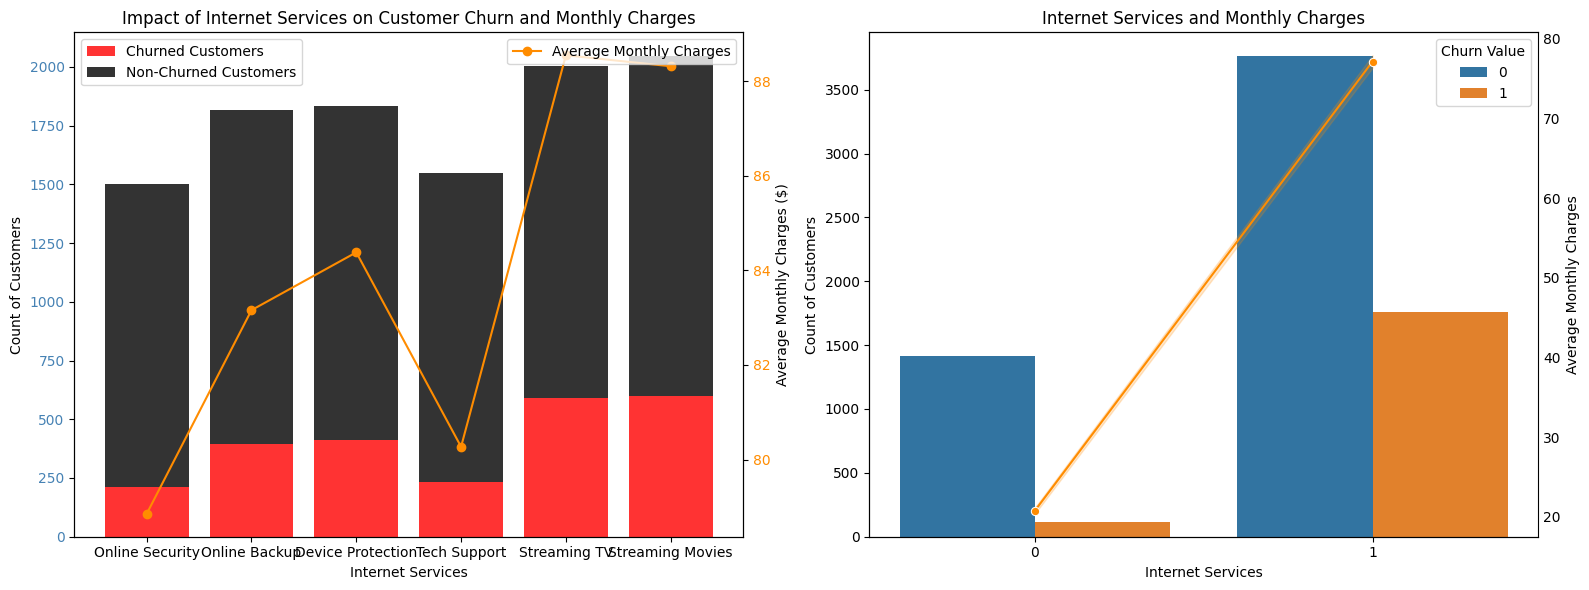

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

internet_services = ['Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies']
churn_count = [dfse[dfse["Churn Value"]==1][service].sum() for service in internet_services]
not_churn_count = [dfse[dfse["Churn Value"]==0][service].sum() for service in internet_services]
avg_charges = [dfse[dfse[service]==1]["Monthly Charges"].mean() for service in internet_services]

# create a grouped dataframe for counts and average monthly charges
grouped = df.groupby(['Internet Service', 'Churn Value']).agg({'Churn Value': 'count', 'Monthly Charges': 'mean'})
grouped.columns = ['Count', 'Avg Monthly Charges']
grouped = grouped.reset_index()

# plot bar chart for counts on left y-axis
axes[0].bar(internet_services, churn_count, color='red', alpha=0.8, label='Churned Customers')
axes[0].bar(internet_services, not_churn_count, bottom=churn_count, color='black', alpha=0.8, label='Non-Churned Customers')
axes[0].set_ylabel('Count of Customers')
axes[0].tick_params(axis='y', labelcolor='steelblue')

# create twin axes for average charges on right y-axis
ax1 = axes[0].twinx()
ax1.plot(internet_services, avg_charges, marker='o', color='darkorange', label='Average Monthly Charges')
ax1.set_ylabel('Average Monthly Charges ($)')
ax1.tick_params(axis='y', labelcolor='darkorange')

# set title and axis labels
axes[0].set_title('Impact of Internet Services on Customer Churn and Monthly Charges')
axes[0].set_xlabel('Internet Services')

# add legend
axes[0].legend(loc='upper left')
ax1.legend(loc='upper right')

axes[0].grid(False)
ax1.grid(False)


sns.barplot(data=grouped, x='Internet Service', y='Count', hue='Churn Value', ax=axes[1])
axes[1].set_ylabel('Count of Customers')

# create twin axis for average monthly charges
ax2 = axes[1].twinx()
sns.lineplot(data=grouped, x='Internet Service', y='Avg Monthly Charges', marker='o', sort=False, ax=ax2, color='darkorange')
ax2.set_ylabel('Average Monthly Charges')

# set title and axis labels
axes[1].set_title('Internet Services and Monthly Charges')
axes[1].set_xlabel('Internet Services')

# remove spines and ticks from right y-axis
ax2.spines['right'].set_visible(False)
ax2.tick_params(axis='y', which='both', length=0)

axes[1].grid(False)
ax2.grid(False)

# adjust layout
plt.tight_layout()

# display plot
plt.show()



    Online security and tech support are two internet services that customers prefer due to their lower monthly charges compared to other services.
    Customers tend to choose IsDSL over IsFiberOptics due to its affordability.
    Similarly the contracts, monthly charges and total charges show the same relationship with the contract. Customers spend mostly on internet services, especially fiber optics, in their monthly charges.



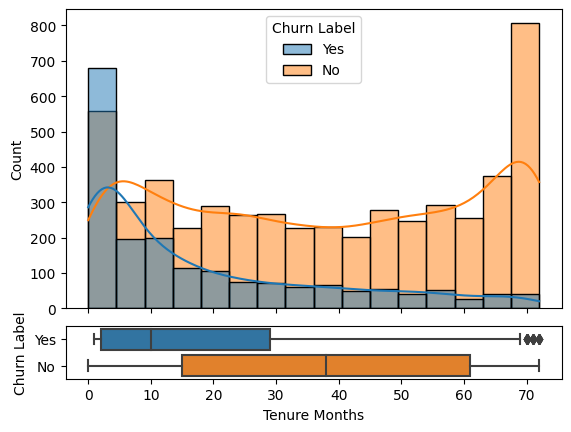

In [59]:
fig, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.85, .15)})

sns.histplot(data=dfss, x="Tenure Months", hue="Churn Label", ax=ax_hist, kde=True)
ax_hist.set_xlabel("")

sns.boxplot(data=dfss, x="Tenure Months", y="Churn Label", ax=ax_box)
ax_box.set_xlabel("Tenure Months")

plt.subplots_adjust(hspace=0.1)

plt.show()



Usually the first months in the service are the most risky, since customers may have their own expectations from the service and so on. So that the churn labels of the first month is very high.


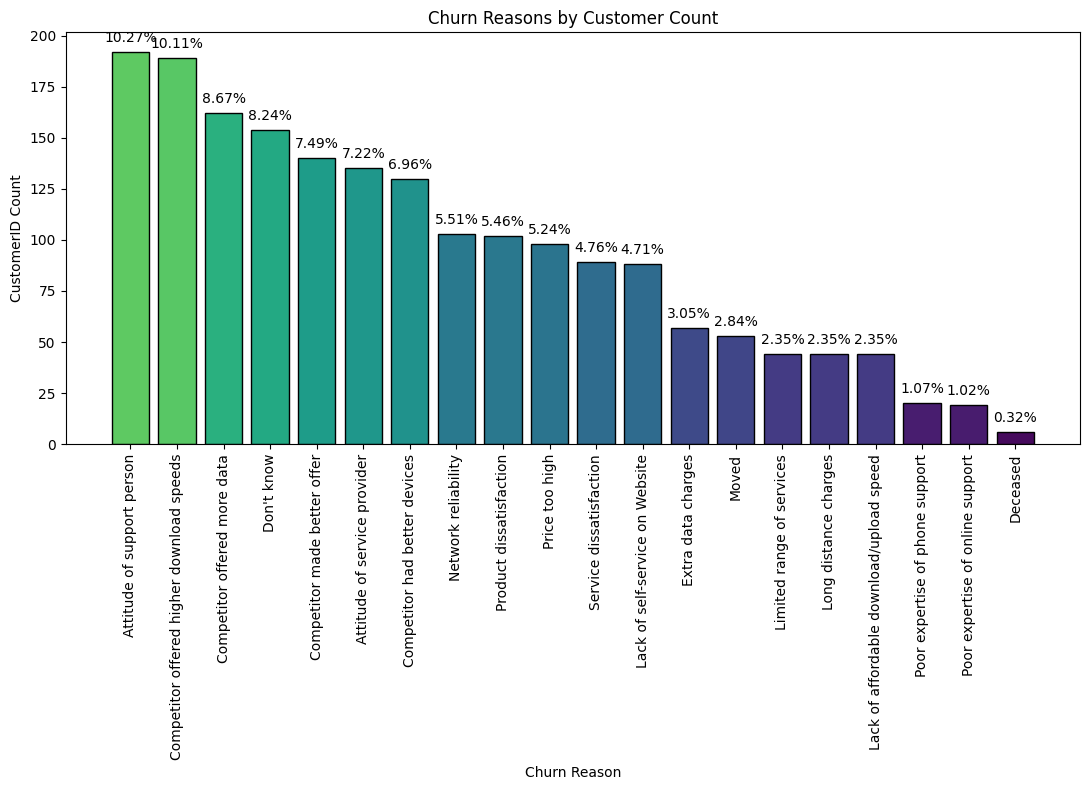

In [86]:
grouped_data = dfss.groupby(['Churn Reason'])['CustomerID'].count().reset_index()
sorted_data = grouped_data.sort_values('CustomerID', ascending=False)
total_count = sorted_data['CustomerID'].sum()
percentages = (sorted_data['CustomerID'] / total_count) * 100

fig, ax = plt.subplots(figsize=(11, 8))
cmap = plt.get_cmap('viridis')

bars = ax.bar(sorted_data['Churn Reason'], sorted_data['CustomerID'], color=cmap(sorted_data['CustomerID']), edgecolor='black')
for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    ax.annotate(f'{percentage:.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center', va='bottom')

ax.set_xlabel('Churn Reason')
ax.set_ylabel('CustomerID Count')
ax.set_title('Churn Reasons by Customer Count')
ax.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()


    33.2% of churn customers left the service due to the fact that the competitor made better offers (download speed, data, devices).
    17.3% of churn customers cited the attitude of a support specialist or provider as the reason.
    3.16 % reasons for the churn that we cannot influence in any way (Moved or deceased).


In [64]:


def encode_data(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series



In [87]:
df = df.drop(['Latitude','Longitude'], axis = 1)

In [88]:
df = df.apply(lambda x: encode_data(x))
df.head()

,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,...,Contract,Paperless Billing,Monthly Charges,Total Charges,Churn Value,IsFiberOptics,IsDSL,Monthly Contract,Yearly Contract,IsElectricCheck
0,0,0,0,2,1,0,1,1,1,0,...,0,1,53.85,108.15,1,0,1,1,0,0
1,0,0,1,2,1,0,1,0,0,0,...,0,1,70.70,151.65,1,1,0,1,0,1
2,0,0,1,8,1,1,1,0,0,1,...,0,1,99.65,820.50,1,1,0,1,0,1
3,0,1,1,28,1,1,1,0,0,1,...,0,1,104.80,3046.05,1,1,0,1,0,1
4,0,0,1,49,1,1,1,0,1,1,...,0,1,103.70,5036.30,1,1,0,1,0,0


In [90]:
over = SMOTE(sampling_strategy = 1)

x = df.drop("Churn Value", axis = 1).values
y = df['Churn Value'].values

In [91]:
x,y = over.fit_resample(x,y)

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state =2, test_size = 0.2)

In [93]:
def model(method, x_train, y_train, x_test, y_test):
    # Train the model
    method.fit(x_train, y_train)
    
    # Make predictions on test data and calculate confusion matrix
    predictions = method.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    c_matrix = confusion_matrix(y_test, predictions)
    
    # Calculate label percentages and create label strings with counts and percentages
    percentages = (c_matrix / np.sum(c_matrix, axis=1)[:, np.newaxis]).round(2) * 100
    labels = [[f"{c_matrix[i, j]} ({percentages[i, j]:.2f}%)" for j in range(c_matrix.shape[1])] for i in range(c_matrix.shape[0])]
    labels = np.asarray(labels)
    
    # Plot confusion matrix with labeled counts and percentages
    sns.heatmap(c_matrix, annot=labels, fmt='', cmap='Blues')
    
    # Evaluate model performance and print results
    print("RMSE:", rmse)
    print("ROC AUC: ", '{:.2%}'.format(roc_auc_score(y_test, predictions)))
    print("Model accuracy: ", '{:.2%}'.format(accuracy_score(y_test, predictions)))
    print(classification_report(y_test, predictions))

In [94]:
xgb = XGBClassifier(learning_rate= 0.01,max_depth = 6,n_estimators = 1000)
rf = RandomForestClassifier()
dt = DecisionTreeClassifier(max_depth=15)

RMSE: 0.3690960363617727
ROC AUC:  86.38%
Model accuracy:  86.38%
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1049
           1       0.86      0.86      0.86      1021

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



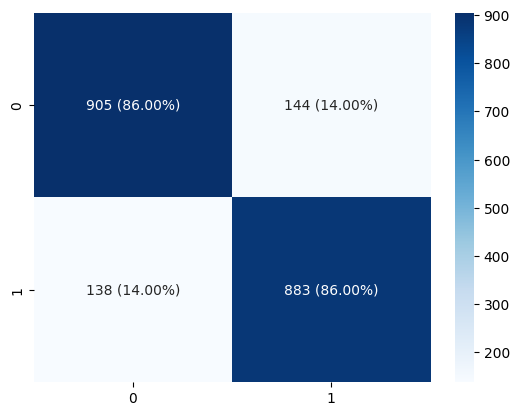

In [95]:


model(xgb,x_train,y_train,x_test,y_test)



RMSE: 0.3651483716701107
ROC AUC:  86.65%
Model accuracy:  86.67%
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1049
           1       0.87      0.86      0.86      1021

    accuracy                           0.87      2070
   macro avg       0.87      0.87      0.87      2070
weighted avg       0.87      0.87      0.87      2070



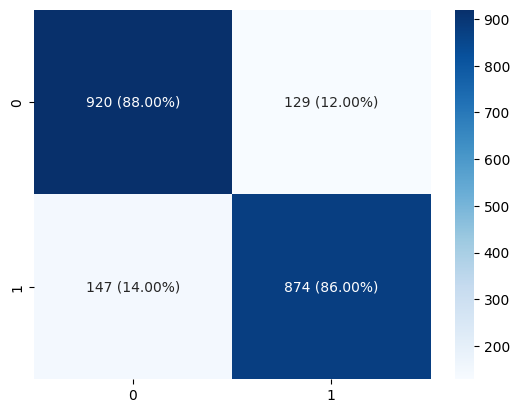

In [96]:
model(rf,x_train,y_train,x_test,y_test)

RMSE: 0.4158688013104393
ROC AUC:  82.72%
Model accuracy:  82.71%
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1049
           1       0.82      0.84      0.83      1021

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070



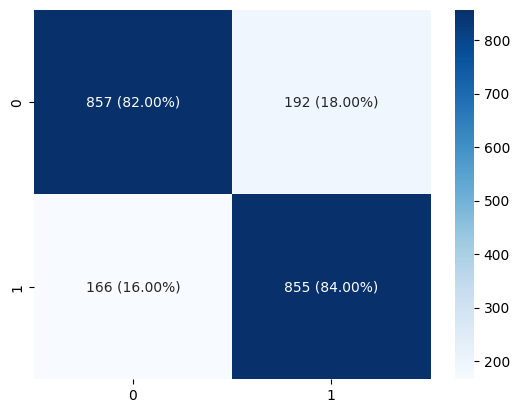

In [97]:
model(dt,x_train,y_train,x_test,y_test)

In [98]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predictions = lr.predict(x_test)

# Calculate metrics for the Logistic Regression model
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
print("Logistic Regression:")
print(f'Mean Absolute Error (MAE): {lr_mae}')
print(f'Root Mean Squared Error (RMSE): {lr_rmse}')

# Create and fit a Gradient Boosting Regression model
gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(x_train, y_train)
gbm_predictions = gbm.predict(x_test)

# Calculate metrics for the Gradient Boosting Regression model
gbm_mae = mean_absolute_error(y_test, gbm_predictions)
gbm_rmse = np.sqrt(mean_squared_error(y_test, gbm_predictions))
print("\nGradient Boosting Regression:")
print(f'Mean Absolute Error (MAE): {gbm_mae}')
print(f'Root Mean Squared Error (RMSE): {gbm_rmse}')

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
Mean Absolute Error (MAE): 0.2178743961352657
Root Mean Squared Error (RMSE): 0.4667701748561766

Gradient Boosting Regression:
Mean Absolute Error (MAE): 0.22642061730588414
Root Mean Squared Error (RMSE): 0.3155387386826065


In [103]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=25)

Epoch 1/25
259/259 [==============================] - 1s 2ms/step - loss: 3.4383 - accuracy: 0.6291
Epoch 2/25
259/259 [==============================] - 0s 2ms/step - loss: 0.7838 - accuracy: 0.7252
Epoch 3/25
259/259 [==============================] - 0s 2ms/step - loss: 1.2868 - accuracy: 0.6987
Epoch 4/25
259/259 [==============================] - 0s 2ms/step - loss: 1.2474 - accuracy: 0.7241
Epoch 5/25
259/259 [==============================] - 0s 2ms/step - loss: 1.1708 - accuracy: 0.7132
Epoch 6/25
259/259 [==============================] - 0s 2ms/step - loss: 0.9007 - accuracy: 0.7358
Epoch 7/25
259/259 [==============================] - 0s 2ms/step - loss: 1.0808 - accuracy: 0.7223
Epoch 8/25
259/259 [==============================] - 0s 2ms/step - loss: 0.7929 - accuracy: 0.7386
Epoch 9/25
259/259 [==============================] - 0s 2ms/step - loss: 0.9279 - accuracy: 0.7327
Epoch 10/25
259/259 [==============================] - 0s 2ms/step - loss: 0.8188 - accuracy: 0.7392

In [102]:
accuracy = model.evaluate(x_test, y_test)
print("Loss and Accuracy :",accuracy )

65/65 [==============================] - 0s 1ms/step - loss: 0.7877 - accuracy: 0.6826
Loss and Accuracy : [0.787686288356781, 0.6826087236404419]
